# Analyzing my Amazon Halo Workout Data

I try to consolidate the number of times I have to import packages. Everything I need should be in the first code block.

In [39]:
import pandas as pd
import numpy as np
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings 
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
sns.set()

rs = 123

I need to read my halo workout data in as a pandas dataframe

In [40]:
amazon_data = pd.read_csv(r'G:\My Drive\Coraline\MapMyRunProjects\Amazon Data\Activity\Activity_Workouts_1970-01-01--2022-06-03_1b219a29-93ce-467e-ad80-61b8d0868186.csv')

In [41]:
amazon_data.head(5)

Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   
1  2022-05-31T11:44:50.558Z  2022-05-31T12:33:30.765Z      WORKOUT   
2  2022-05-30T18:22:39.015Z  2022-05-30T18:34:37.194Z      WORKOUT   
3  2022-05-30T17:47:51.460Z  2022-05-30T18:22:38.941Z      WORKOUT   
4  2022-05-29T17:13:26.436Z  2022-05-29T17:45:47.281Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset      Activity Score  \
0           OTHER       Automatic                    -5.0               24.85   
1         RUNNING       Automatic                    -5.0   92.57061833333333   
2         WALKING       Automatic                    -5.0            10.96965   
3         RUNNING       Automatic                    -5.0   65.64901666666667   
4         WALKING       Automatic                    -5.0  1.3673708333333334   

  Intense Duration (ms) Moderate Duration (ms)  Max Heart Rate (bpm)  \
0               No Data              1440000.0                 117.0   
1             2700000.0               150765.0                 164.0   
2               No Data               658179.0                 126.0   
3             1860000.0               218941.0                 172.0   
4               No Data                No Data                  79.0   

   Average Heart Rate (bpm)   Steps  Calories Software Version Software OS  \
0                      94.0  1645.0     253.0       1.0.113437         ios   
1                     146.0  7446.0     807.0       1.0.113437         ios   
2                     114.0   822.0     117.0       1.0.113437         ios   
3                     155.0  5246.0     630.0       1.0.113437         ios   
4                      63.0  2103.0     107.0       1.0.113437         ios   

   Software OS Version  Active Time (ms)  Total Duration (ms)  Activity Pause  \
0                 15.6         2640000.0            2640000.0  Not Applicable   
1                 15.6         2920207.0            2920207.0  Not Applicable   
2                 15.6          718179.0             718179.0  Not Applicable   
3                 15.6         2087481.0            2087481.0  Not Applicable   
4                 15.6         1940845.0            1940845.0  Not Applicable   

  Session Source  
0    User Logged  
1    User Logged  
2    User Logged  
3    User Logged  
4    User Logged

In [42]:
#create a workable copy of the dataset
df = amazon_data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start Time                286 non-null    object 
 1   End Time                  286 non-null    object 
 2   Session Type              286 non-null    object 
 3   Session Subtype           286 non-null    object 
 4   Creation Method           286 non-null    object 
 5   Local Time Zone Offset    286 non-null    float64
 6   Activity Score            286 non-null    object 
 7   Intense Duration (ms)     286 non-null    object 
 8   Moderate Duration (ms)    286 non-null    object 
 9   Max Heart Rate (bpm)      286 non-null    float64
 10  Average Heart Rate (bpm)  286 non-null    float64
 11  Steps                     286 non-null    float64
 12  Calories                  286 non-null    float64
 13  Software Version          286 non-null    object 
 14  Software O

<AxesSubplot:xlabel='Start Time'>

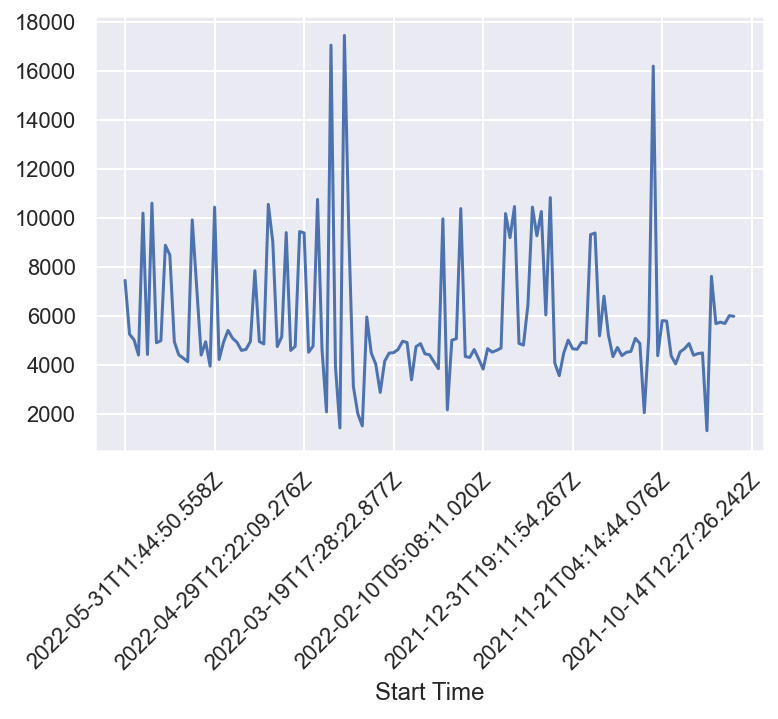

In [44]:
# show data with a mask filter (running only)
#I want to plot the old time to check my work later
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Start Time')
    ['Steps']
    .plot(rot = 45)
)

In [45]:
df.head(4)

Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   
1  2022-05-31T11:44:50.558Z  2022-05-31T12:33:30.765Z      WORKOUT   
2  2022-05-30T18:22:39.015Z  2022-05-30T18:34:37.194Z      WORKOUT   
3  2022-05-30T17:47:51.460Z  2022-05-30T18:22:38.941Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset     Activity Score  \
0           OTHER       Automatic                    -5.0              24.85   
1         RUNNING       Automatic                    -5.0  92.57061833333333   
2         WALKING       Automatic                    -5.0           10.96965   
3         RUNNING       Automatic                    -5.0  65.64901666666667   

  Intense Duration (ms) Moderate Duration (ms)  Max Heart Rate (bpm)  \
0               No Data              1440000.0                 117.0   
1             2700000.0               150765.0                 164.0   
2               No Data               658179.0                 126.0   
3             1860000.0               218941.0                 172.0   

   Average Heart Rate (bpm)   Steps  Calories Software Version Software OS  \
0                      94.0  1645.0     253.0       1.0.113437         ios   
1                     146.0  7446.0     807.0       1.0.113437         ios   
2                     114.0   822.0     117.0       1.0.113437         ios   
3                     155.0  5246.0     630.0       1.0.113437         ios   

   Software OS Version  Active Time (ms)  Total Duration (ms)  Activity Pause  \
0                 15.6         2640000.0            2640000.0  Not Applicable   
1                 15.6         2920207.0            2920207.0  Not Applicable   
2                 15.6          718179.0             718179.0  Not Applicable   
3                 15.6         2087481.0            2087481.0  Not Applicable   

  Session Source  
0    User Logged  
1    User Logged  
2    User Logged  
3    User Logged

## Converting Time

In [46]:
#I will use the datetime and pytz packages to convert my time/dates
from datetime import datetime
from pytz import timezone
import pytz
central = timezone('US/Central')
time_stamp = '2022-04-23T05:57:36.270Z'
published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z')
published_cst = published_time.astimezone(central)
actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

print(time_stamp)
print(published_time)
print(published_cst)
print(actual_time_published)

2022-04-23T05:57:36.270Z
2022-04-23 05:57:36.270000+00:00
2022-04-23 00:57:36.270000-05:00
Sat, Apr 23 2022 at 12:57:36 AM CDT


In [47]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['Start Time']))
pd.to_datetime(df['Start Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

df['Start Time DTG'] = df['Start Time'].apply(date_convert)
df['End Time DTG'] = df['End Time'].apply(date_convert)
df.head(2)

Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   
1  2022-05-31T11:44:50.558Z  2022-05-31T12:33:30.765Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset     Activity Score  \
0           OTHER       Automatic                    -5.0              24.85   
1         RUNNING       Automatic                    -5.0  92.57061833333333   

  Intense Duration (ms) Moderate Duration (ms)  Max Heart Rate (bpm)  ...  \
0               No Data              1440000.0                 117.0  ...   
1             2700000.0               150765.0                 164.0  ...   

   Calories  Software Version  Software OS Software OS Version  \
0     253.0        1.0.113437          ios                15.6   
1     807.0        1.0.113437          ios                15.6   

  Active Time (ms)  Total Duration (ms)  Activity Pause  Session Source  \
0        2640000.0            2640000.0  Not Applicable     User Logged   
1        2920207.0            2920207.0  Not Applicable     User Logged   

                        Start Time DTG                         End Time DTG  
0  Tue, May 31 2022 at 12:34:00 PM UTC  Tue, May 31 2022 at 01:18:00 PM UTC  
1  Tue, May 31 2022 at 11:44:50 AM UTC  Tue, May 31 2022 at 12:33:30 PM UTC  

[2 rows x 22 columns]

In [48]:
# df['Local Start Time DTG'] = df['Local Start Time'].dt.tz_localize('CET').dt.tz_convert('US/Central')


In [49]:
df.set_index(pd.DatetimeIndex(df['Start Time DTG']).tz_convert('US/Central'), inplace = True, drop = True)
df.index.names = ['Local Start Time DTG']
df = df.reset_index()
df.set_index(pd.DatetimeIndex(df['End Time DTG']).tz_convert('US/Central'), inplace = True, drop = True)
df.index.names = ['Local End Time DTG']
df = df.reset_index()

In [50]:
df.head(2)

Local End Time DTG      Local Start Time DTG  \
0 2022-05-31 08:18:00-05:00 2022-05-31 07:34:00-05:00   
1 2022-05-31 07:33:30-05:00 2022-05-31 06:44:50-05:00   

                 Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   
1  2022-05-31T11:44:50.558Z  2022-05-31T12:33:30.765Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset     Activity Score  \
0           OTHER       Automatic                    -5.0              24.85   
1         RUNNING       Automatic                    -5.0  92.57061833333333   

  Intense Duration (ms)  ... Calories  Software Version  Software OS  \
0               No Data  ...    253.0        1.0.113437          ios   
1             2700000.0  ...    807.0        1.0.113437          ios   

   Software OS Version  Active Time (ms) Total Duration (ms)  Activity Pause  \
0                 15.6         2640000.0           2640000.0  Not Applicable   
1                 15.6         2920207.0           2920207.0  Not Applicable   

   Session Source                       Start Time DTG  \
0     User Logged  Tue, May 31 2022 at 12:34:00 PM UTC   
1     User Logged  Tue, May 31 2022 at 11:44:50 AM UTC   

                          End Time DTG  
0  Tue, May 31 2022 at 01:18:00 PM UTC  
1  Tue, May 31 2022 at 12:33:30 PM UTC  

[2 rows x 24 columns]

In [51]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['End Time']))
pd.to_datetime(df['End Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [52]:
df.head(3)

Local End Time DTG      Local Start Time DTG  \
0 2022-05-31 08:18:00-05:00 2022-05-31 07:34:00-05:00   
1 2022-05-31 07:33:30-05:00 2022-05-31 06:44:50-05:00   
2 2022-05-30 13:34:37-05:00 2022-05-30 13:22:39-05:00   

                 Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   
1  2022-05-31T11:44:50.558Z  2022-05-31T12:33:30.765Z      WORKOUT   
2  2022-05-30T18:22:39.015Z  2022-05-30T18:34:37.194Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset     Activity Score  \
0           OTHER       Automatic                    -5.0              24.85   
1         RUNNING       Automatic                    -5.0  92.57061833333333   
2         WALKING       Automatic                    -5.0           10.96965   

  Intense Duration (ms)  ... Calories  Software Version  Software OS  \
0               No Data  ...    253.0        1.0.113437          ios   
1             2700000.0  ...    807.0        1.0.113437          ios   
2               No Data  ...    117.0        1.0.113437          ios   

   Software OS Version  Active Time (ms) Total Duration (ms)  Activity Pause  \
0                 15.6         2640000.0           2640000.0  Not Applicable   
1                 15.6         2920207.0           2920207.0  Not Applicable   
2                 15.6          718179.0            718179.0  Not Applicable   

   Session Source                       Start Time DTG  \
0     User Logged  Tue, May 31 2022 at 12:34:00 PM UTC   
1     User Logged  Tue, May 31 2022 at 11:44:50 AM UTC   
2     User Logged  Mon, May 30 2022 at 06:22:39 PM UTC   

                          End Time DTG  
0  Tue, May 31 2022 at 01:18:00 PM UTC  
1  Tue, May 31 2022 at 12:33:30 PM UTC  
2  Mon, May 30 2022 at 06:34:37 PM UTC  

[3 rows x 24 columns]

In [53]:
# #create a for loop with the updated timezone instructions. This will add a new column.\n",
# central = timezone('US/Central')
# time_stamp = '2022-04-23T05:57:36.270Z'
# published_time = datetime.strptime(df['Start Time'], '%Y-%m-%dT%H:%M:%S.%f%z')
# published_cst = published_time.astimezone(central)
# actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
# df['Local Start Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
    
# for item in df['End Time']:
#     central = timezone('US/Central'),
#     time_stamp = '2022-04-23T05:57:36.270Z',
#     published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z'),
#     published_cst = published_time.astimezone(central),
#     actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z'),
#     df['Local End Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [54]:
# import pytz
# df['Local_Time'] = df.apply(lambda x: pytz.timezone("US/Central" if df['Time_Zone'] == 'CST' else x['Time_Zone']).normalize(x['CREATED_DT']), axis = 1)

In [55]:
#I want to pull just the day out of the start/end times
#df['Local Start Time DTG Only'] = pd.to_datetime(df['Local Start Time DTG'])
df['day_of_week_start']=df['Local Start Time DTG'].dt.day_name()
#df['Local End Time DTG Only'] = pd.to_datetime(df['Local End Time DTG'])
df['day_of_week_end']=df['Local End Time DTG'].dt.day_name()

In [56]:
#I plan on joining this with my Map My Run Data to get the mileage, so I will pull just the date
df['Workout_Date'] = df['Local Start Time DTG'].dt.date

In [57]:
df.head(1)

Local End Time DTG      Local Start Time DTG  \
0 2022-05-31 08:18:00-05:00 2022-05-31 07:34:00-05:00   

                 Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset Activity Score  \
0           OTHER       Automatic                    -5.0          24.85   

  Intense Duration (ms)  ... Software OS Version  Active Time (ms)  \
0               No Data  ...                15.6         2640000.0   

   Total Duration (ms)  Activity Pause  Session Source  \
0            2640000.0  Not Applicable     User Logged   

                        Start Time DTG                         End Time DTG  \
0  Tue, May 31 2022 at 12:34:00 PM UTC  Tue, May 31 2022 at 01:18:00 PM UTC   

   day_of_week_start  day_of_week_end  Workout_Date  
0            Tuesday          Tuesday    2022-05-31  

[1 rows x 27 columns]

In [58]:
# df.info()

In [59]:
#some of my numbers are string objects so I need to convert them to floats
df['Activity Score'] = pd.to_numeric(df['Activity Score'],errors='coerce')
df['Intense Duration (ms)'] = pd.to_numeric(df['Intense Duration (ms)'],errors='coerce')
df['Moderate Duration (ms)'] = pd.to_numeric(df['Moderate Duration (ms)'],errors='coerce')

In [60]:
#I want the entire dataframe to be rounded to 2 places
df = df.round(2)

In [61]:
#check my work
df.head(2)

Local End Time DTG      Local Start Time DTG  \
0 2022-05-31 08:18:00-05:00 2022-05-31 07:34:00-05:00   
1 2022-05-31 07:33:30-05:00 2022-05-31 06:44:50-05:00   

                 Start Time                  End Time Session Type  \
0  2022-05-31T12:34:00.000Z  2022-05-31T13:18:00.000Z      WORKOUT   
1  2022-05-31T11:44:50.558Z  2022-05-31T12:33:30.765Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset  Activity Score  \
0           OTHER       Automatic                    -5.0           24.85   
1         RUNNING       Automatic                    -5.0           92.57   

   Intense Duration (ms)  ...  Software OS Version  Active Time (ms)  \
0                    NaN  ...                 15.6         2640000.0   
1              2700000.0  ...                 15.6         2920207.0   

   Total Duration (ms)  Activity Pause  Session Source  \
0            2640000.0  Not Applicable     User Logged   
1            2920207.0  Not Applicable     User Logged   

                        Start Time DTG                         End Time DTG  \
0  Tue, May 31 2022 at 12:34:00 PM UTC  Tue, May 31 2022 at 01:18:00 PM UTC   
1  Tue, May 31 2022 at 11:44:50 AM UTC  Tue, May 31 2022 at 12:33:30 PM UTC   

   day_of_week_start  day_of_week_end  Workout_Date  
0            Tuesday          Tuesday    2022-05-31  
1            Tuesday          Tuesday    2022-05-31  

[2 rows x 27 columns]

In [62]:
df.columns

Index(['Local End Time DTG', 'Local Start Time DTG', 'Start Time', 'End Time',
       'Session Type', 'Session Subtype', 'Creation Method',
       'Local Time Zone Offset', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Max Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Steps', 'Calories', 'Software Version',
       'Software OS', 'Software OS Version', 'Active Time (ms)',
       'Total Duration (ms)', 'Activity Pause', 'Session Source',
       'Start Time DTG', 'End Time DTG', 'day_of_week_start',
       'day_of_week_end', 'Workout_Date'],
      dtype='object')

In [63]:
#I want to add month categories
import datetime
import calendar
df['Workout_Month'] = df['Local Start Time DTG'].dt.month
df['Workout_Month'] = df['Local Start Time DTG'].dt.month
df['Workout_Month_Name'] = df['Workout_Month'].apply(lambda x: calendar.month_name[x])


In [64]:
df.head(1)
df.columns

Index(['Local End Time DTG', 'Local Start Time DTG', 'Start Time', 'End Time',
       'Session Type', 'Session Subtype', 'Creation Method',
       'Local Time Zone Offset', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Max Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Steps', 'Calories', 'Software Version',
       'Software OS', 'Software OS Version', 'Active Time (ms)',
       'Total Duration (ms)', 'Activity Pause', 'Session Source',
       'Start Time DTG', 'End Time DTG', 'day_of_week_start',
       'day_of_week_end', 'Workout_Date', 'Workout_Month',
       'Workout_Month_Name'],
      dtype='object')

In [65]:
#I want to re-arrange my columns so I can focus on the important items.
df = df[['Workout_Date', 'Session Subtype', 'Activity Score', 'Intense Duration (ms)',
         'Moderate Duration (ms)','Active Time (ms)', 'Average Heart Rate (bpm)',
         'Max Heart Rate (bpm)','Steps', 'Calories',
         'Total Duration (ms)', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start',
       'Workout_Month', 'Workout_Month_Name']]

In [66]:
#double check that I have all my columns still
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              286 non-null    object 
 1   Session Subtype           286 non-null    object 
 2   Activity Score            285 non-null    float64
 3   Intense Duration (ms)     154 non-null    float64
 4   Moderate Duration (ms)    256 non-null    float64
 5   Active Time (ms)          286 non-null    float64
 6   Average Heart Rate (bpm)  286 non-null    float64
 7   Max Heart Rate (bpm)      286 non-null    float64
 8   Steps                     286 non-null    float64
 9   Calories                  286 non-null    float64
 10  Total Duration (ms)       286 non-null    float64
 11  Start Time DTG            286 non-null    object 
 12  End Time DTG              286 non-null    object 
 13  day_of_week_start         286 non-null    object 
 14  Workout_Mo

## MS to Minutes and Seconds

In [67]:
df.head(2)

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-05-31           OTHER           24.85                    NaN   
1   2022-05-31         RUNNING           92.57              2700000.0   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0               1440000.0         2640000.0                      94.0   
1                150765.0         2920207.0                     146.0   

   Max Heart Rate (bpm)   Steps  Calories  Total Duration (ms)  \
0                 117.0  1645.0     253.0            2640000.0   
1                 164.0  7446.0     807.0            2920207.0   

                        Start Time DTG                         End Time DTG  \
0  Tue, May 31 2022 at 12:34:00 PM UTC  Tue, May 31 2022 at 01:18:00 PM UTC   
1  Tue, May 31 2022 at 11:44:50 AM UTC  Tue, May 31 2022 at 12:33:30 PM UTC   

  day_of_week_start  Workout_Month Workout_Month_Name  
0           Tuesday              5                May  
1           Tuesday              5                May

In [68]:
#seconds = (milliseconds / 1000) % 60 ;
#minutes = ((milliseconds / (1000*60)) % 60);
#hours   = ((milliseconds / (1000*60*60)) % 24);
df['Active Time (sec)'] = (df['Active Time (ms)'] / 1000) % 60
df['Active Time (min)'] = (df['Active Time (ms)'] / (1000*60)) % 60
df['Active Time (hour)'] = (df['Active Time (ms)'] / (1000*60*60) % 24)
df['Active Time (total min)'] = (df['Active Time (ms)'] / (1000*60))    

In [69]:
df = df.round(2)
df.info()
df.head(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              286 non-null    object 
 1   Session Subtype           286 non-null    object 
 2   Activity Score            285 non-null    float64
 3   Intense Duration (ms)     154 non-null    float64
 4   Moderate Duration (ms)    256 non-null    float64
 5   Active Time (ms)          286 non-null    float64
 6   Average Heart Rate (bpm)  286 non-null    float64
 7   Max Heart Rate (bpm)      286 non-null    float64
 8   Steps                     286 non-null    float64
 9   Calories                  286 non-null    float64
 10  Total Duration (ms)       286 non-null    float64
 11  Start Time DTG            286 non-null    object 
 12  End Time DTG              286 non-null    object 
 13  day_of_week_start         286 non-null    object 
 14  Workout_Mo

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0    2022-05-31           OTHER           24.85                    NaN   
1    2022-05-31         RUNNING           92.57              2700000.0   
2    2022-05-30         WALKING           10.97                    NaN   
3    2022-05-30         RUNNING           65.65              1860000.0   
4    2022-05-29         WALKING            1.37                    NaN   
5    2022-05-28           OTHER           16.70                    NaN   
6    2022-05-28         RUNNING           62.89              1858828.0   
7    2022-05-27           OTHER           19.40                    NaN   
8    2022-05-27           OTHER           13.25                    NaN   
9    2022-05-27         RUNNING           59.13              1740000.0   
10   2022-05-25         RUNNING          130.71              3720000.0   
11   2022-05-24         WALKING            1.48                    NaN   
12   2022-05-24         RUNNING           56.69              1670259.0   
13   2022-05-17         WALKING            9.27                60000.0   
14   2022-05-17         WALKING            9.12                    NaN   
15   2022-05-17         RUNNING          132.77              3780000.0   
16   2022-05-16           OTHER           15.75                    NaN   
17   2022-05-16         RUNNING           62.90              1740000.0   

    Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                1440000.0         2640000.0                      94.0   
1                 150765.0         2920207.0                     146.0   
2                 658179.0          718179.0                     114.0   
3                 218941.0         2087481.0                     155.0   
4                      NaN         1940845.0                      63.0   
5                 960000.0         2040000.0                      96.0   
6                  55610.0         1914438.0                     161.0   
7                1140000.0         1980000.0                      97.0   
8                 780000.0         1380000.0                     100.0   
9                  65189.0         1858014.0                     145.0   
10                402661.0         4125404.0                     146.0   
11                 60000.0          640813.0                      88.0   
12                 60000.0         1751005.0                     137.0   
13                429704.0          622859.0                     110.0   
14                542812.0          634651.0                     105.0   
15                406235.0         4186235.0                     148.0   
16                900000.0         1800000.0                      95.0   
17                293838.0         2033838.0                     143.0   

    Max Heart Rate (bpm)    Steps  Calories  Total Duration (ms)  \
0                  117.0   1645.0     253.0            2640000.0   
1                  164.0   7446.0     807.0            2920207.0   
2                  126.0    822.0     117.0             718179.0   
3                  172.0   5246.0     630.0            2087481.0   
4                   79.0   2103.0     107.0            1940845.0   
5                  120.0   1174.0     177.0            2040000.0   
6                  172.0   5019.0     600.0            1914438.0   
7                  117.0   1296.0     212.0            1980000.0   
8                  123.0    434.0     114.0            1380000.0   
9                  165.0   4396.0     502.0            1858014.0   
10                 166.0  10194.0    1137.0            4125404.0   
11                 105.0    753.0      72.0             640813.0   
12                 147.0   4420.0     437.0            1751005.0   
13                 140.0    747.0      81.0             622859.0   
14                 117.0    679.0      85.0             634651.0   
15                 166.0  10599.0    1207.0            4186235.0   
16                 128.0   1139.0

In [70]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              286 non-null    object 
 1   Session Subtype           286 non-null    object 
 2   Activity Score            285 non-null    float64
 3   Intense Duration (ms)     154 non-null    float64
 4   Moderate Duration (ms)    256 non-null    float64
 5   Active Time (ms)          286 non-null    float64
 6   Average Heart Rate (bpm)  286 non-null    float64
 7   Max Heart Rate (bpm)      286 non-null    float64
 8   Steps                     286 non-null    float64
 9   Calories                  286 non-null    float64
 10  Total Duration (ms)       286 non-null    float64
 11  Start Time DTG            286 non-null    object 
 12  End Time DTG              286 non-null    object 
 13  day_of_week_start         286 non-null    object 
 14  Workout_Mo

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-05-31           OTHER           24.85                    NaN   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0               1440000.0         2640000.0                      94.0   

   Max Heart Rate (bpm)   Steps  Calories  Total Duration (ms)  \
0                 117.0  1645.0     253.0            2640000.0   

                        Start Time DTG                         End Time DTG  \
0  Tue, May 31 2022 at 12:34:00 PM UTC  Tue, May 31 2022 at 01:18:00 PM UTC   

  day_of_week_start  Workout_Month Workout_Month_Name  Active Time (sec)  \
0           Tuesday              5                May                0.0   

   Active Time (min)  Active Time (hour)  Active Time (total min)  
0               44.0                0.73                     44.0

In [71]:
df['Miles'] = df['Steps'] / 1475
df.head(10)

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-05-31           OTHER           24.85                    NaN   
1   2022-05-31         RUNNING           92.57              2700000.0   
2   2022-05-30         WALKING           10.97                    NaN   
3   2022-05-30         RUNNING           65.65              1860000.0   
4   2022-05-29         WALKING            1.37                    NaN   
5   2022-05-28           OTHER           16.70                    NaN   
6   2022-05-28         RUNNING           62.89              1858828.0   
7   2022-05-27           OTHER           19.40                    NaN   
8   2022-05-27           OTHER           13.25                    NaN   
9   2022-05-27         RUNNING           59.13              1740000.0   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0               1440000.0         2640000.0                      94.0   
1                150765.0         2920207.0                     146.0   
2                658179.0          718179.0                     114.0   
3                218941.0         2087481.0                     155.0   
4                     NaN         1940845.0                      63.0   
5                960000.0         2040000.0                      96.0   
6                 55610.0         1914438.0                     161.0   
7               1140000.0         1980000.0                      97.0   
8                780000.0         1380000.0                     100.0   
9                 65189.0         1858014.0                     145.0   

   Max Heart Rate (bpm)   Steps  Calories  ...  \
0                 117.0  1645.0     253.0  ...   
1                 164.0  7446.0     807.0  ...   
2                 126.0   822.0     117.0  ...   
3                 172.0  5246.0     630.0  ...   
4                  79.0  2103.0     107.0  ...   
5                 120.0  1174.0     177.0  ...   
6                 172.0  5019.0     600.0  ...   
7                 117.0  1296.0     212.0  ...   
8                 123.0   434.0     114.0  ...   
9                 165.0  4396.0     502.0  ...   

                        Start Time DTG                         End Time DTG  \
0  Tue, May 31 2022 at 12:34:00 PM UTC  Tue, May 31 2022 at 01:18:00 PM UTC   
1  Tue, May 31 2022 at 11:44:50 AM UTC  Tue, May 31 2022 at 12:33:30 PM UTC   
2  Mon, May 30 2022 at 06:22:39 PM UTC  Mon, May 30 2022 at 06:34:37 PM UTC   
3  Mon, May 30 2022 at 05:47:51 PM UTC  Mon, May 30 2022 at 06:22:38 PM UTC   
4  Sun, May 29 2022 at 05:13:26 PM UTC  Sun, May 29 2022 at 05:45:47 PM UTC   
5  Sat, May 28 2022 at 04:45:00 PM UTC  Sat, May 28 2022 at 05:19:00 PM UTC   
6  Sat, May 28 2022 at 04:02:04 PM UTC  Sat, May 28 2022 at 04:33:58 PM UTC   
7  Fri, May 27 2022 at 07:46:00 PM UTC  Fri, May 27 2022 at 08:19:00 PM UTC   
8  Fri, May 27 2022 at 07:13:00 PM UTC  Fri, May 27 2022 at 07:36:00 PM UTC   
9  Fri, May 27 2022 at 04:42:07 PM UTC  Fri, May 27 2022 at 05:13:05 PM UTC   

  day_of_week_start Workout_Month  Workout_Month_Name Active Time (sec)  \
0           Tuesday             5                 May              0.00   
1           Tuesday             5                 May             40.21   
2            Monday             5                 May             58.18   
3            Monday             5                 May             47.48   
4            Sunday             5                 May             20.85   
5          Saturday             5                 May              0.00   
6          Saturday             5                 May             54.44   
7            Friday             5                 May              0.00   
8            Friday             5                 May              0.00   
9            Friday             5                 May             58.01   

   Active Time (min)  Active Time (hour)  Active Time (total min)     Miles  
0              44.00                0.73                    44.00  1.

In [72]:
df.corr()

Activity Score  Intense Duration (ms)  \
Activity Score                  1.000000               0.982295   
Intense Duration (ms)           0.982295               1.000000   
Moderate Duration (ms)         -0.290671              -0.359569   
Active Time (ms)                0.811613               0.849524   
Average Heart Rate (bpm)        0.796295               0.567688   
Max Heart Rate (bpm)            0.748088               0.350638   
Steps                           0.963540               0.947421   
Calories                        0.973191               0.943286   
Total Duration (ms)             0.811613               0.849524   
Workout_Month                  -0.025338               0.027462   
Active Time (sec)               0.310590               0.213102   
Active Time (min)               0.180141              -0.077806   
Active Time (hour)              0.811587               0.849826   
Active Time (total min)         0.811610               0.849527   
Miles                           0.963540               0.947421   

                          Moderate Duration (ms)  Active Time (ms)  \
Activity Score                         -0.290671          0.811613   
Intense Duration (ms)                  -0.359569          0.849524   
Moderate Duration (ms)                  1.000000          0.038704   
Active Time (ms)                        0.038704          1.000000   
Average Heart Rate (bpm)               -0.427684          0.445939   
Max Heart Rate (bpm)                   -0.340609          0.461383   
Steps                                  -0.304075          0.863788   
Calories                               -0.267244          0.862030   
Total Duration (ms)                     0.038704          1.000000   
Workout_Month                           0.068819         -0.004201   
Active Time (sec)                      -0.260321          0.189347   
Active Time (min)                       0.153616          0.310592   
Active Time (hour)                      0.038727          0.999959   
Active Time (total min)                 0.038698          1.000000   
Miles                                  -0.304075          0.863788   

                          Average Heart Rate (bpm)  Max Heart Rate (bpm)  \
Activity Score                            0.796295              0.748088   
Intense Duration (ms)                     0.567688              0.350638   
Moderate Duration (ms)                   -0.427684             -0.340609   
Active Time (ms)                          0.445939              0.461383   
Average Heart Rate (bpm)                  1.000000              0.945256   
Max Heart Rate (bpm)                      0.945256              1.000000   
Steps                                     0.711812              0.677949   
Calories                                  0.744707              0.711416   
Total Duration (ms)                       0.445939              0.461383   
Workout_Month                            -0.040767             -0.050647   
Active Time (sec)                         0.332732              0.283616   
Active Time (min)                         0.223098              0.240566   
Active Time (hour)                        0.445547              0.460817   
Active Time (total min)                   0.445936              0.461379   
Miles                                     0.711812              0.677949   

                             Steps  Calories  Total Duration (ms)  \
Activity Score            0.963540  0.973191             0.811613   
Intense Duration (ms)     0.947421  0.943286             0.849524   
Moderate Duration (ms)   -0.304075 -0.267244             0.038704   
Active Time (ms)          0.863788  0.862030             1.000000   
Average Heart Rate (bpm)  0.711812  0.744707             0.445939   
Max Heart Rate (bpm)      0.677949  0.711416             0.461383   
Steps                     1.000000  0.976388             0.863788   
Calories                  0.976388  1.000000             0.8620

In [73]:
df = df.round(2)
df.describe()

Activity Score  Intense Duration (ms)  Moderate Duration (ms)  \
count      285.000000           1.540000e+02            2.560000e+02   
mean        42.044912           1.921156e+06            4.762714e+05   
std         40.116396           1.162045e+06            4.924579e+05   
min          0.430000           6.000000e+04            4.389000e+03   
25%         10.400000           1.545097e+06            1.322052e+05   
50%         30.260000           1.740000e+06            3.000000e+05   
75%         60.560000           2.085000e+06            6.394245e+05   
max        229.120000           6.840000e+06            3.600000e+06   

       Active Time (ms)  Average Heart Rate (bpm)  Max Heart Rate (bpm)  \
count      2.860000e+02                286.000000            286.000000   
mean       1.918807e+06                118.339161            139.374126   
std        1.036332e+06                 28.174151             26.667344   
min        6.053420e+05                 63.000000             79.000000   
25%        1.221443e+06                 93.000000            115.000000   
50%        1.811589e+06                114.000000            143.500000   
75%        2.192207e+06                146.000000            165.000000   
max        6.949232e+06                165.000000            183.000000   

              Steps     Calories  Total Duration (ms)  Workout_Month  \
count    286.000000   286.000000         2.860000e+02     286.000000   
mean    3546.583916   382.716783         1.918807e+06       6.527972   
std     3021.929599   332.868891         1.036332e+06       3.981217   
min        4.000000    36.000000         6.053420e+05       1.000000   
25%     1059.250000   117.000000         1.221443e+06       3.000000   
50%     3055.000000   307.000000         1.811589e+06       5.000000   
75%     4873.500000   510.500000         2.192207e+06      11.000000   
max    17452.000000  2060.000000         6.949232e+06      12.000000   

       Active Time (sec)  Active Time (min)  Active Time (hour)  \
count         286.000000         286.000000          286.000000   
mean           24.820804          26.106364            0.532972   
std            20.997579          12.401485            0.287866   
min             0.000000           0.810000            0.170000   
25%             2.902500          14.092500            0.340000   
50%            22.545000          27.995000            0.500000   
75%            45.715000          33.862500            0.607500   
max            59.880000          58.770000            1.930000   

       Active Time (total min)       Miles  
count               286.000000  286.000000  
mean                 31.980490    2.404510  
std                  17.272083    2.048529  
min                  10.090000    0.000000  
25%                  20.360000    0.720000  
50%                  30.190000    2.070000  
75%                  36.540000    3.300000  
max                 115.820000   11.830000

array([[<AxesSubplot:title={'center':'Activity Score'}>,
        <AxesSubplot:title={'center':'Intense Duration (ms)'}>,
        <AxesSubplot:title={'center':'Moderate Duration (ms)'}>,
        <AxesSubplot:title={'center':'Active Time (ms)'}>],
       [<AxesSubplot:title={'center':'Average Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Max Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Calories'}>],
       [<AxesSubplot:title={'center':'Total Duration (ms)'}>,
        <AxesSubplot:title={'center':'Workout_Month'}>,
        <AxesSubplot:title={'center':'Active Time (sec)'}>,
        <AxesSubplot:title={'center':'Active Time (min)'}>],
       [<AxesSubplot:title={'center':'Active Time (hour)'}>,
        <AxesSubplot:title={'center':'Active Time (total min)'}>,
        <AxesSubplot:title={'center':'Miles'}>, <AxesSubplot:>]],
      dtype=object)

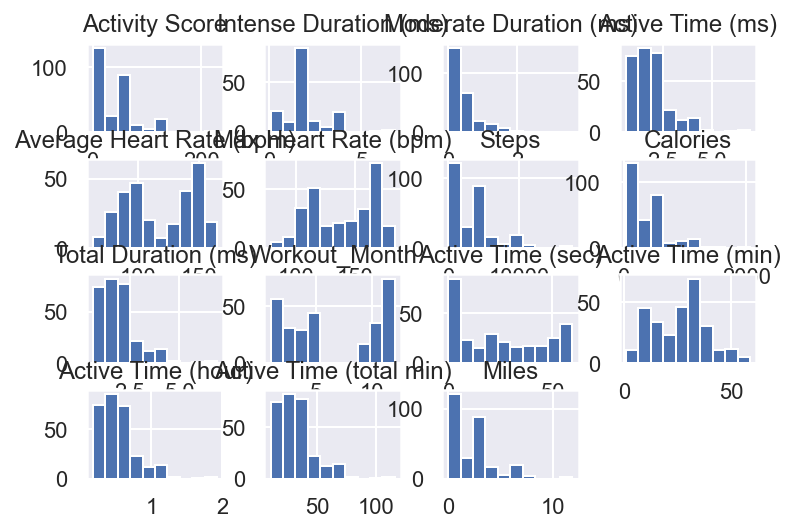

In [74]:
sns.set()
df.hist()

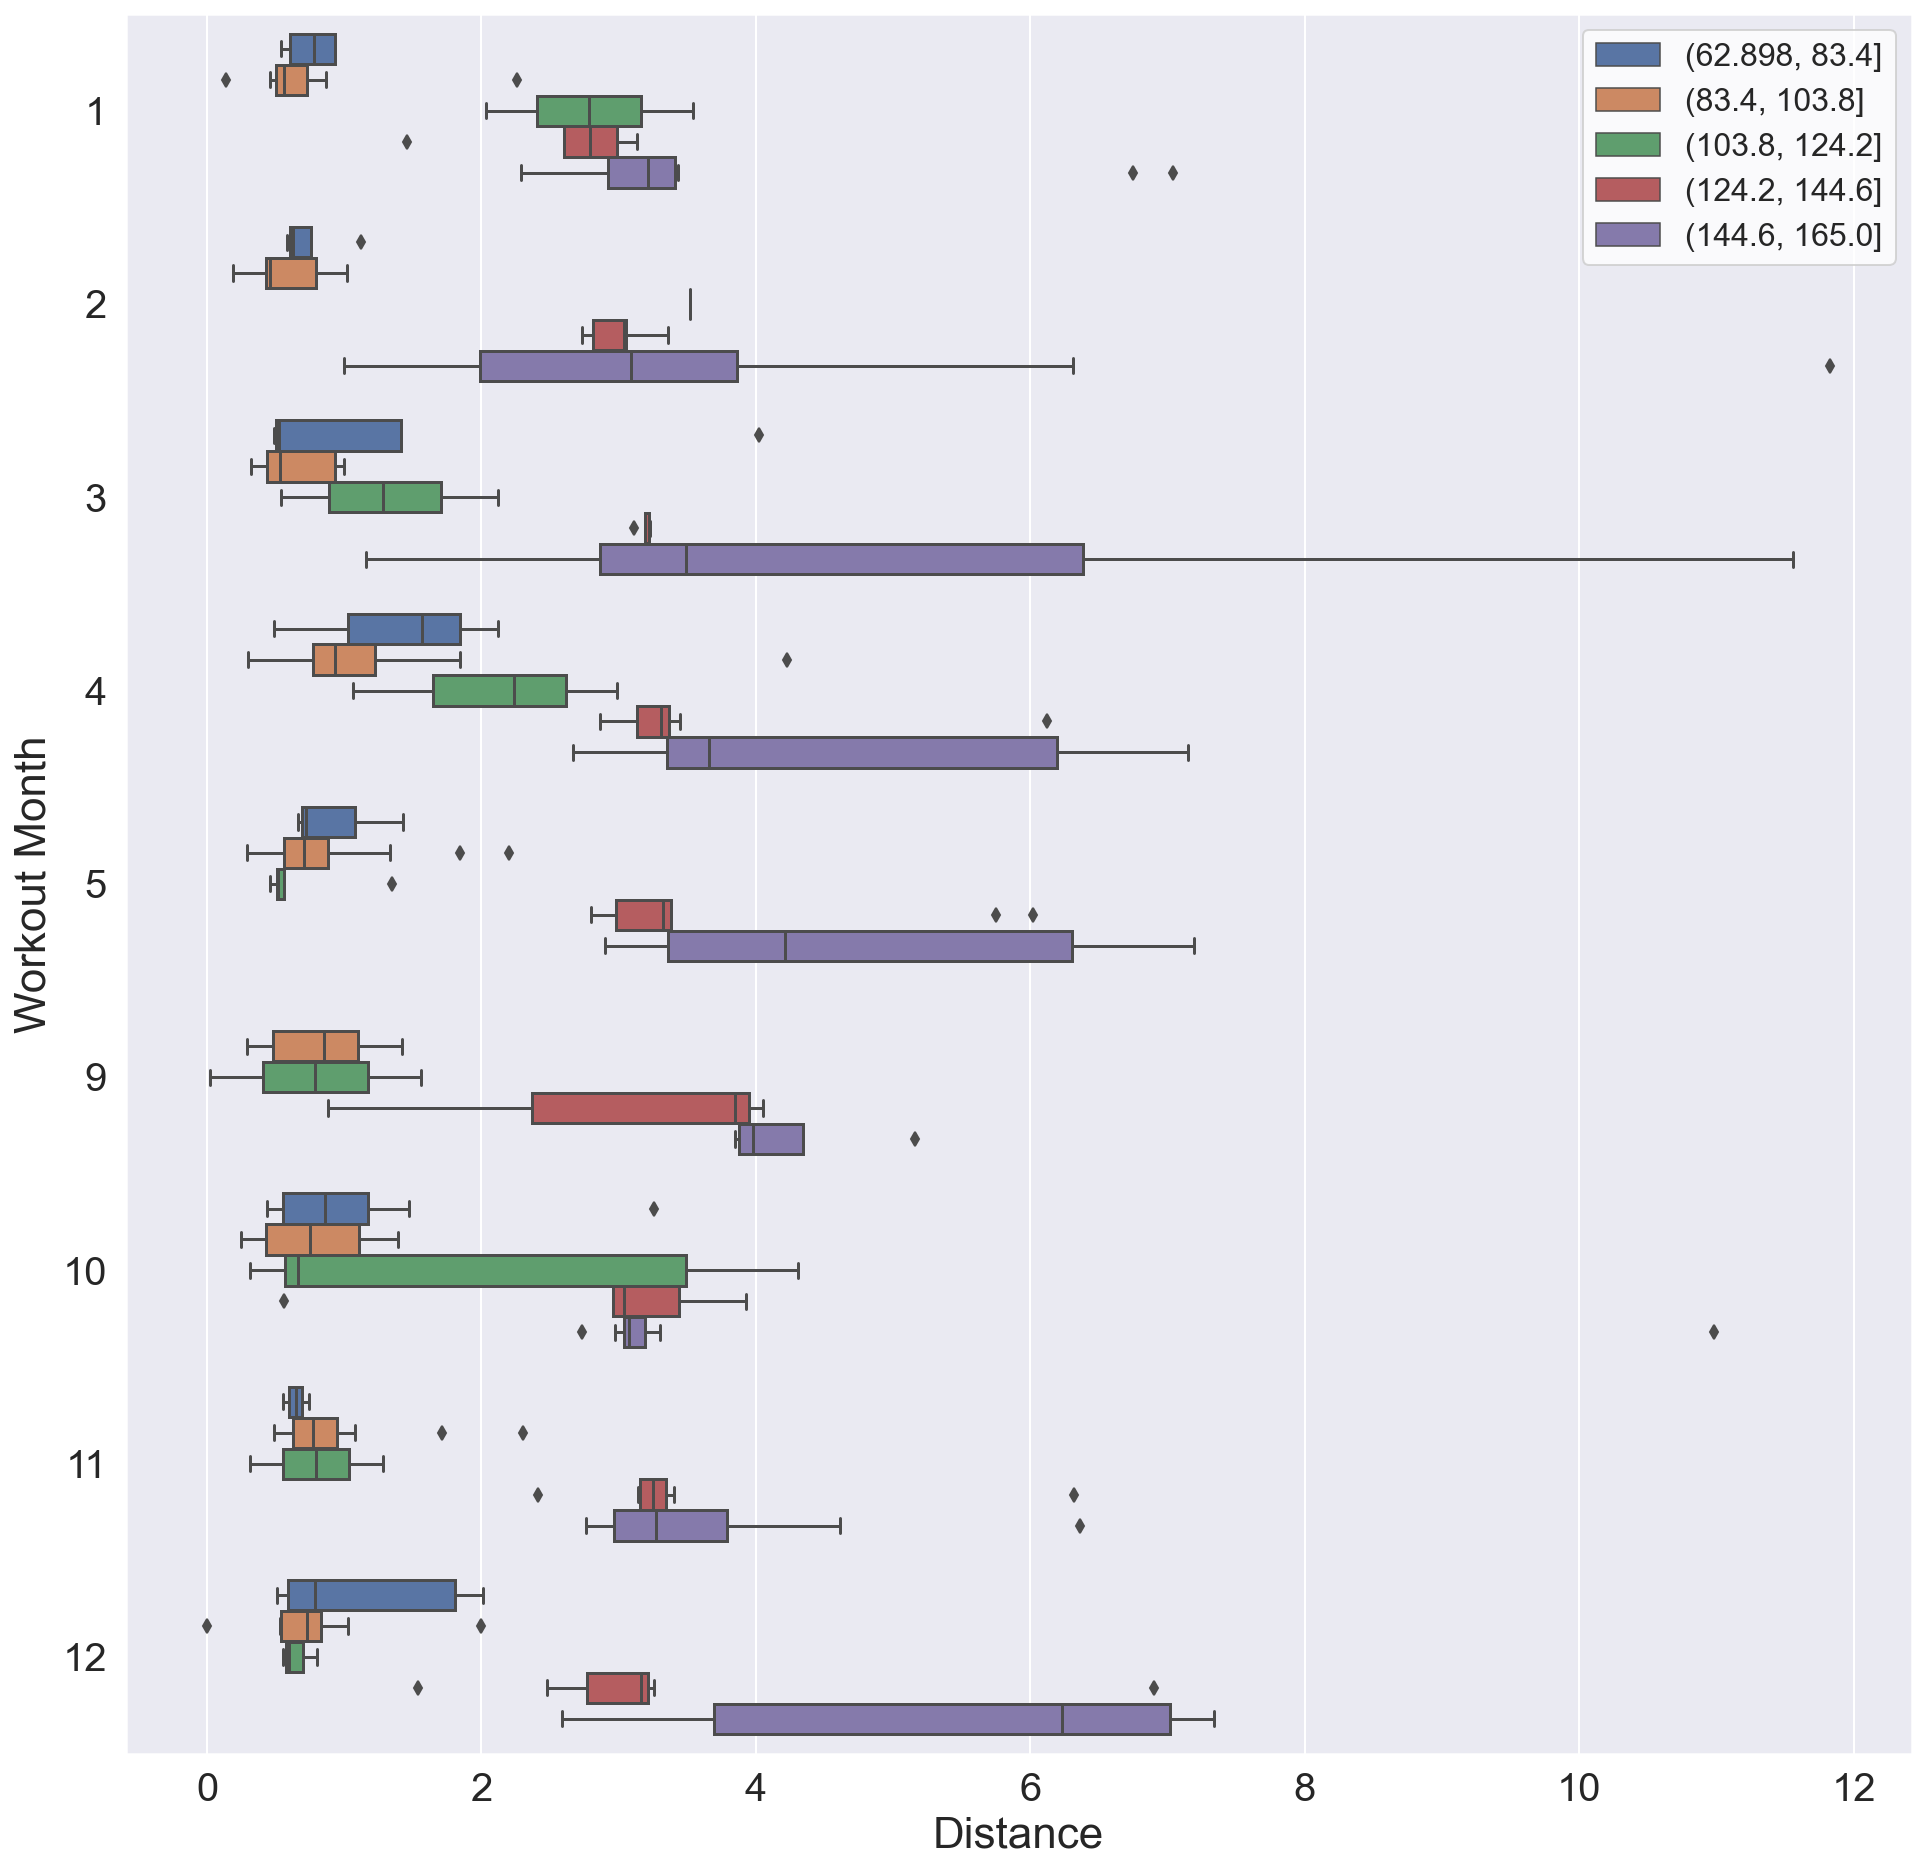

In [75]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Miles', y='Workout_Month', data=df, orient = 'h', hue = (pd.cut(df['Average Heart Rate (bpm)'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Workout Month', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

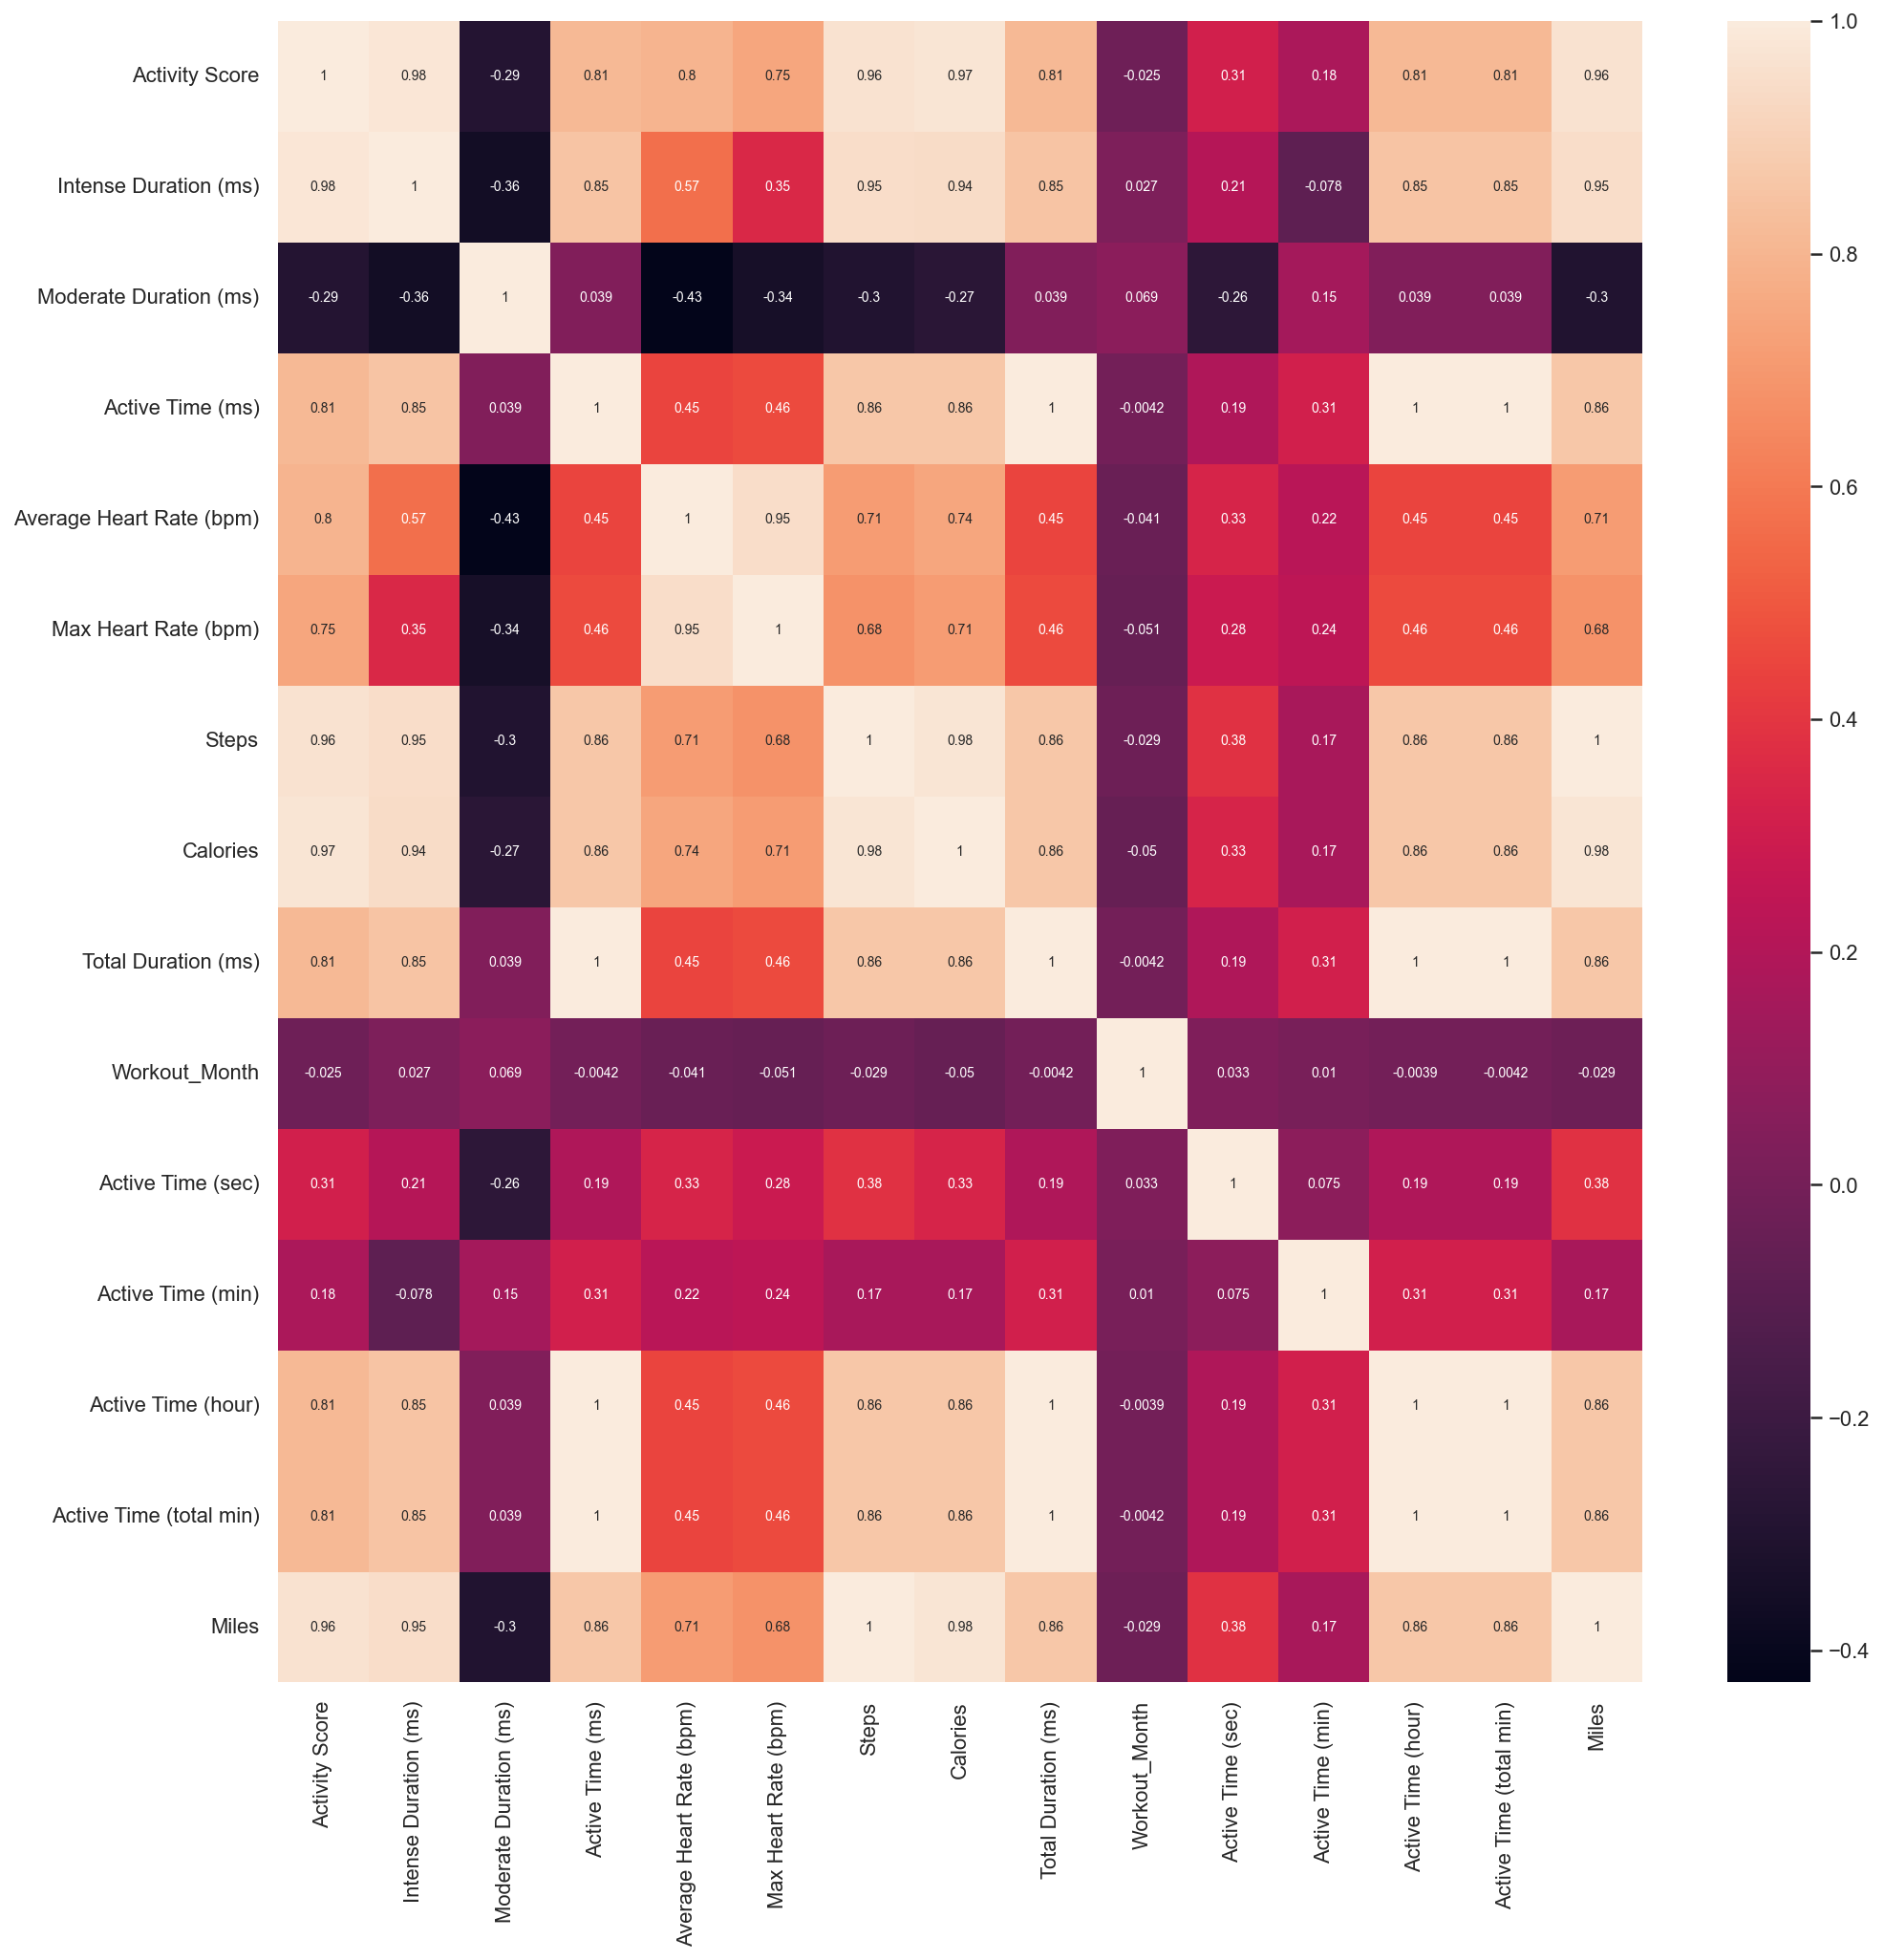

In [76]:
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)

In [77]:
# sns.set_context('talk')
# sns.pairplot(df, hue='Miles');

# Join Amazon Halo with Map My Run data

In [78]:
#I'm going to try using the web API first

In [79]:
# import os
# import requests
# # Get environment variables
# user = os.environ.get('MMRuser')
# #password = os.getenv('MMRpw')
# password = os.environ.get('MMRpw')

In [80]:
# import requests
# import json

# url = 'https://api.ua.com/v7.2/api_client/yourclientkey/'

# headers = {'Authorization': 'Bearer yourtoken', 'Api-Key': 'yourclient key'}

# data = {'callback_uri': 'https://www.exampleredirect.com/uacf/', 'application_title': 'New App Name'}

# requests.patch(url, headers=headers, data=json.dumps(data))

In [81]:
# r = requests.get('https://www.mapmyfitness.com/workout/export/csv', auth=('user', 'password'))
# r.headers['content-type']
# #'application/json; charset=utf8'
# r.encoding
# r.text


In [96]:
mmr_df = pd.read_csv(r'G:\My Drive\Coraline\Resources\csv data\user94403143_workout_history.csv', header=0)
mmr_df.info()
mmr_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          680 non-null    object 
 1   Workout Date            680 non-null    object 
 2   Activity Type           680 non-null    object 
 3   Calories Burned (kCal)  680 non-null    int64  
 4   Distance (mi)           680 non-null    float64
 5   Workout Time (seconds)  680 non-null    int64  
 6   Avg Pace (min/mi)       680 non-null    float64
 7   Max Pace (min/mi)       680 non-null    float64
 8   Avg Speed (mi/h)        680 non-null    float64
 9   Max Speed (mi/h)        680 non-null    float64
 10  Avg Heart Rate          448 non-null    float64
 11  Steps                   656 non-null    float64
 12  Notes                   680 non-null    object 
 13  Source                  680 non-null    object 
 14  Link                    680 non-null    ob

Date Submitted  Workout Date Activity Type  Calories Burned (kCal)  \
0   June 4, 2022  June 4, 2022           Run                     856   

   Distance (mi)  Workout Time (seconds)  Avg Pace (min/mi)  \
0        6.24228                    3946            10.5333   

   Max Pace (min/mi)  Avg Speed (mi/h)  Max Speed (mi/h)  Avg Heart Rate  \
0            1.06836            5.6962           56.1607           156.0   

     Steps Notes                          Source  \
0  10427.0   b''  Map My Fitness MapMyRun iPhone   

                                             Link  
0  http://www.mapmyfitness.com/workout/6623599279

In [97]:
mmr_df['Workout_Date'] = pd.to_datetime(mmr_df['Workout Date']).dt.date
mmr_df.head(1)

Date Submitted  Workout Date Activity Type  Calories Burned (kCal)  \
0   June 4, 2022  June 4, 2022           Run                     856   

   Distance (mi)  Workout Time (seconds)  Avg Pace (min/mi)  \
0        6.24228                    3946            10.5333   

   Max Pace (min/mi)  Avg Speed (mi/h)  Max Speed (mi/h)  Avg Heart Rate  \
0            1.06836            5.6962           56.1607           156.0   

     Steps Notes                          Source  \
0  10427.0   b''  Map My Fitness MapMyRun iPhone   

                                             Link Workout_Date  
0  http://www.mapmyfitness.com/workout/6623599279   2022-06-04

In [98]:
mdf = df.merge(mmr_df, on='Workout_Date', how='left')

In [99]:
mdf.info()
mdf.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              322 non-null    object 
 1   Session Subtype           322 non-null    object 
 2   Activity Score            321 non-null    float64
 3   Intense Duration (ms)     175 non-null    float64
 4   Moderate Duration (ms)    291 non-null    float64
 5   Active Time (ms)          322 non-null    float64
 6   Average Heart Rate (bpm)  322 non-null    float64
 7   Max Heart Rate (bpm)      322 non-null    float64
 8   Steps_x                   322 non-null    float64
 9   Calories                  322 non-null    float64
 10  Total Duration (ms)       322 non-null    float64
 11  Start Time DTG            322 non-null    object 
 12  End Time DTG              322 non-null    object 
 13  day_of_week_start         322 non-null    object 
 14  Workout_Mo

Index(['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Total Duration (ms)', 'Start Time DTG', 'End Time DTG',
       'day_of_week_start', 'Workout_Month', 'Workout_Month_Name',
       'Active Time (sec)', 'Active Time (min)', 'Active Time (hour)',
       'Active Time (total min)', 'Miles', 'Date Submitted', 'Workout Date',
       'Activity Type', 'Calories Burned (kCal)', 'Distance (mi)',
       'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)',
       'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps_y',
       'Notes', 'Source', 'Link'],
      dtype='object')

In [100]:
#I will make a trimmed version of my merged dataframe
mdft = mdf[['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x', 'Steps_y',
       'Calories', 'Total Duration (ms)', 'Start Time DTG', 'End Time DTG',
       'day_of_week_start', 'Workout_Month', 'Workout_Month_Name',
       'Active Time (sec)', 'Active Time (min)', 'Active Time (hour)',
       'Active Time (total min)', 'Miles', 'Distance (mi)', ]]

In [101]:
mdft.head(1)

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-05-31           OTHER           24.85                    NaN   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0               1440000.0         2640000.0                      94.0   

   Max Heart Rate (bpm)  Steps_x  Steps_y  ...  \
0                 117.0   1645.0   4048.0  ...   

                          End Time DTG  day_of_week_start Workout_Month  \
0  Tue, May 31 2022 at 01:18:00 PM UTC            Tuesday             5   

  Workout_Month_Name Active Time (sec)  Active Time (min) Active Time (hour)  \
0                May               0.0               44.0               0.73   

   Active Time (total min)  Miles  Distance (mi)  
0                     44.0   1.12           4.08  

[1 rows x 23 columns]

## Cleaning

In [102]:
mdft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              322 non-null    object 
 1   Session Subtype           322 non-null    object 
 2   Activity Score            321 non-null    float64
 3   Intense Duration (ms)     175 non-null    float64
 4   Moderate Duration (ms)    291 non-null    float64
 5   Active Time (ms)          322 non-null    float64
 6   Average Heart Rate (bpm)  322 non-null    float64
 7   Max Heart Rate (bpm)      322 non-null    float64
 8   Steps_x                   322 non-null    float64
 9   Steps_y                   255 non-null    float64
 10  Calories                  322 non-null    float64
 11  Total Duration (ms)       322 non-null    float64
 12  Start Time DTG            322 non-null    object 
 13  End Time DTG              322 non-null    object 
 14  day_of_wee

In [103]:
#check the percentage of empty values
for col in mdft.columns:
    pct_missing = np.mean(mdft[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Workout_Date - 0%
Session Subtype - 0%
Activity Score - 0%
Intense Duration (ms) - 46%
Moderate Duration (ms) - 10%
Active Time (ms) - 0%
Average Heart Rate (bpm) - 0%
Max Heart Rate (bpm) - 0%
Steps_x - 0%
Steps_y - 21%
Calories - 0%
Total Duration (ms) - 0%
Start Time DTG - 0%
End Time DTG - 0%
day_of_week_start - 0%
Workout_Month - 0%
Workout_Month_Name - 0%
Active Time (sec) - 0%
Active Time (min) - 0%
Active Time (hour) - 0%
Active Time (total min) - 0%
Miles - 0%
Distance (mi) - 21%


created missing indicator for: Activity Score
created missing indicator for: Intense Duration (ms)
created missing indicator for: Moderate Duration (ms)
created missing indicator for: Steps_y
created missing indicator for: Distance (mi)


Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-05-31           OTHER           24.85                    NaN   
1   2022-05-31         RUNNING           92.57              2700000.0   
2   2022-05-30         WALKING           10.97                    NaN   
3   2022-05-30         RUNNING           65.65              1860000.0   
4   2022-05-29         WALKING            1.37                    NaN   
5   2022-05-28           OTHER           16.70                    NaN   
6   2022-05-28         RUNNING           62.89              1858828.0   
7   2022-05-27           OTHER           19.40                    NaN   
8   2022-05-27           OTHER           13.25                    NaN   
9   2022-05-27         RUNNING           59.13              1740000.0   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0               1440000.0         2640000.0                      94.0   
1                150765.0         2920207.0                     146.0   
2                658179.0          718179.0                     114.0   
3                218941.0         2087481.0                     155.0   
4                     NaN         1940845.0                      63.0   
5                960000.0         2040000.0                      96.0   
6                 55610.0         1914438.0                     161.0   
7               1140000.0         1980000.0                      97.0   
8                780000.0         1380000.0                     100.0   
9                 65189.0         1858014.0                     145.0   

   Max Heart Rate (bpm)  Steps_x  Steps_y  ...  Active Time (hour)  \
0                 117.0   1645.0   4048.0  ...                0.73   
1                 164.0   7446.0   4048.0  ...                0.81   
2                 126.0    822.0   4873.0  ...                0.20   
3                 172.0   5246.0   4873.0  ...                0.58   
4                  79.0   2103.0      NaN  ...                0.54   
5                 120.0   1174.0   4867.0  ...                0.57   
6                 172.0   5019.0   4867.0  ...                0.53   
7                 117.0   1296.0   4520.0  ...                0.55   
8                 123.0    434.0   4520.0  ...                0.38   
9                 165.0   4396.0   4520.0  ...                0.52   

   Active Time (total min) Miles Distance (mi) Activity Score_ismissing  \
0                    44.00  1.12       4.08000                    False   
1                    48.67  5.05       4.08000                    False   
2                    11.97  0.56       3.10044                    False   
3                    34.79  3.56       3.10044                    False   
4                    32.35  1.43           NaN                    False   
5                    34.00  0.80       3.10717                    False   
6                    31.91  3.40       3.10717                    False   
7                    33.00  0.88       3.10000                    False   
8                    23.00  0.29       3.10000                    False   
9                    30.97  2.98       3.10000                    False   

   Intense Duration (ms)_ismissing Moderate Duration (ms)_ismissing  \
0                             True                            False   
1                            False                            False   
2                             True                            False   
3                            False                            False   
4                             True                             True   
5                             True                            False   
6                            False                            False   
7                             True                            False   
8                             True                            False   
9                            False                            False   

   Steps_y_ismi

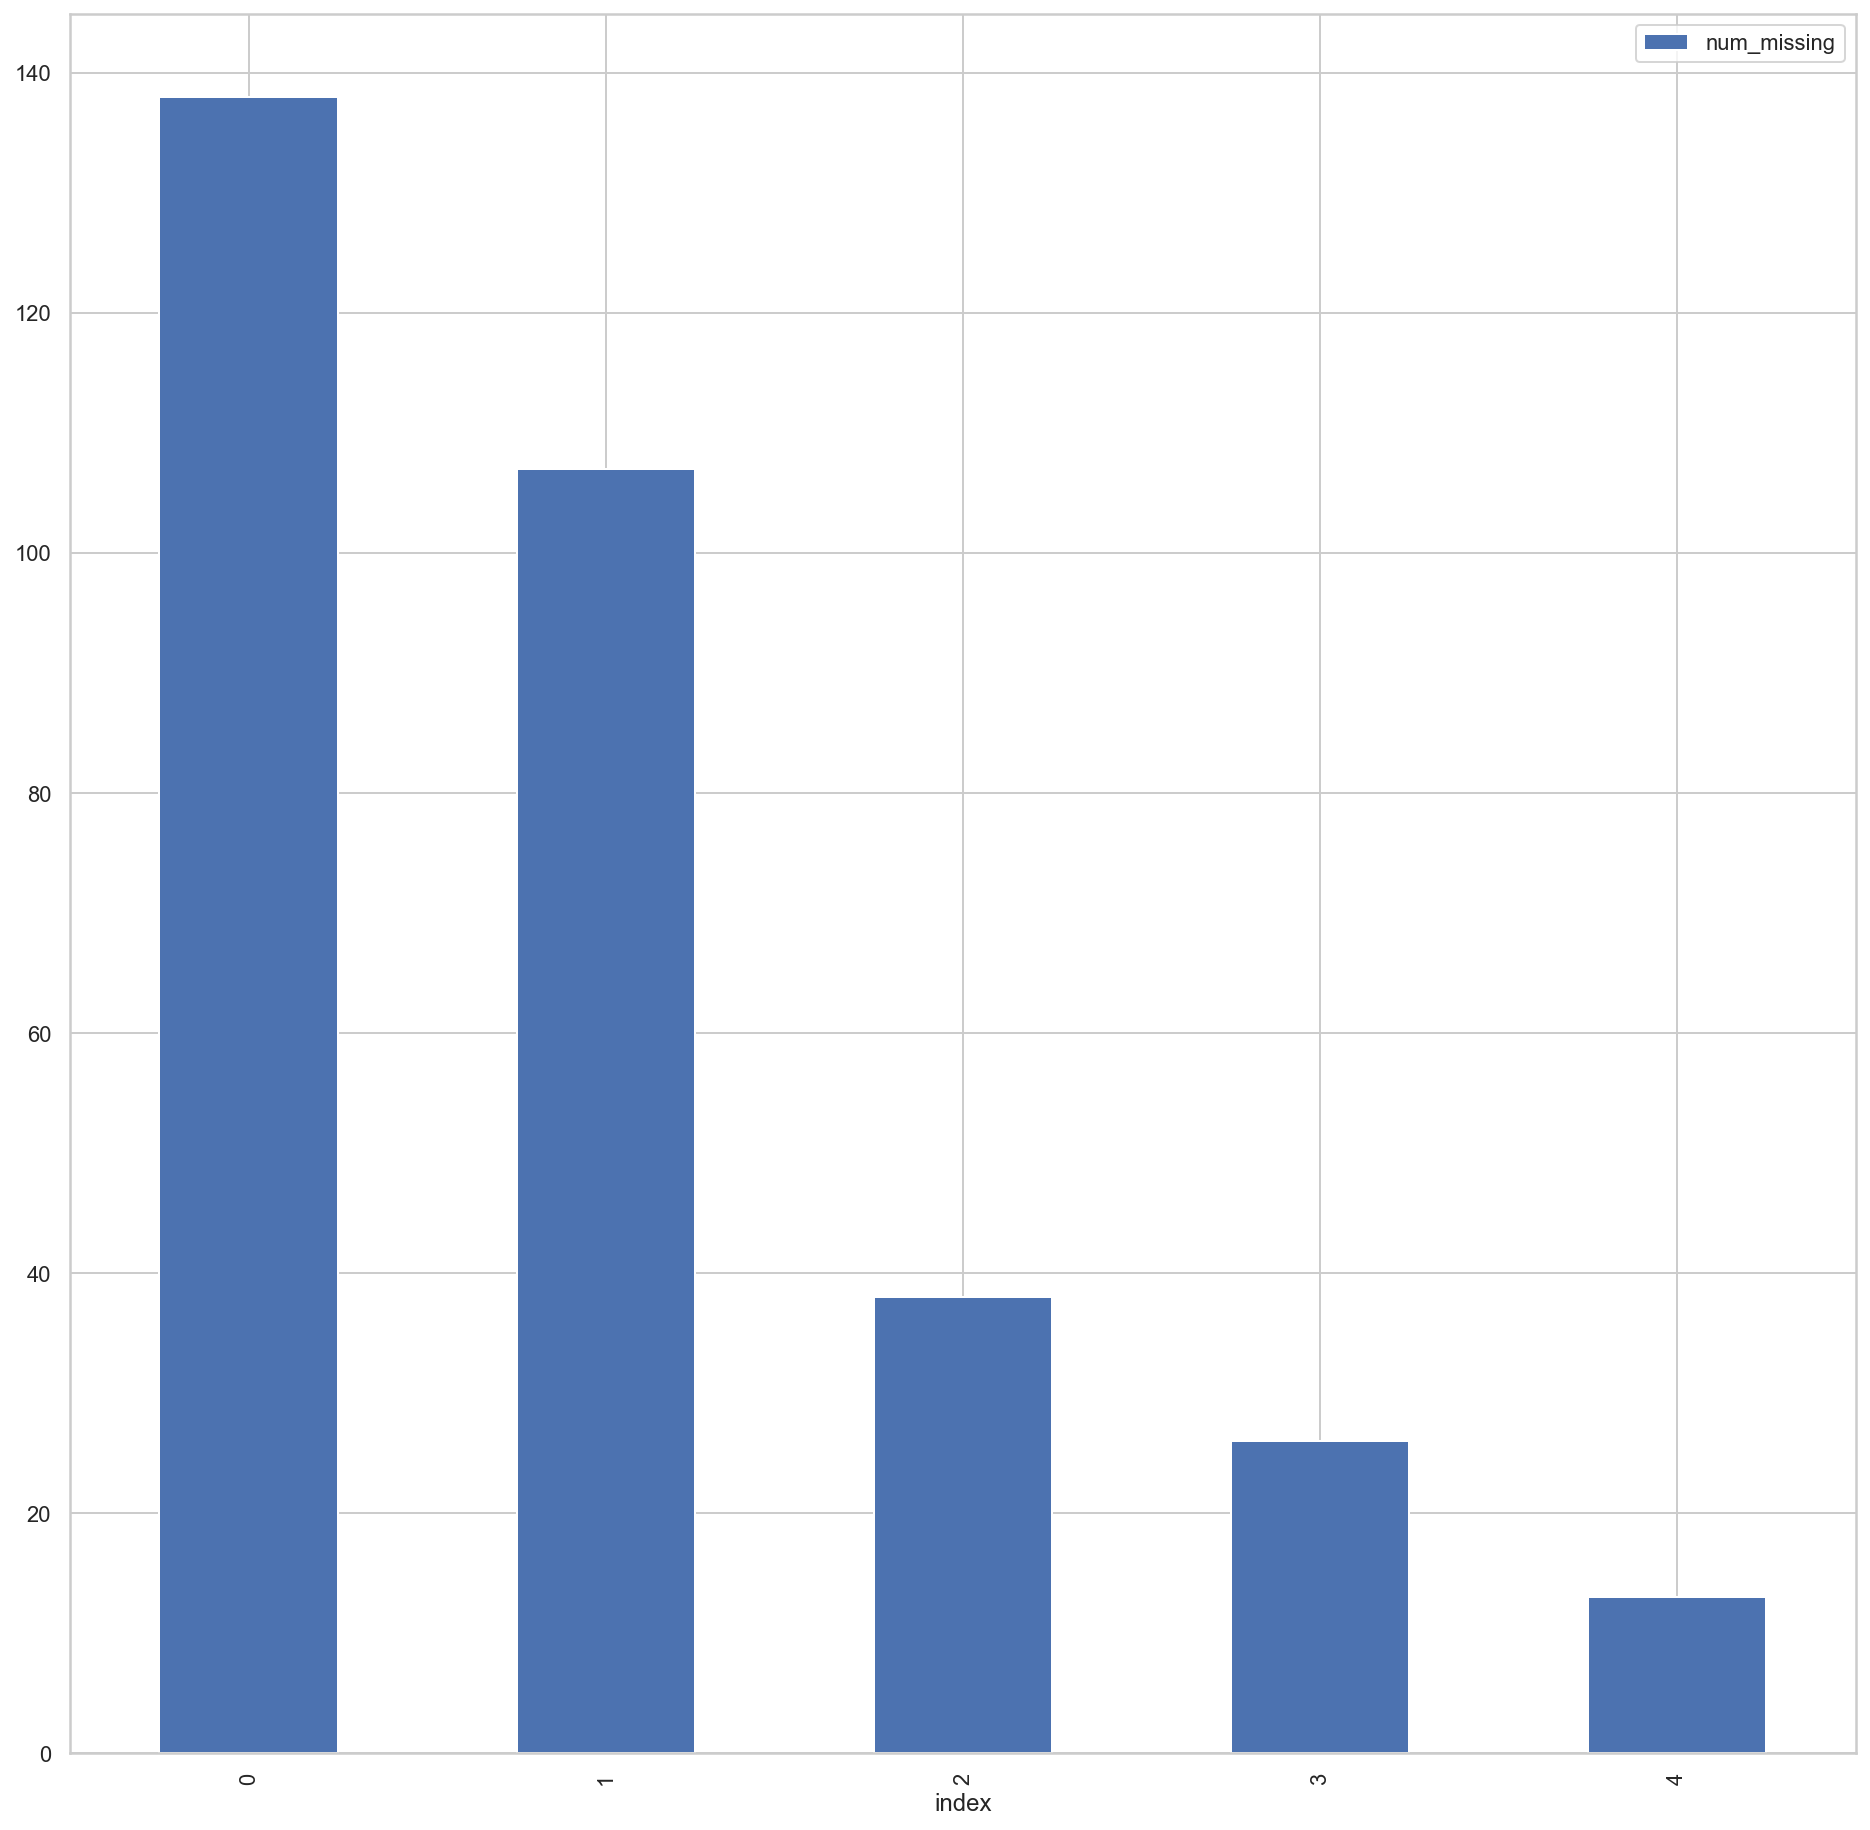

In [104]:
for col in mdft.columns:
    missing = mdft[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        mdft['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in mdft.columns if 'ismissing' in col]
mdft['num_missing'] = mdft[ismissing_cols].sum(axis=1)

mdft['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
mdft.head(10)

In [105]:
# drop rows with missing values.
ind_missing = mdft[mdft['Distance (mi)_ismissing'] == 1].index
mdft_lmr = mdft.drop(ind_missing, axis=0)

ind_missing2 = mdft[mdft['Activity Score_ismissing'] == 1].index
mdft_lmr2 = mdft_lmr.drop(ind_missing2, axis=0)


mdft_lmr2.columns

Index(['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Steps_y', 'Calories', 'Total Duration (ms)', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start', 'Workout_Month',
       'Workout_Month_Name', 'Active Time (sec)', 'Active Time (min)',
       'Active Time (hour)', 'Active Time (total min)', 'Miles',
       'Distance (mi)', 'Activity Score_ismissing',
       'Intense Duration (ms)_ismissing', 'Moderate Duration (ms)_ismissing',
       'Steps_y_ismissing', 'Distance (mi)_ismissing', 'num_missing'],
      dtype='object')

In [106]:
#I am going to shorten the name of the DF
df2 = mdft_lmr2[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start']]
df2.head(1)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
0   2022-05-31           4.08           OTHER           24.85   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
0                      94.0                 117.0   1645.0     253.0   

   Active Time (total min) day_of_week_start  
0                     44.0           Tuesday

In [107]:
rdf2 = df2[df2['Session Subtype'] == "RUNNING"]
rdf2.head(2)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
1   2022-05-31        4.08000         RUNNING           92.57   
3   2022-05-30        3.10044         RUNNING           65.65   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
1                     146.0                 164.0   7446.0     807.0   
3                     155.0                 172.0   5246.0     630.0   

   Active Time (total min) day_of_week_start  
1                    48.67           Tuesday  
3                    34.79            Monday

<AxesSubplot:>

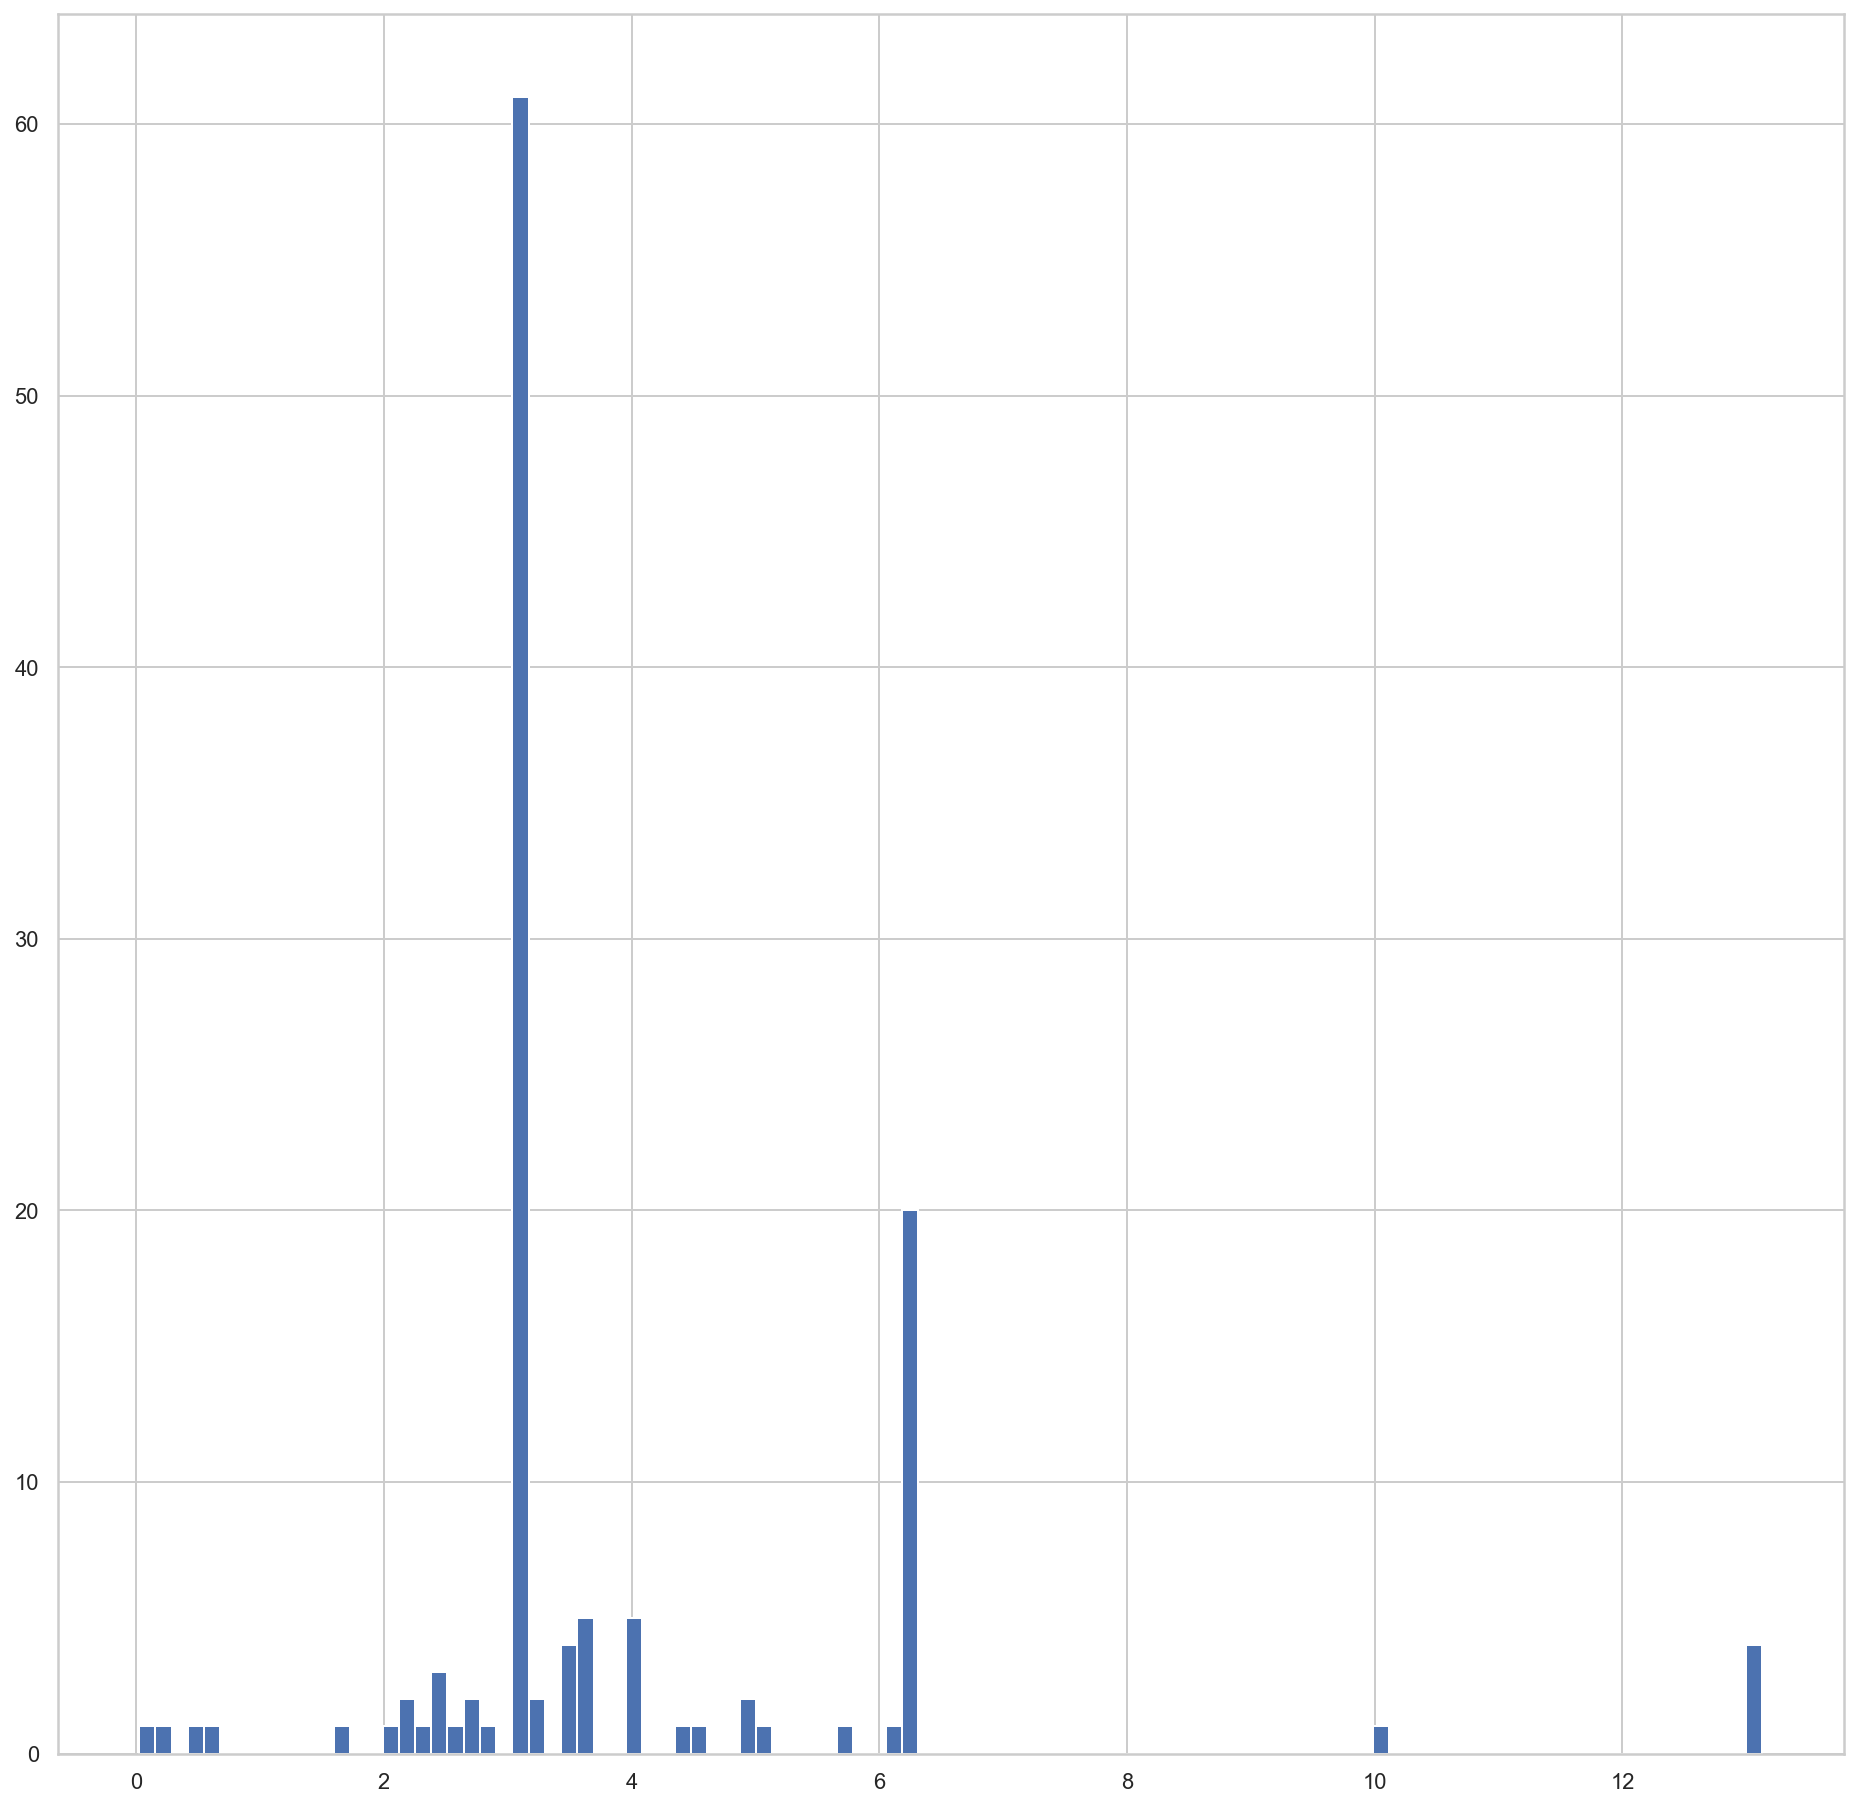

In [108]:
rdf2['Distance (mi)'].hist(bins=100)

In [109]:
#I noticed too many half-marathons in this dataset, so I will visually inspect the DF
pd.set_option('display.max_rows', 8)
rdf2.sort_values(by='Distance (mi)', ascending = False)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
220   2021-12-05      13.130000         RUNNING          133.30   
218   2021-12-05      13.130000         RUNNING           79.44   
111   2022-03-06      13.100000         RUNNING           27.58   
112   2022-03-06      13.100000         RUNNING          225.86   
..           ...            ...             ...             ...   
89    2022-03-27       0.662913         RUNNING           62.92   
158   2022-01-31       0.440799         RUNNING           44.01   
78    2022-04-03       0.251156         RUNNING          132.54   
153   2022-02-02       0.024211         RUNNING           61.03   

     Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
220                     153.0                 165.0  10440.0    1161.0   
218                     145.0                 162.0   6448.0     749.0   
111                     148.0                 167.0   2075.0     263.0   
112                     159.0                 173.0  17055.0    2060.0   
..                        ...                   ...      ...       ...   
89                      150.0                 170.0   5142.0     538.0   
158                     149.0                 172.0   3382.0     387.0   
78                      159.0                 174.0  10553.0    1317.0   
153                     140.0                 160.0   4961.0     530.0   

     Active Time (total min) day_of_week_start  
220                    68.38            Sunday  
218                    47.22            Sunday  
111                    15.79            Sunday  
112                   113.93            Sunday  
..                       ...               ...  
89                     33.87            Sunday  
158                    24.92            Monday  
78                     68.54            Sunday  
153                    36.09         Wednesday  

[125 rows x 10 columns]

In [110]:
rdf2.drop_duplicates(subset ="Workout_Date",
                     keep = False, inplace = True)
rdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 321
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              81 non-null     object 
 1   Distance (mi)             81 non-null     float64
 2   Session Subtype           81 non-null     object 
 3   Activity Score            81 non-null     float64
 4   Average Heart Rate (bpm)  81 non-null     float64
 5   Max Heart Rate (bpm)      81 non-null     float64
 6   Steps_x                   81 non-null     float64
 7   Calories                  81 non-null     float64
 8   Active Time (total min)   81 non-null     float64
 9   day_of_week_start         81 non-null     object 
dtypes: float64(7), object(3)
memory usage: 7.0+ KB


<AxesSubplot:>

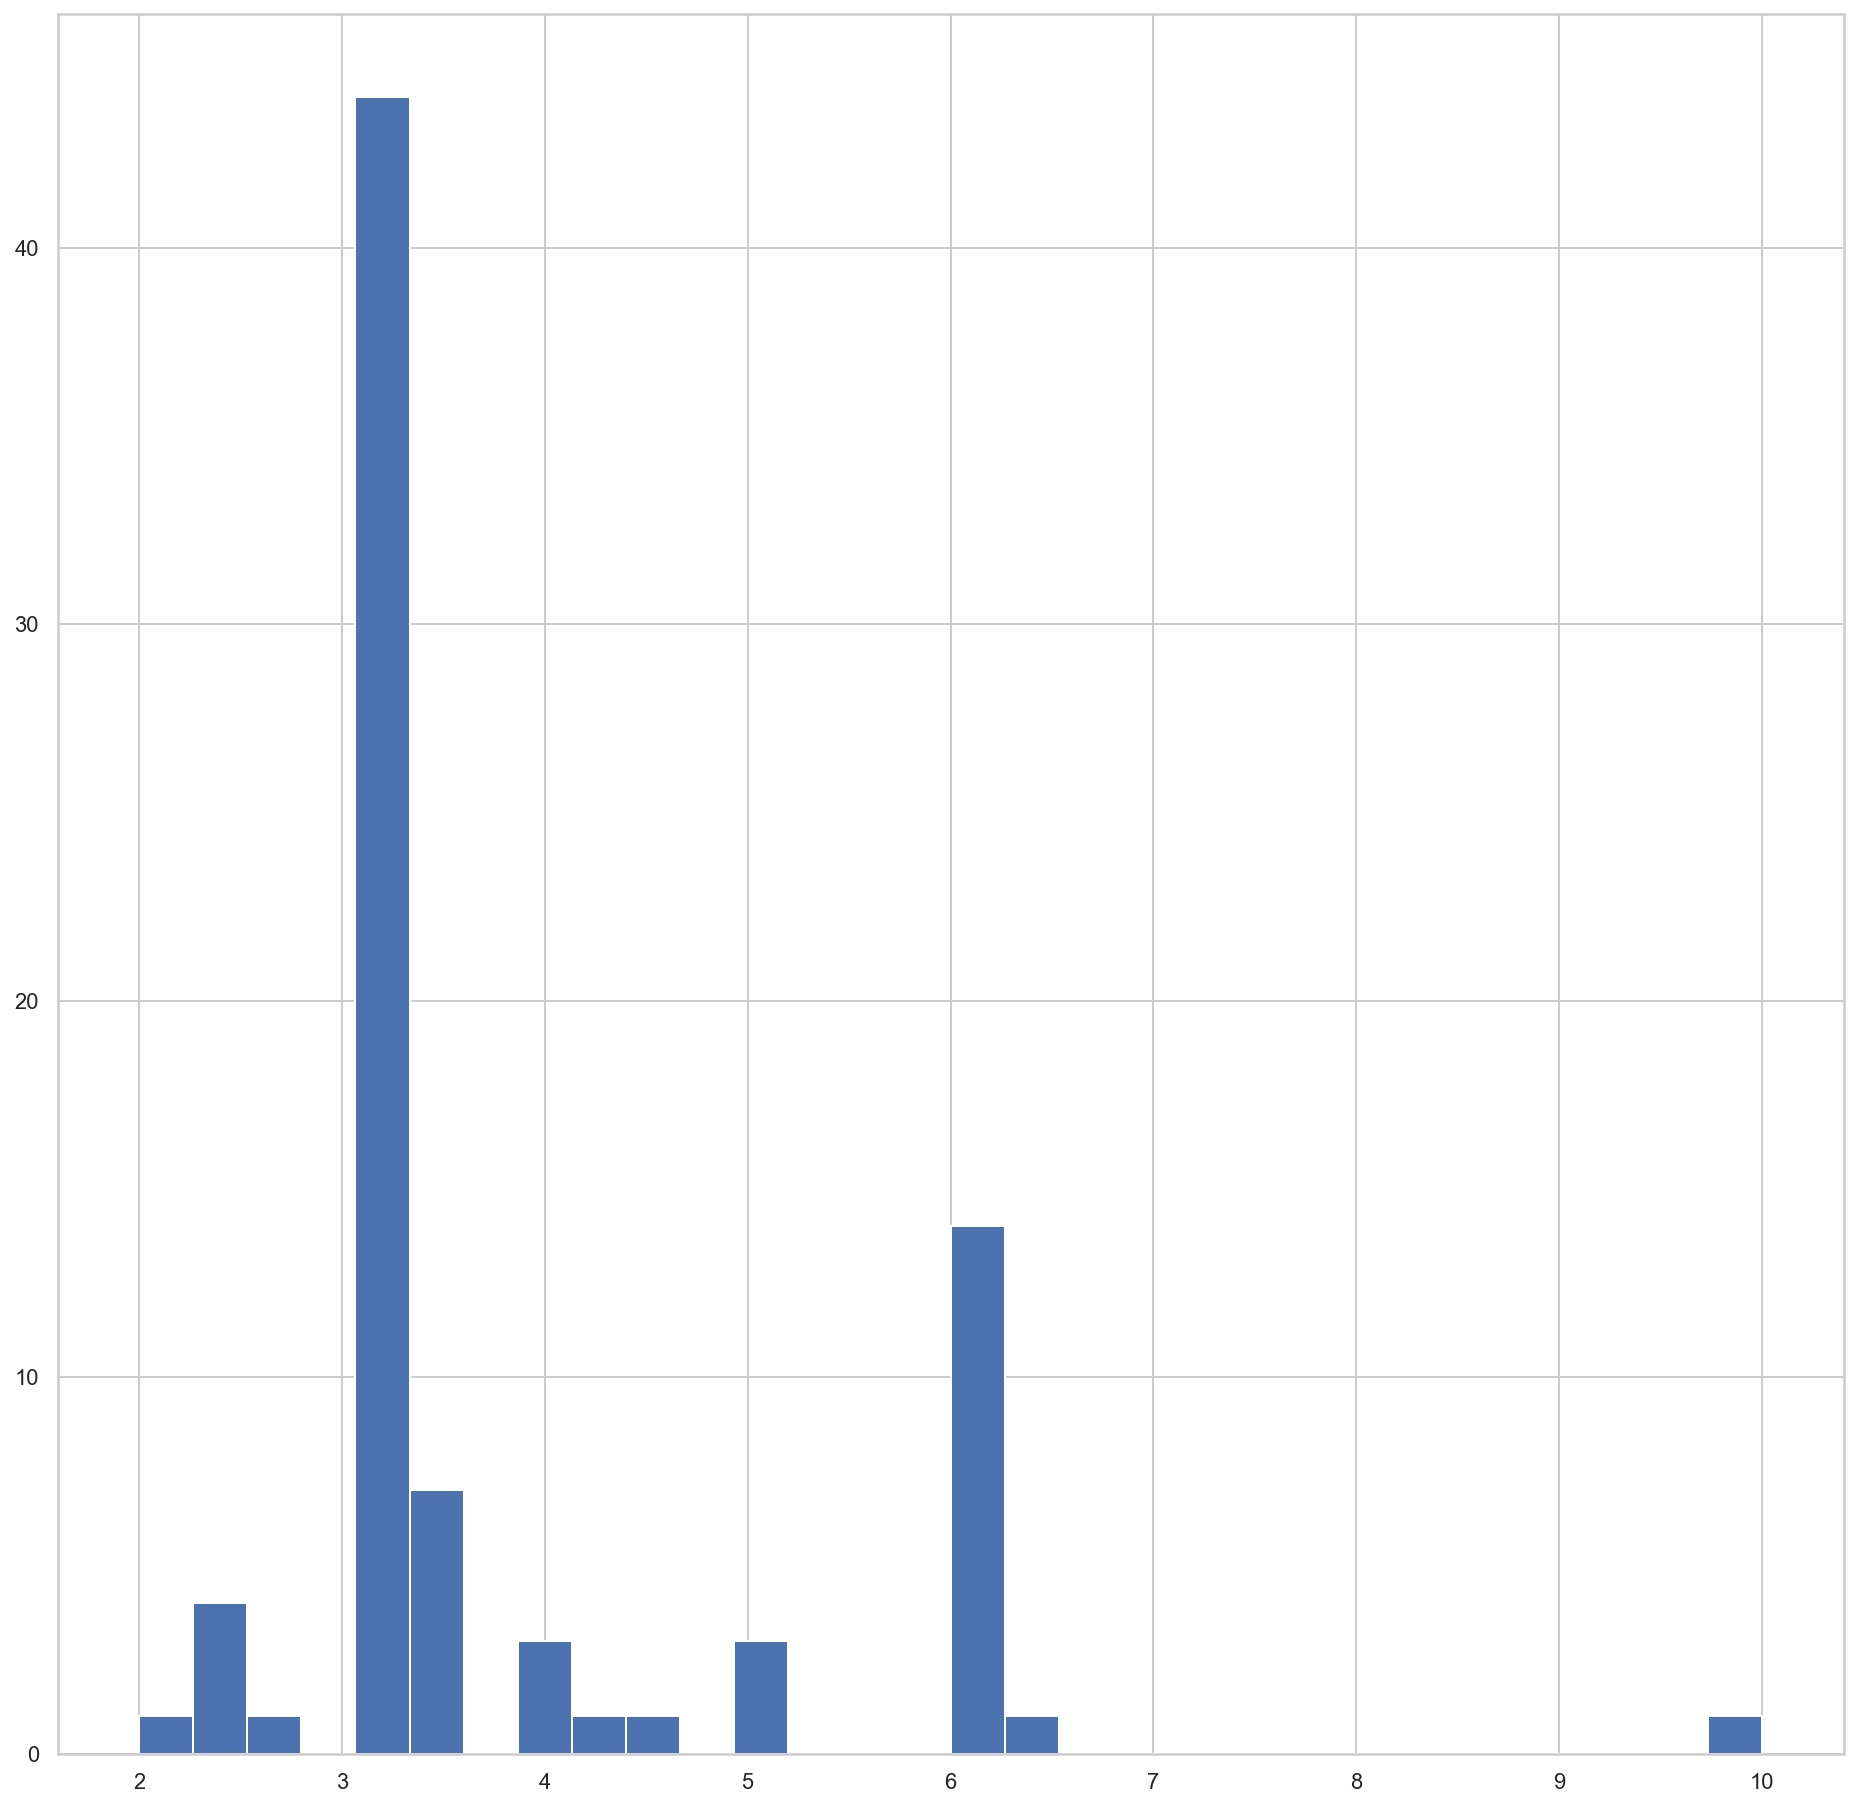

In [111]:
rdf2['Distance (mi)'].hist(bins=30)

## Double Checking my Join

In [ ]:
# merged = pd.merge(df,mmr_df,on=['Workout_Date'], how='outer').drop_duplicates()
# merged.info()
# merged.columns

In [ ]:
# merged2 = merged[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
#        'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
#        'Calories', 'day_of_week_start', 'Local Start Time DTG',
#        'Local End Time DTG', 'Local Start Time', 'Local End Time',
#        'Active Time (total min)']]

In [ ]:
# merged2.info()
# merged2.sort_values(by='Workout_Date', ascending = False)


In [ ]:
# mrg3 = merged2.drop_duplicates()
# mrg4 = mrg3.dropna()
# mrg4.info()

## EDA

Now that I have cleaned and merged my dataframes, I will explore the data

In [112]:
rdf2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

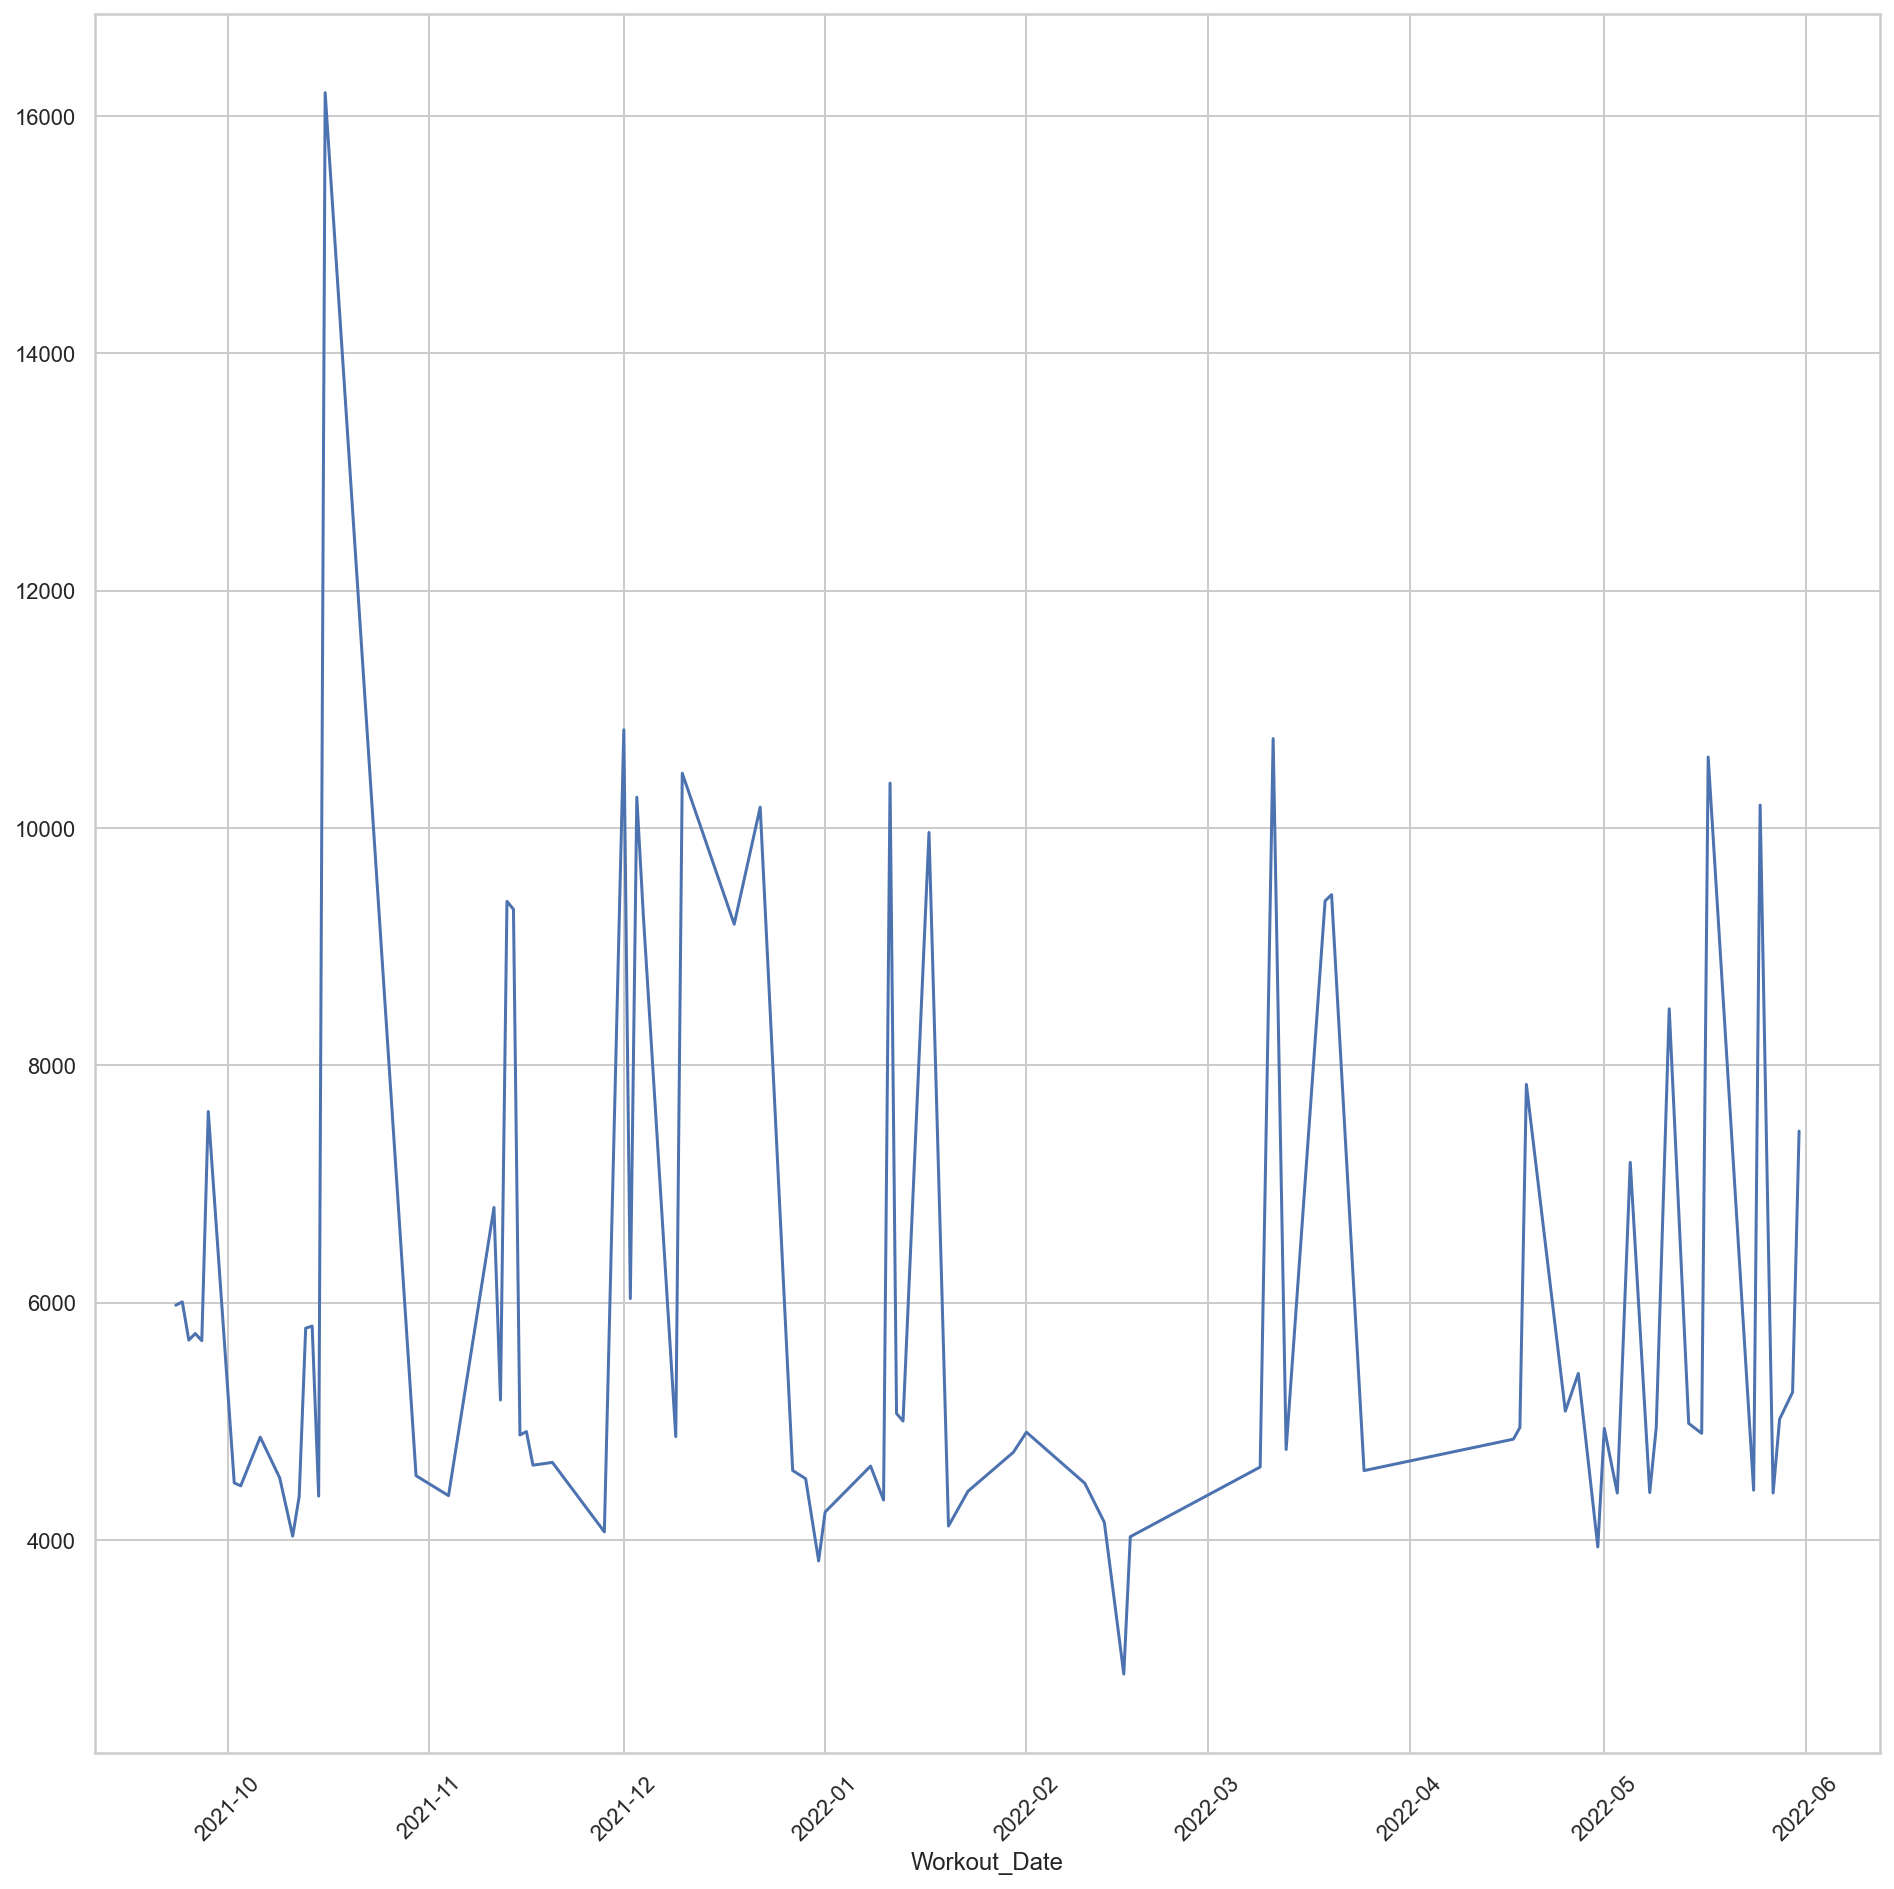

In [113]:
# show data with a mask filter (running only)
mask1 = rdf2['Session Subtype'] == 'RUNNING'
(
    rdf2[mask1]
    .set_index('Workout_Date')
    ['Steps_x']
    .plot(rot = 45)
)

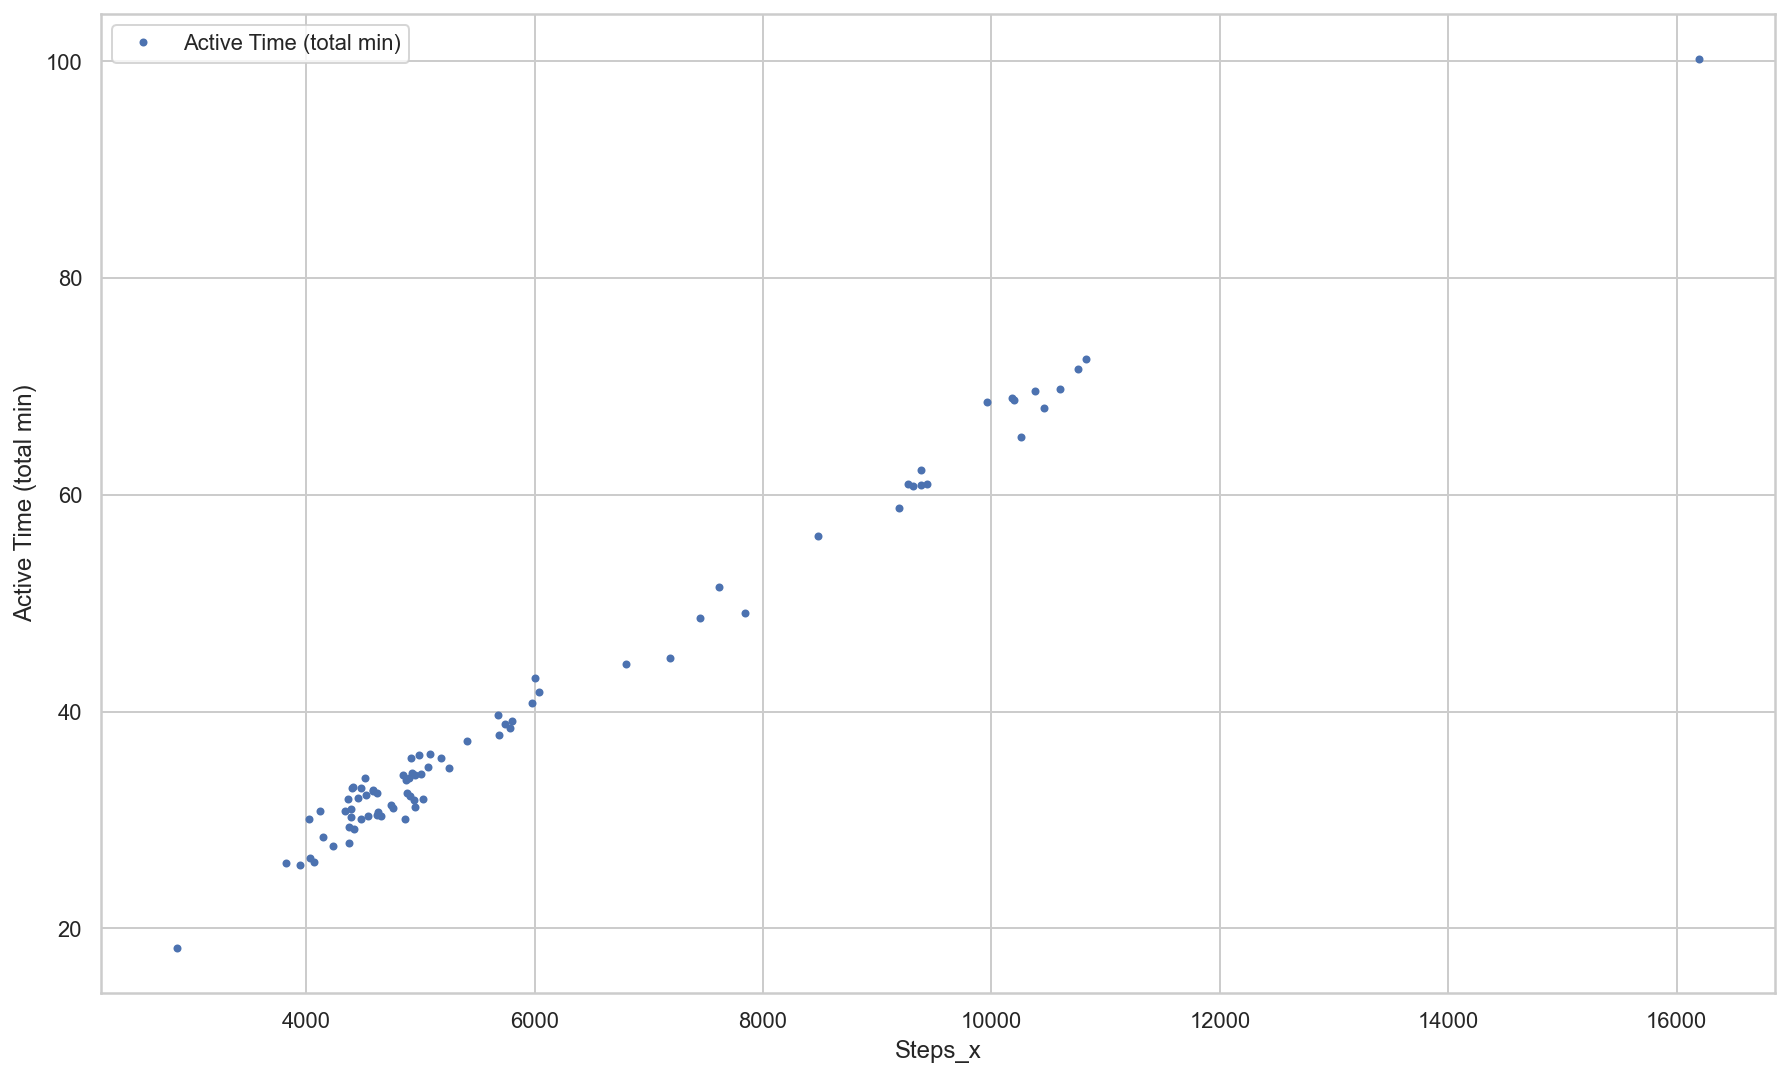

In [114]:
#scatter plotting my steps against my total minutes
axes = rdf2.plot(x='Steps_x', y='Active Time (total min)', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Active Time (total min)')

In [115]:
rdf2.corr()

Distance (mi)  Activity Score  \
Distance (mi)                  1.000000        0.984928   
Activity Score                 0.984928        1.000000   
Average Heart Rate (bpm)       0.262799        0.237274   
Max Heart Rate (bpm)           0.281087        0.276970   
Steps_x                        0.982726        0.997827   
Calories                       0.940175        0.956988   
Active Time (total min)        0.972308        0.995587   

                          Average Heart Rate (bpm)  Max Heart Rate (bpm)  \
Distance (mi)                             0.262799              0.281087   
Activity Score                            0.237274              0.276970   
Average Heart Rate (bpm)                  1.000000              0.896938   
Max Heart Rate (bpm)                      0.896938              1.000000   
Steps_x                                   0.236807              0.276648   
Calories                                  0.342730              0.372291   
Active Time (total min)                   0.198050              0.260916   

                           Steps_x  Calories  Active Time (total min)  
Distance (mi)             0.982726  0.940175                 0.972308  
Activity Score            0.997827  0.956988                 0.995587  
Average Heart Rate (bpm)  0.236807  0.342730                 0.198050  
Max Heart Rate (bpm)      0.276648  0.372291                 0.260916  
Steps_x                   1.000000  0.956139                 0.994422  
Calories                  0.956139  1.000000                 0.952505  
Active Time (total min)   0.994422  0.952505                 1.000000

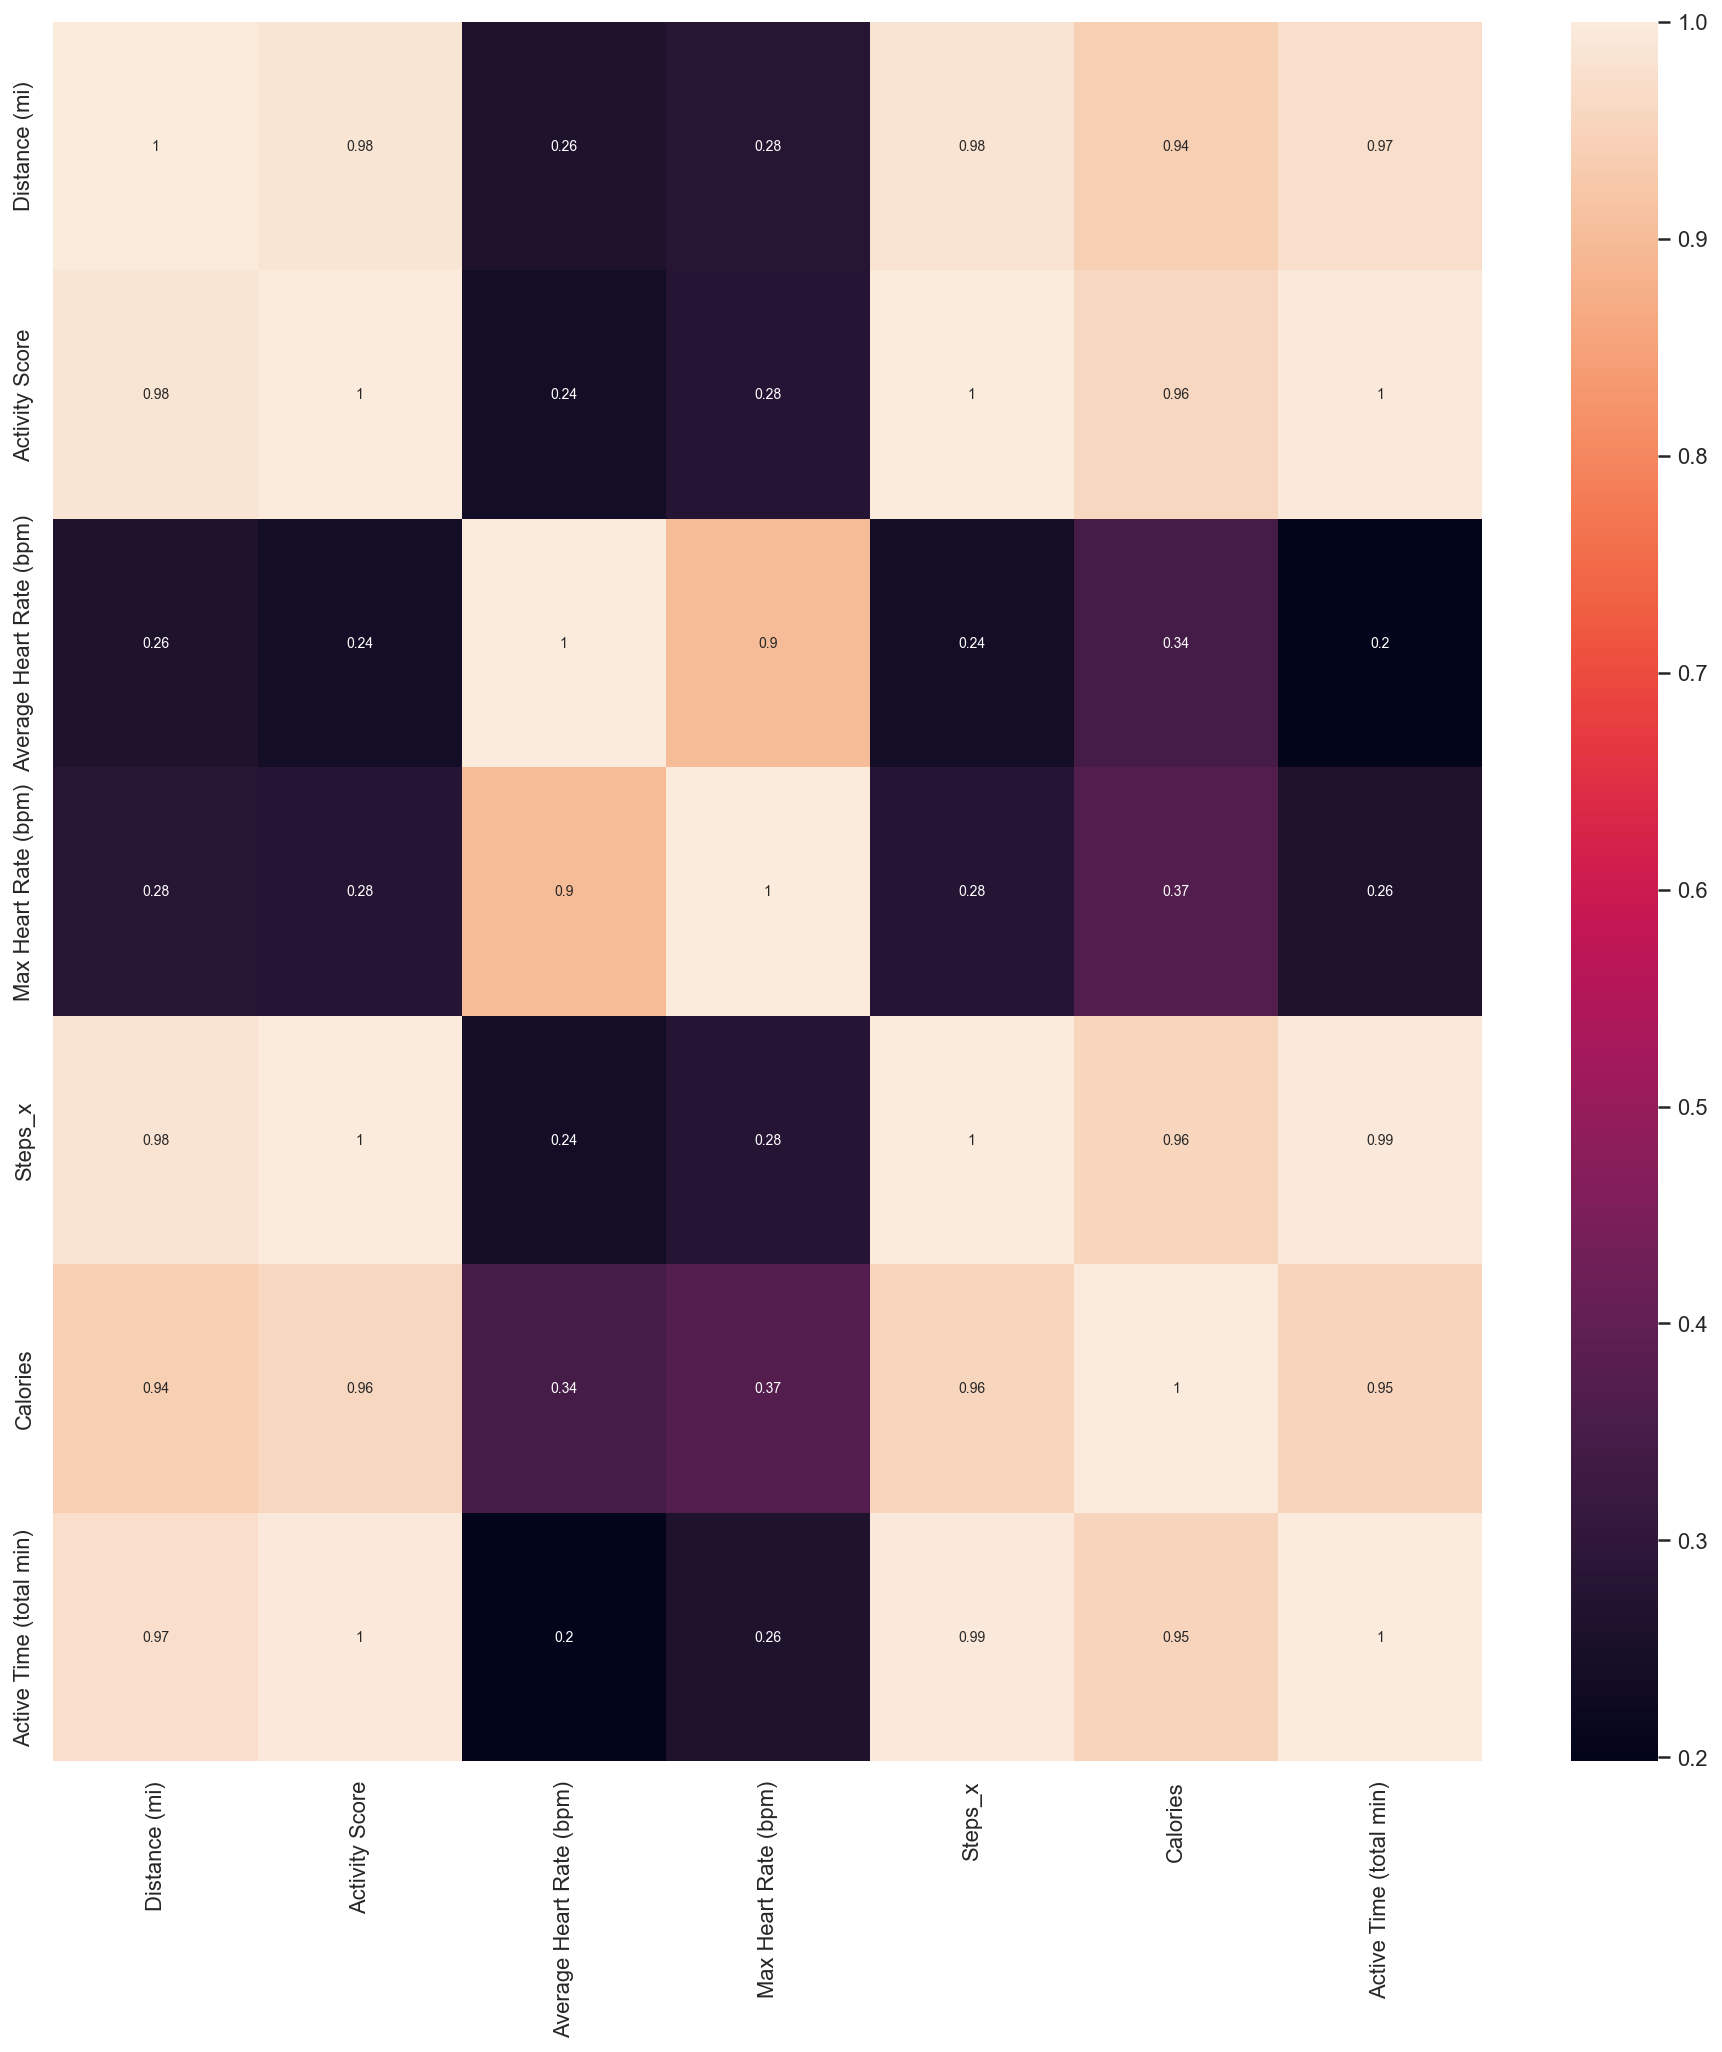

In [116]:
p1 = sns.heatmap(
    rdf2
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


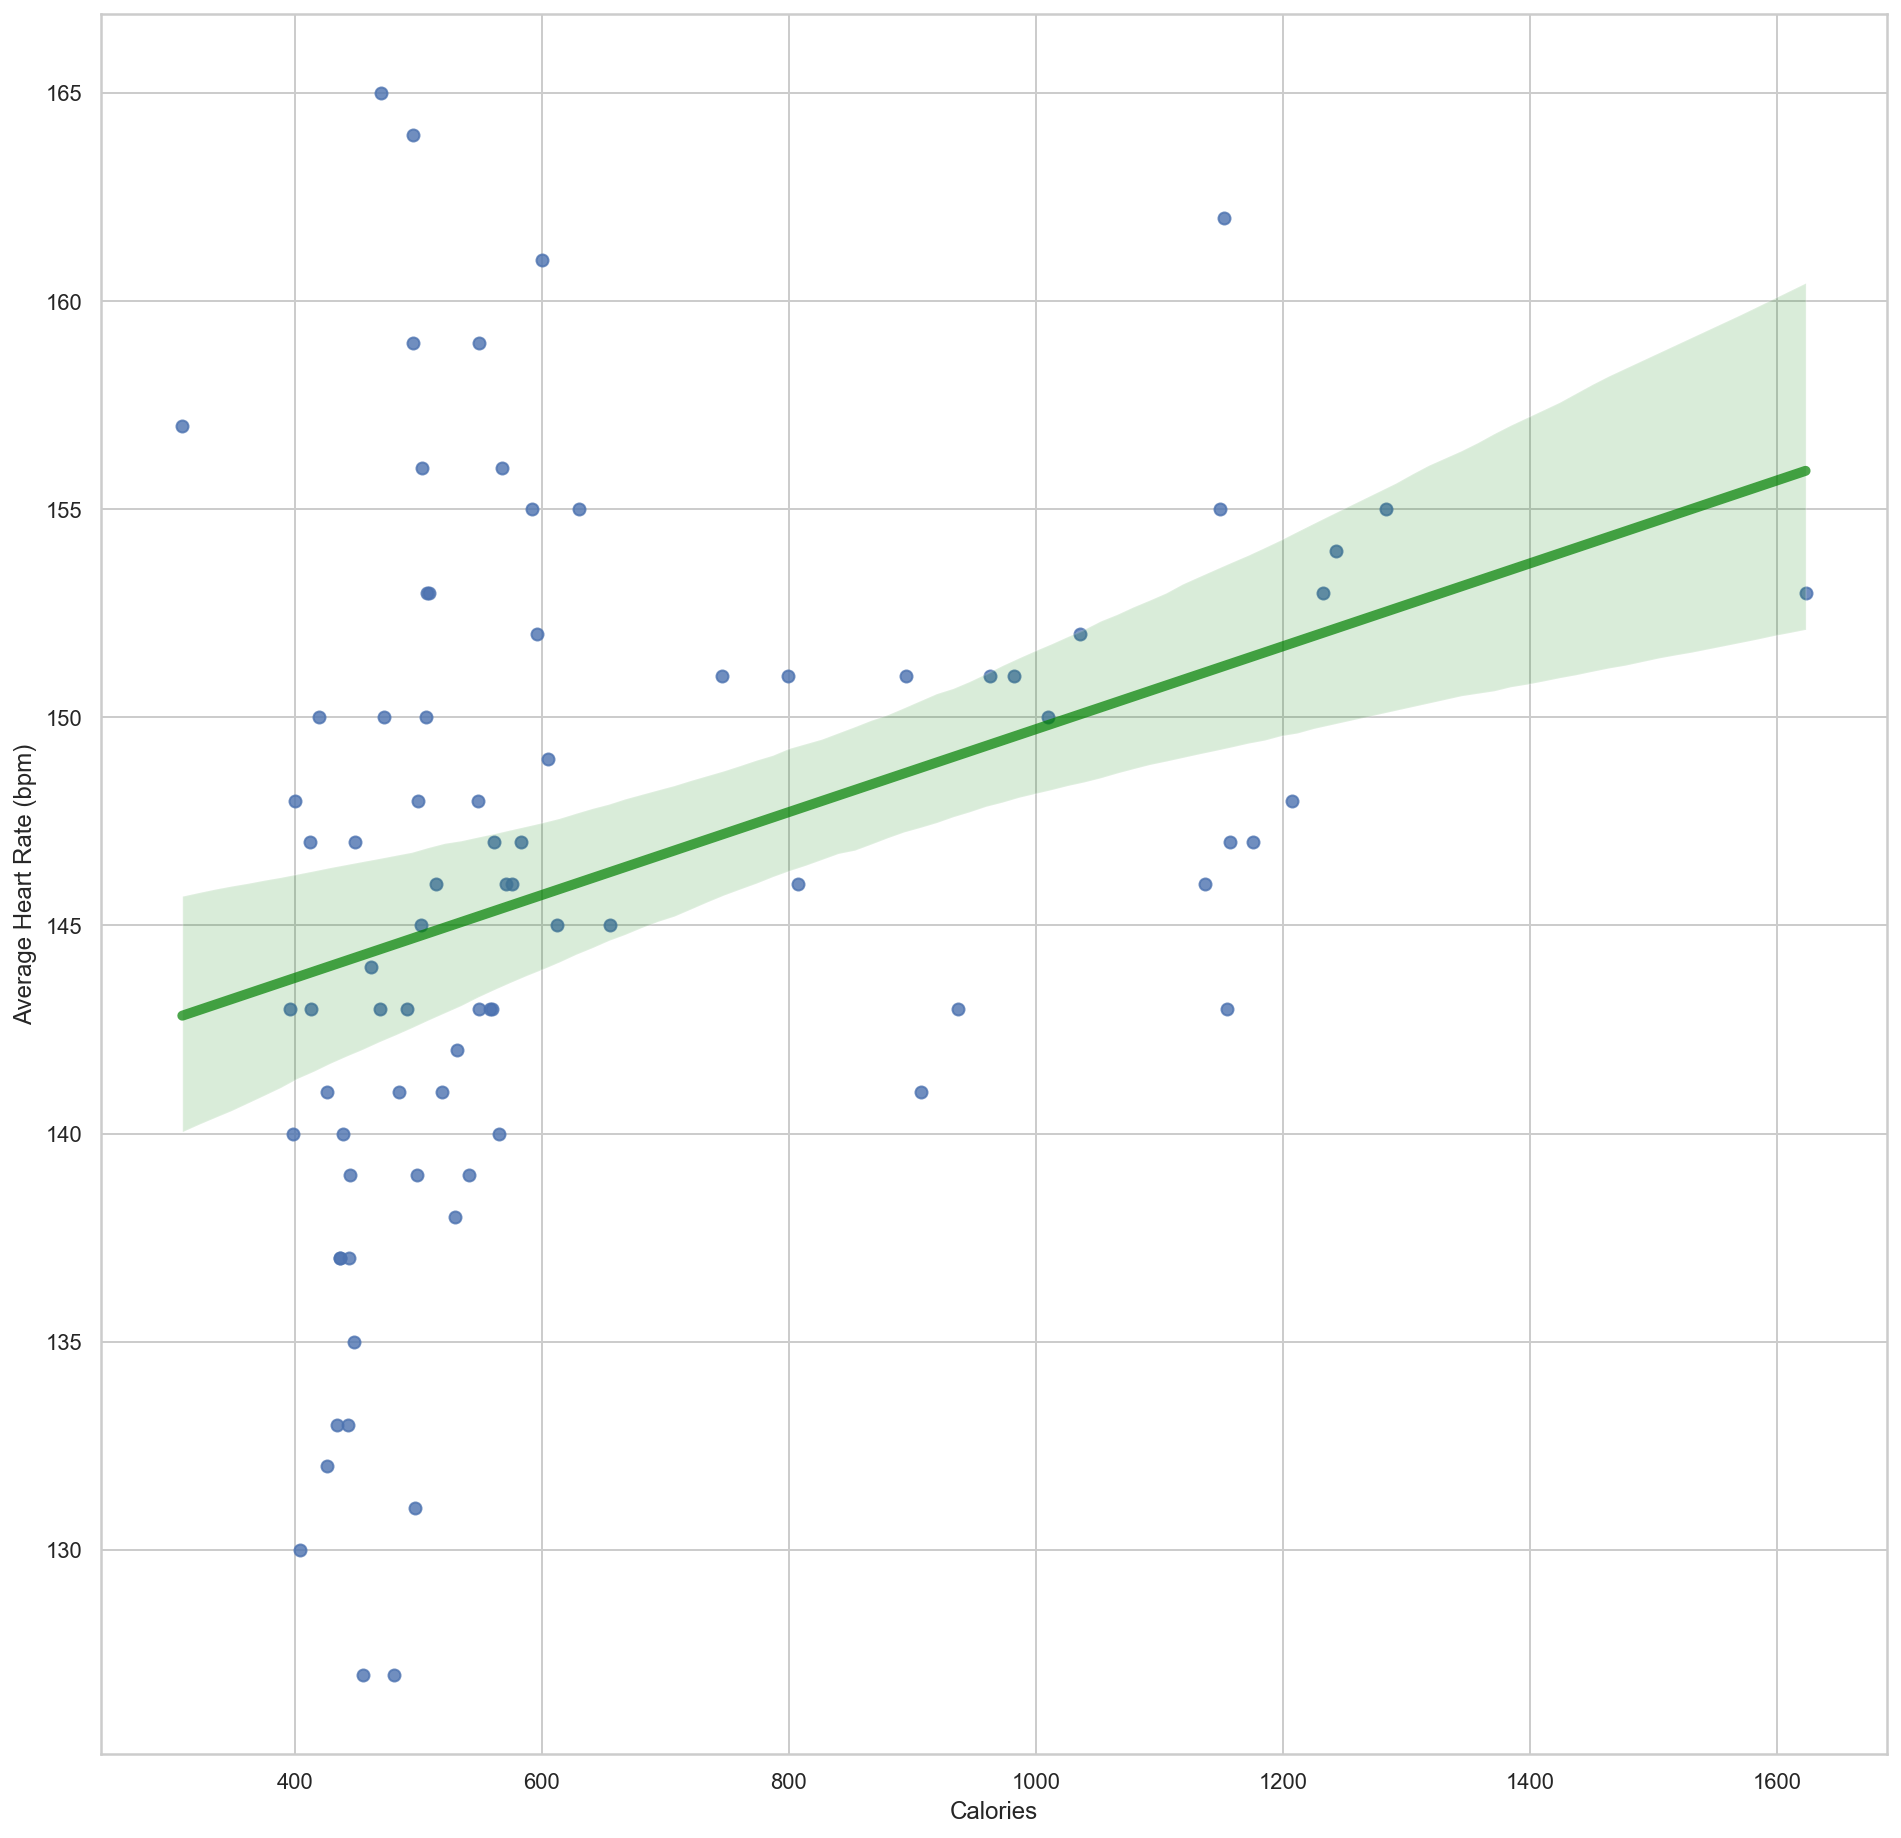

In [117]:
# Calories & Heart Rate
sns.regplot(x=rdf2["Calories"], y=rdf2["Average Heart Rate (bpm)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

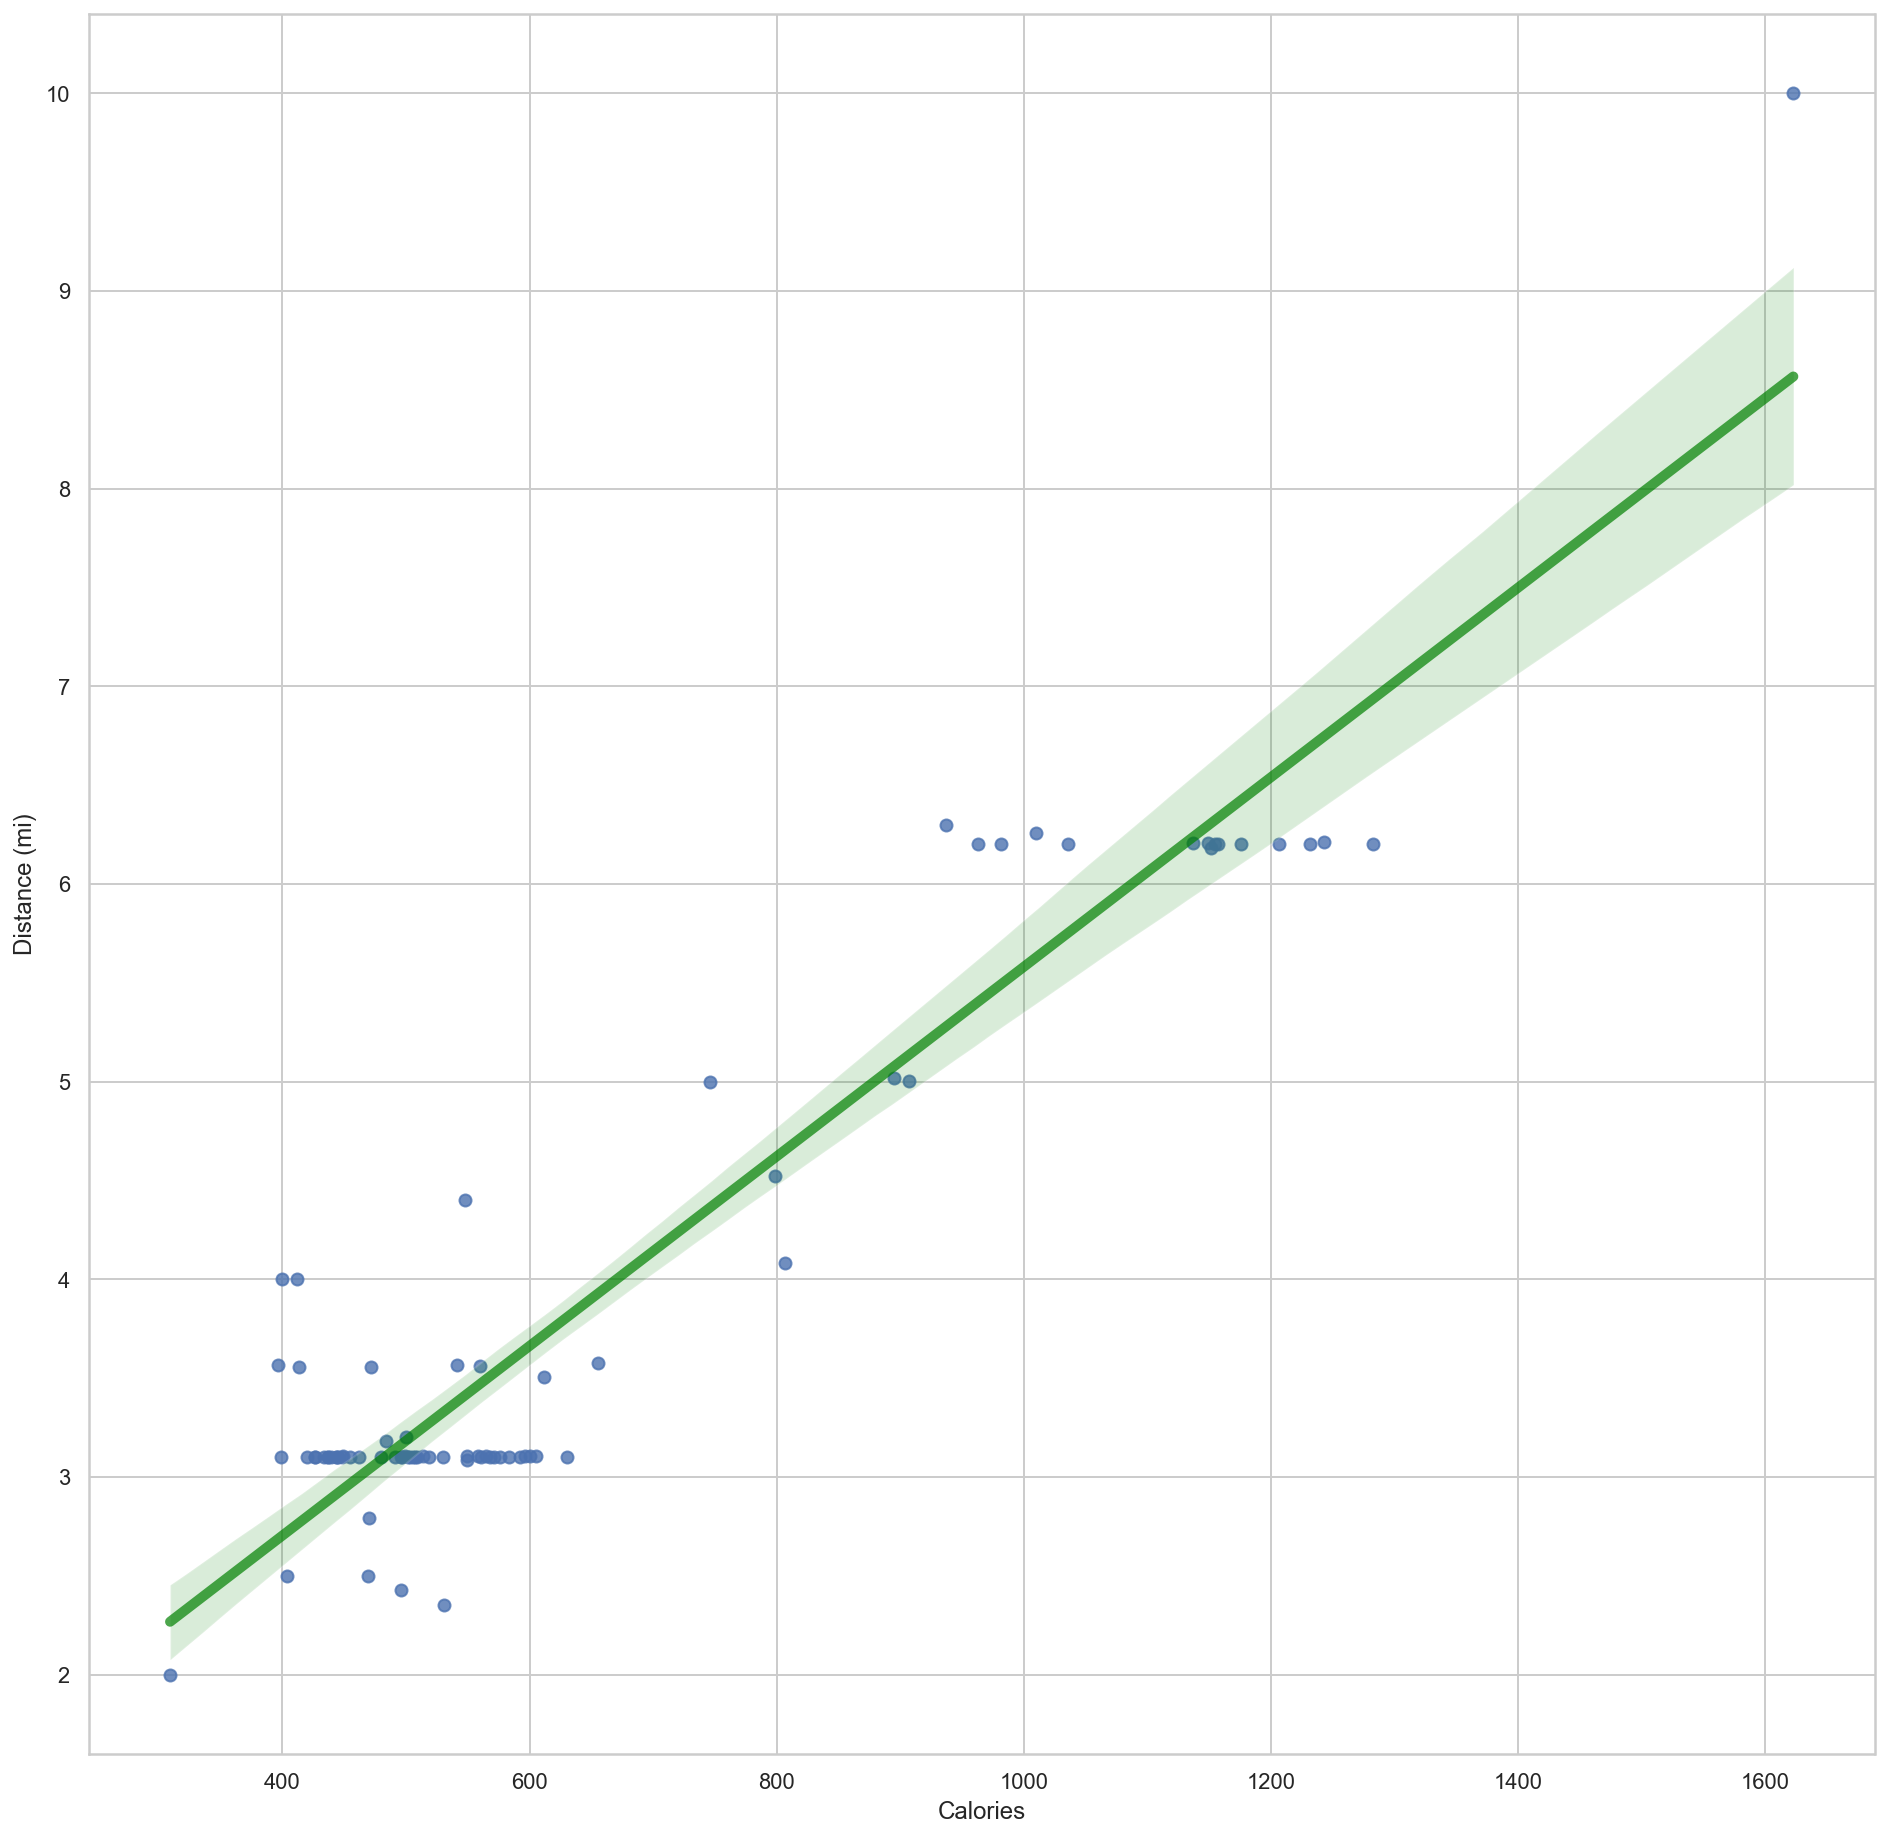

In [118]:
#Calories & Distance
sns.regplot(x=rdf2["Calories"], y=rdf2["Distance (mi)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

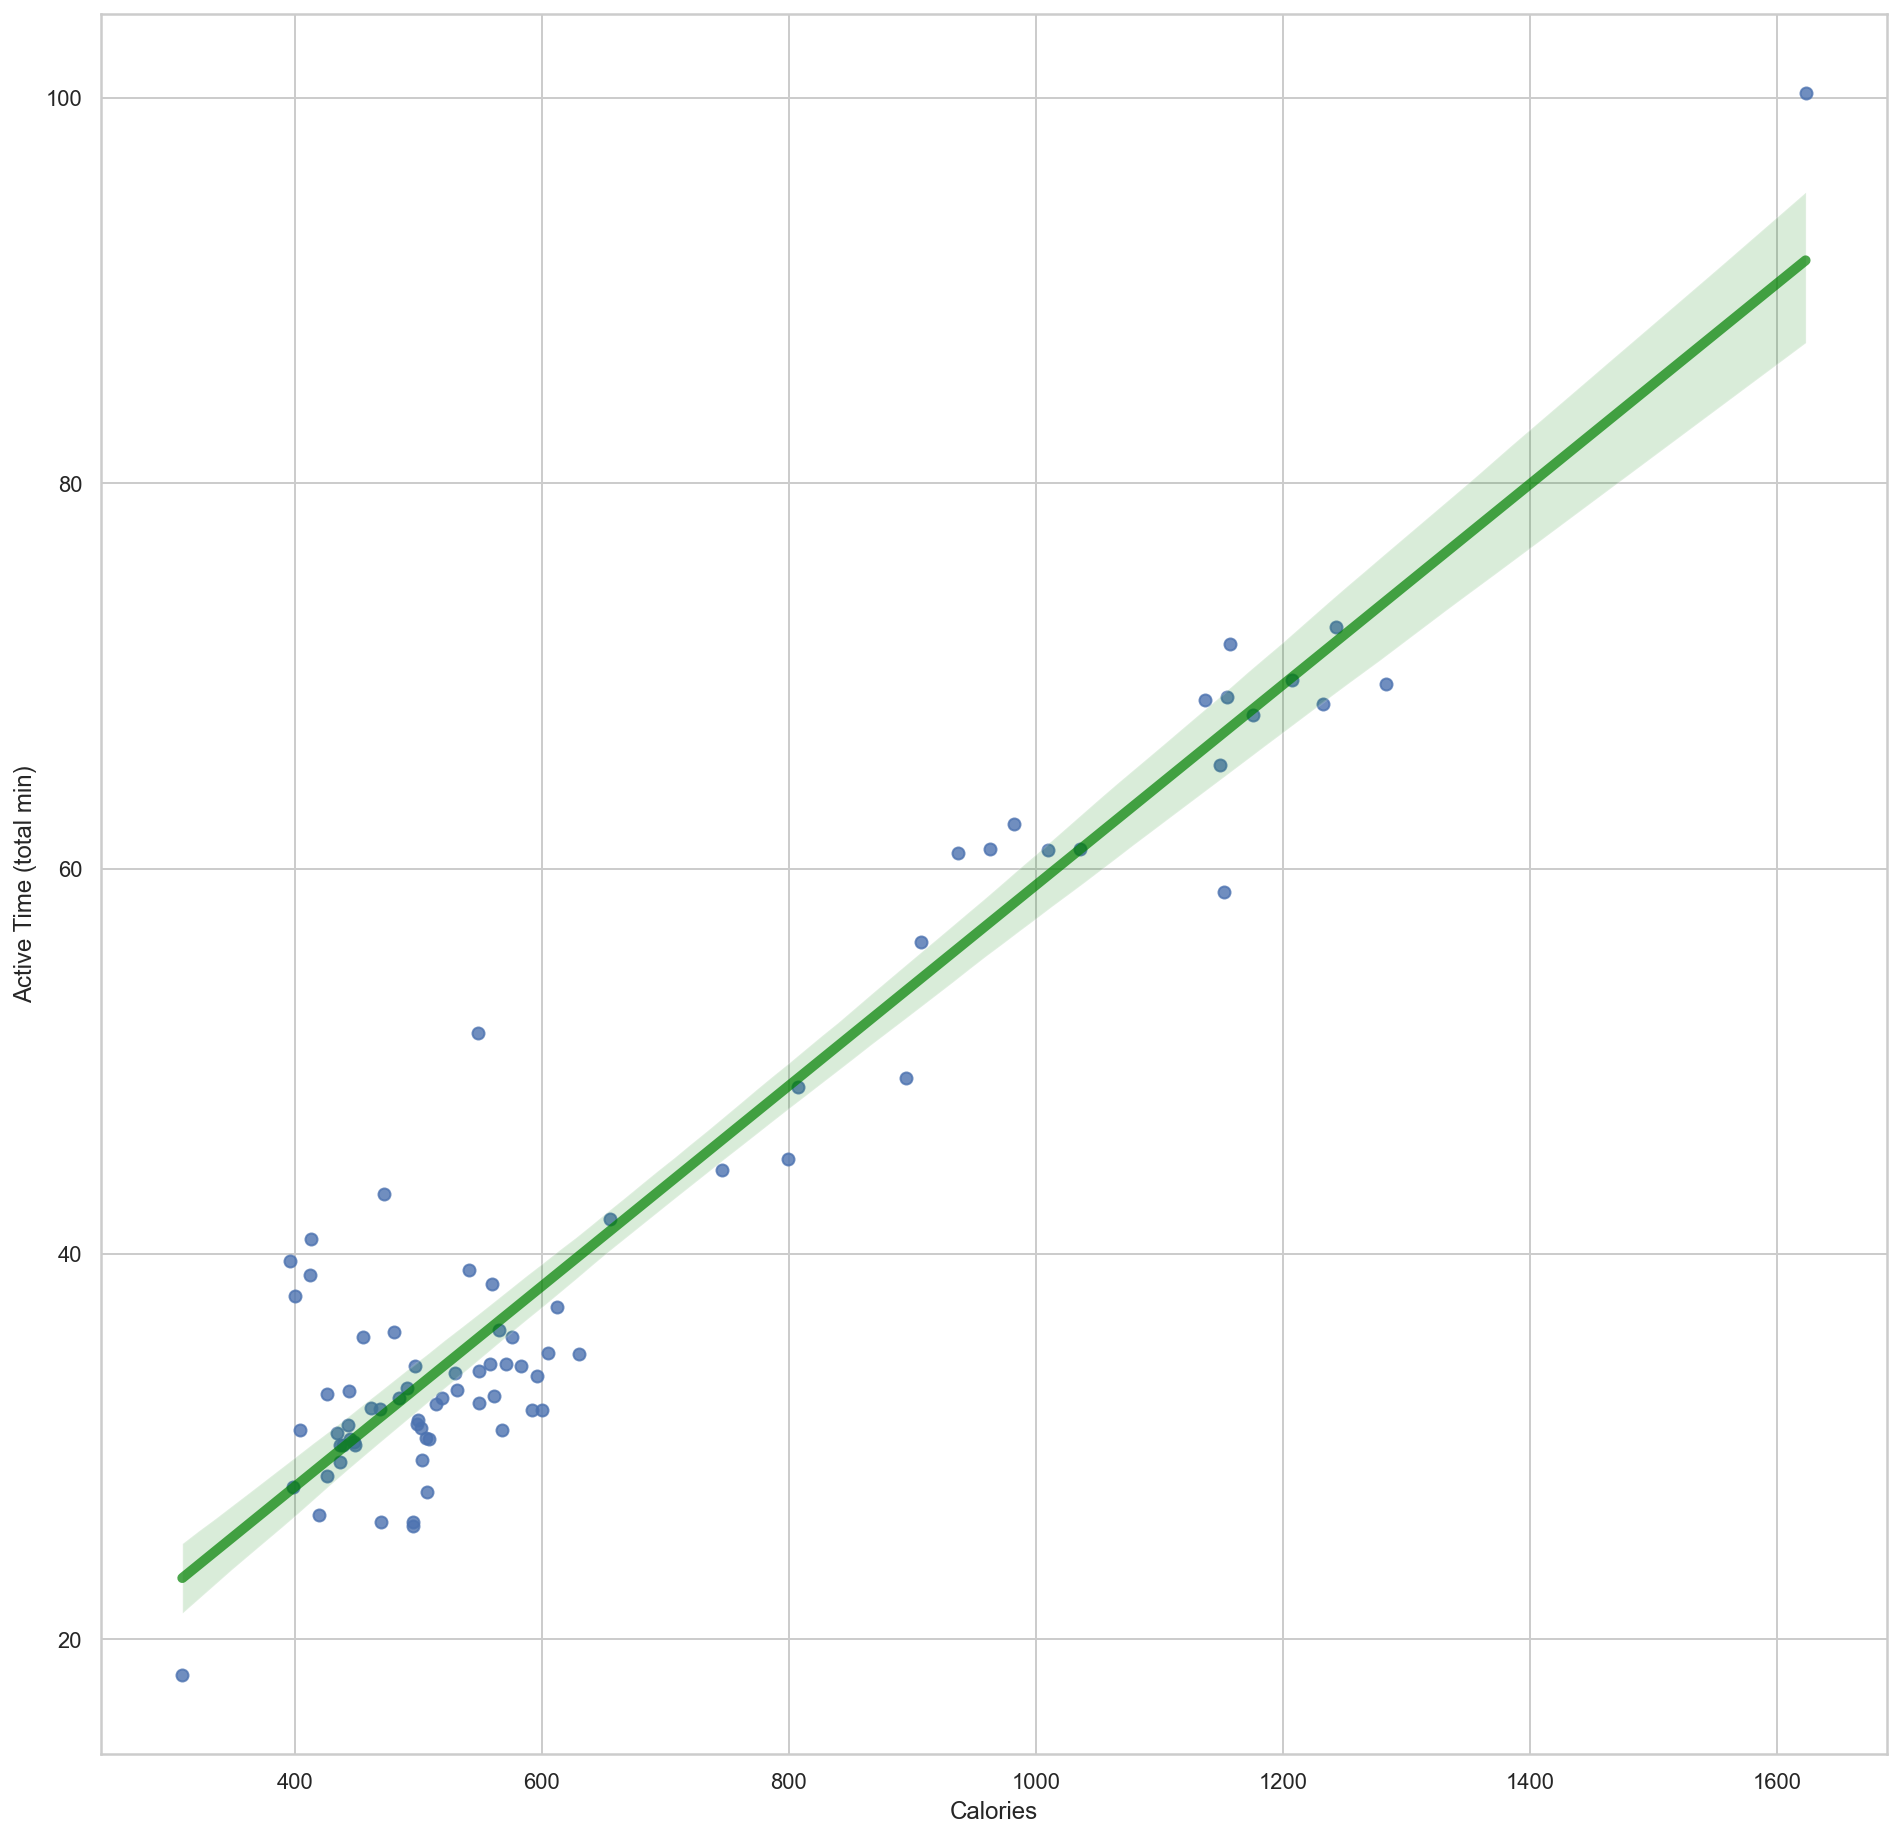

In [119]:
#Minutes & Steps
sns.regplot(x=rdf2["Calories"], y=rdf2["Active Time (total min)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

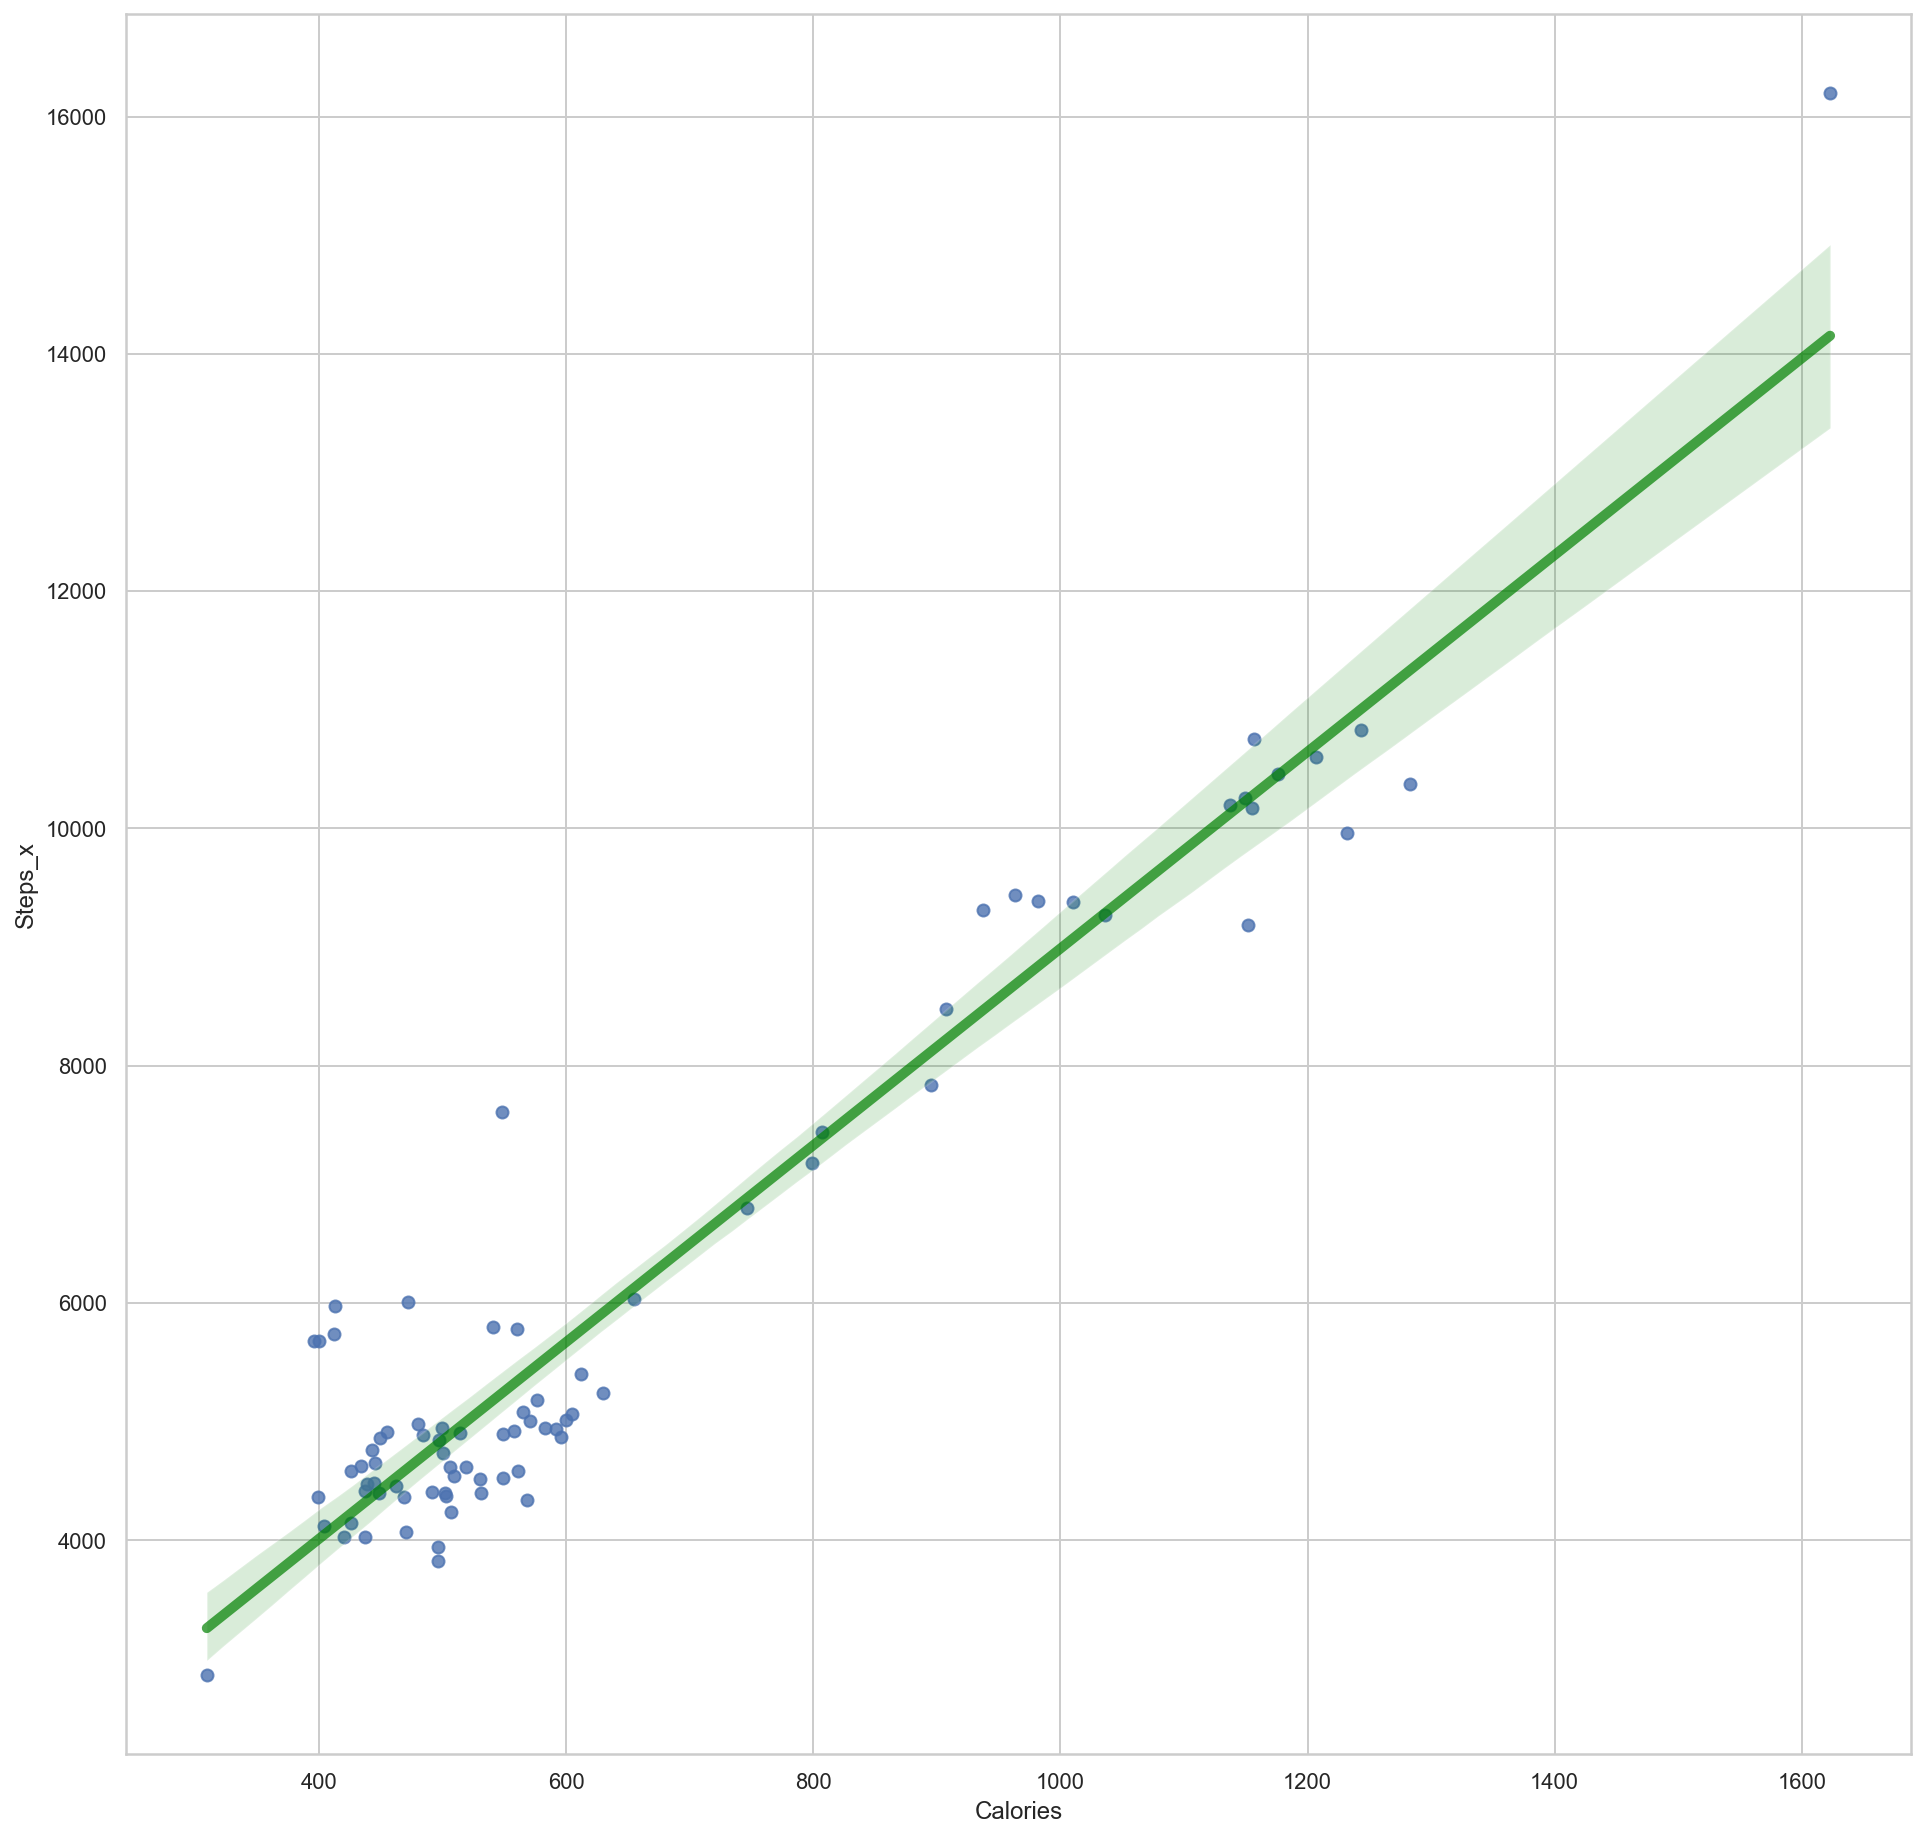

In [120]:
#Calories & Steps
sns.regplot(x=rdf2["Calories"], y=rdf2["Steps_x"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

In [121]:
rdf2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start'],
      dtype='object')

In [122]:
df_num = rdf2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Calories'][:-1] # -1 means that the latest row is Active Time (total min)
top_features = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

There are 6 strongly correlated values with Distance:
Calories                    1.000000
Activity Score              0.956988
Steps_x                     0.956139
Distance (mi)               0.940175
Max Heart Rate (bpm)        0.372291
Average Heart Rate (bpm)    0.342730
Name: Calories, dtype: float64


<AxesSubplot:>

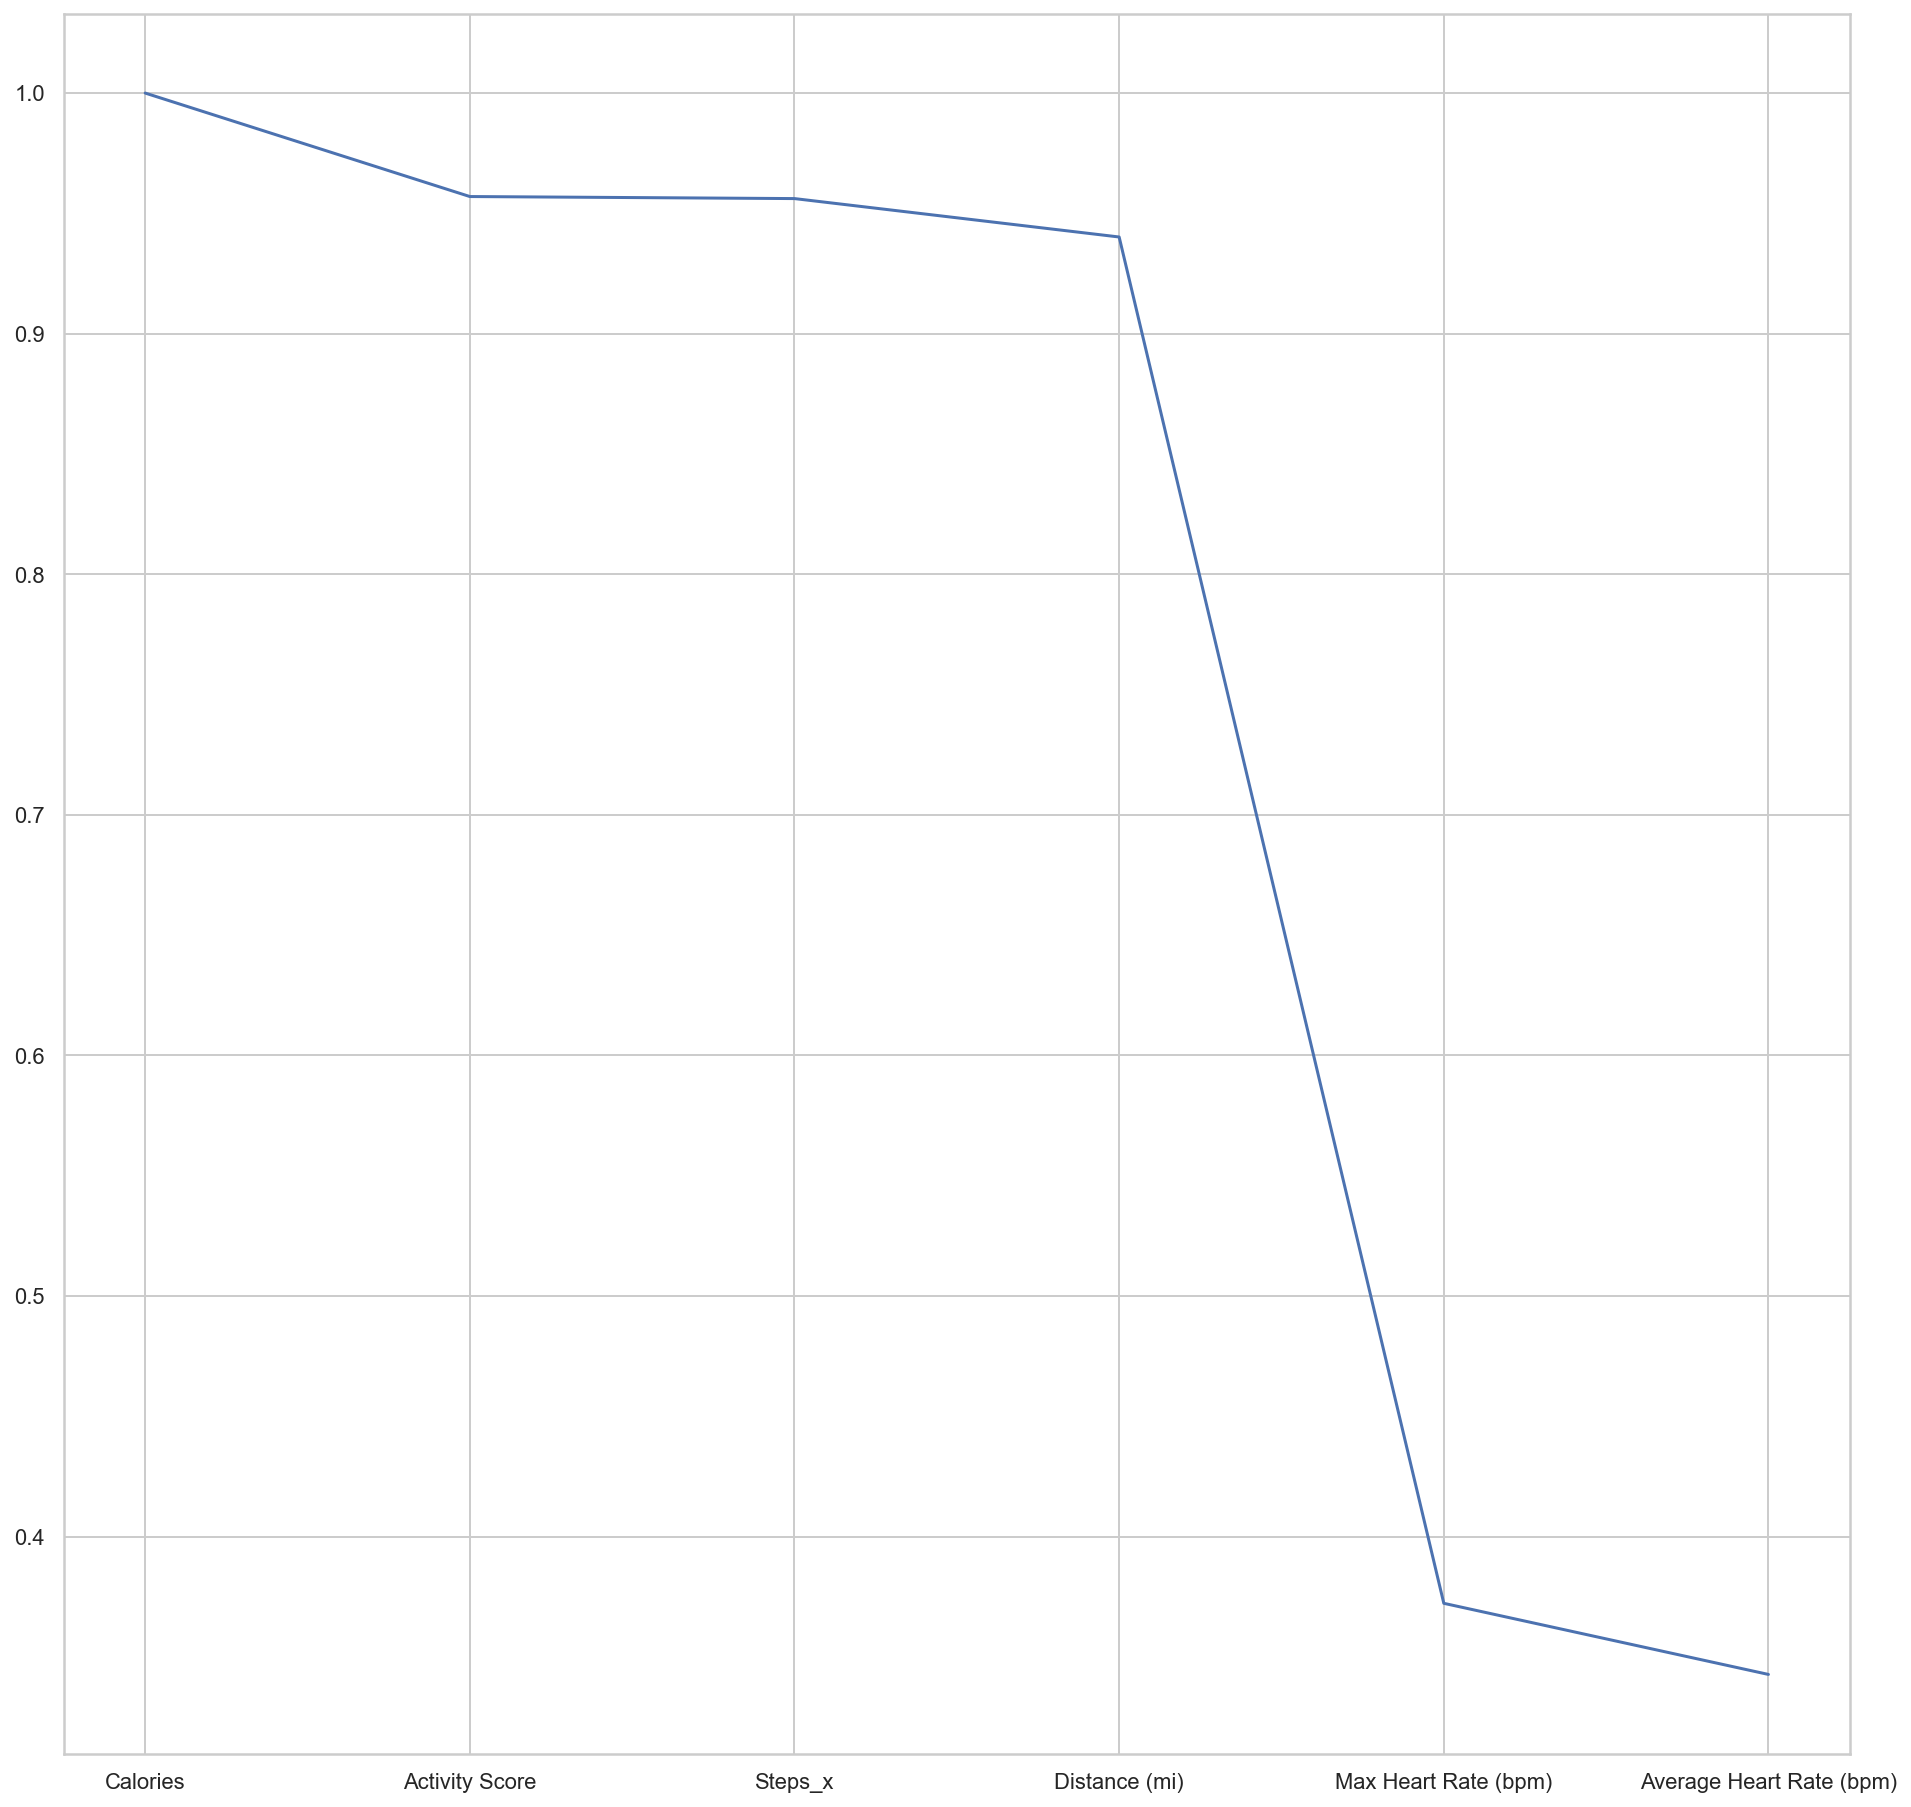

In [123]:
top_features.plot()

Generate pair plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns sns.pairplot() function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

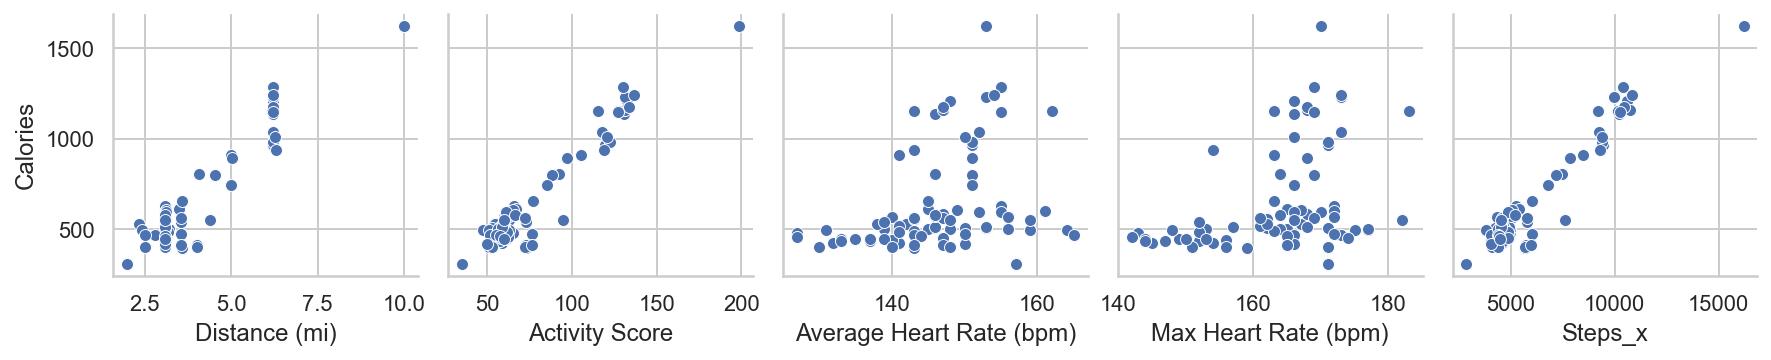

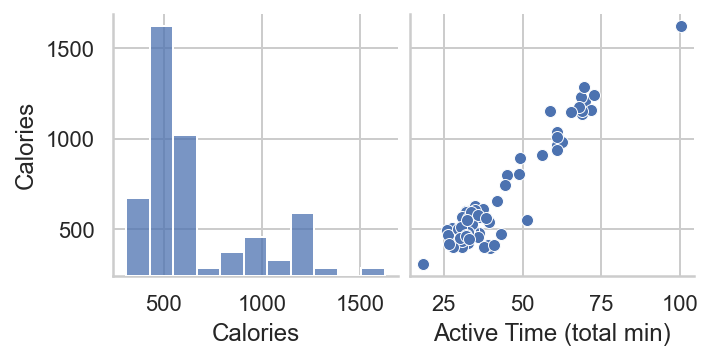

In [124]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Calories'])

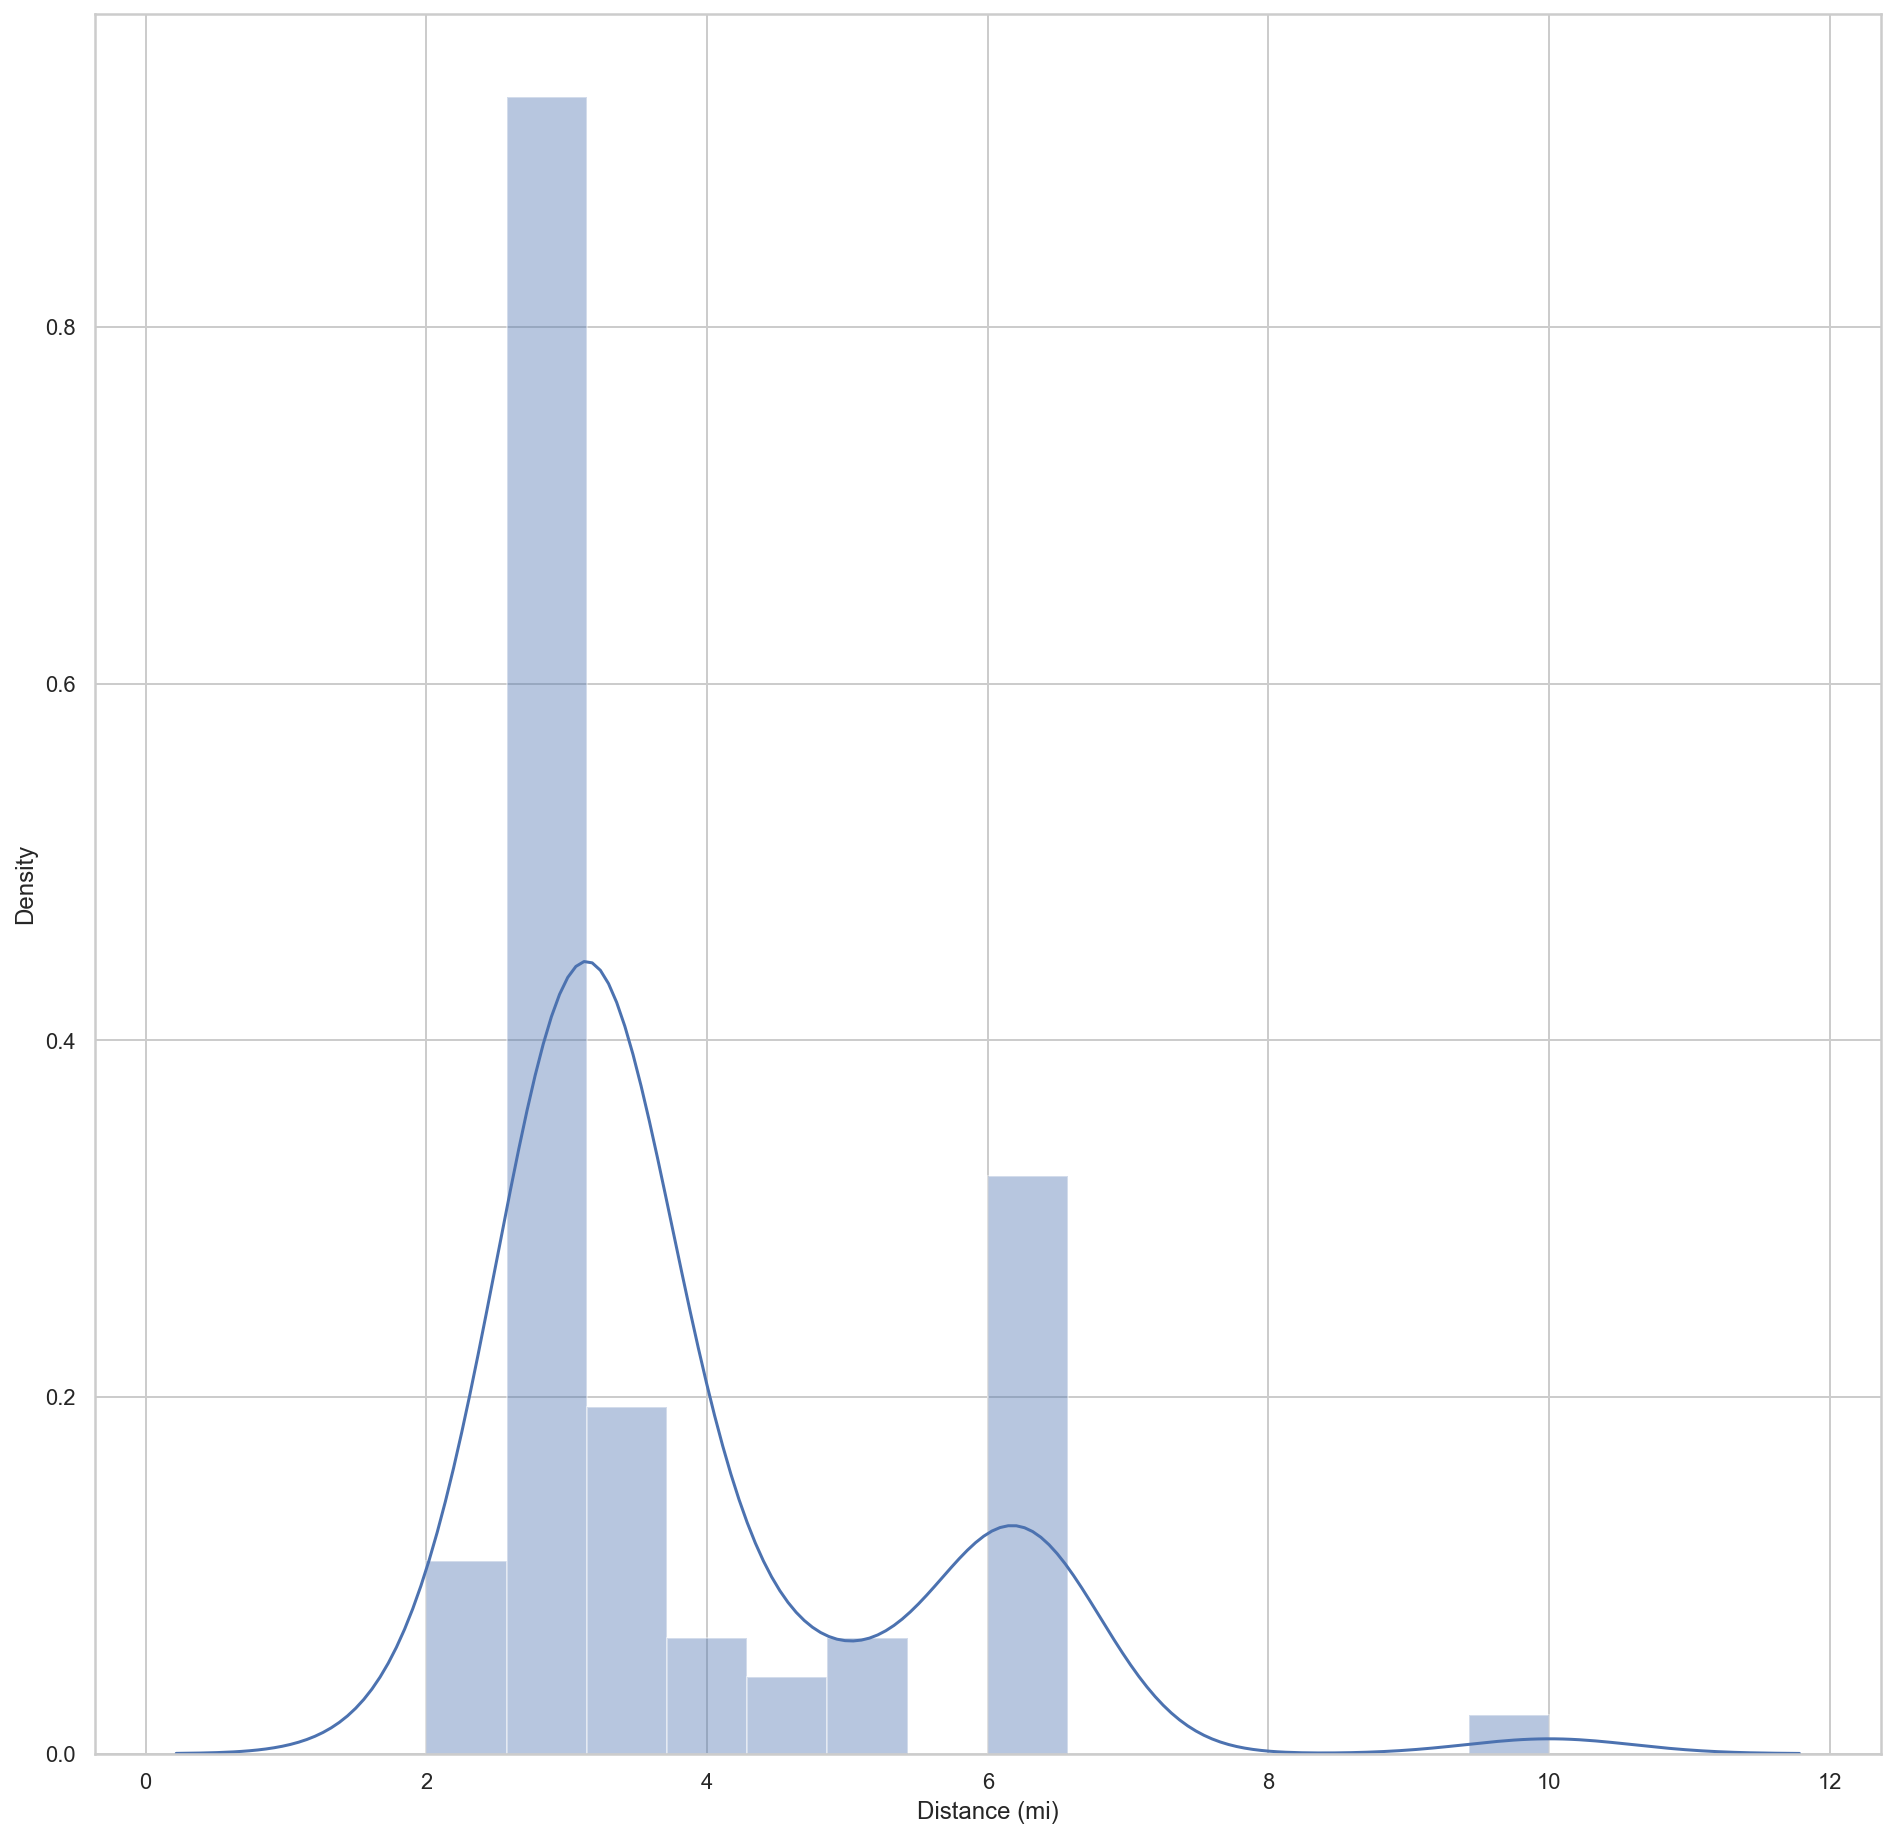

In [125]:
df_untransformed = sns.distplot(rdf2['Distance (mi)'])

In [126]:
print("Skewness: %f" % rdf2['Distance (mi)'].skew())

Skewness: 1.653012


In [127]:
log_transformed = np.log(rdf2['Distance (mi)'])

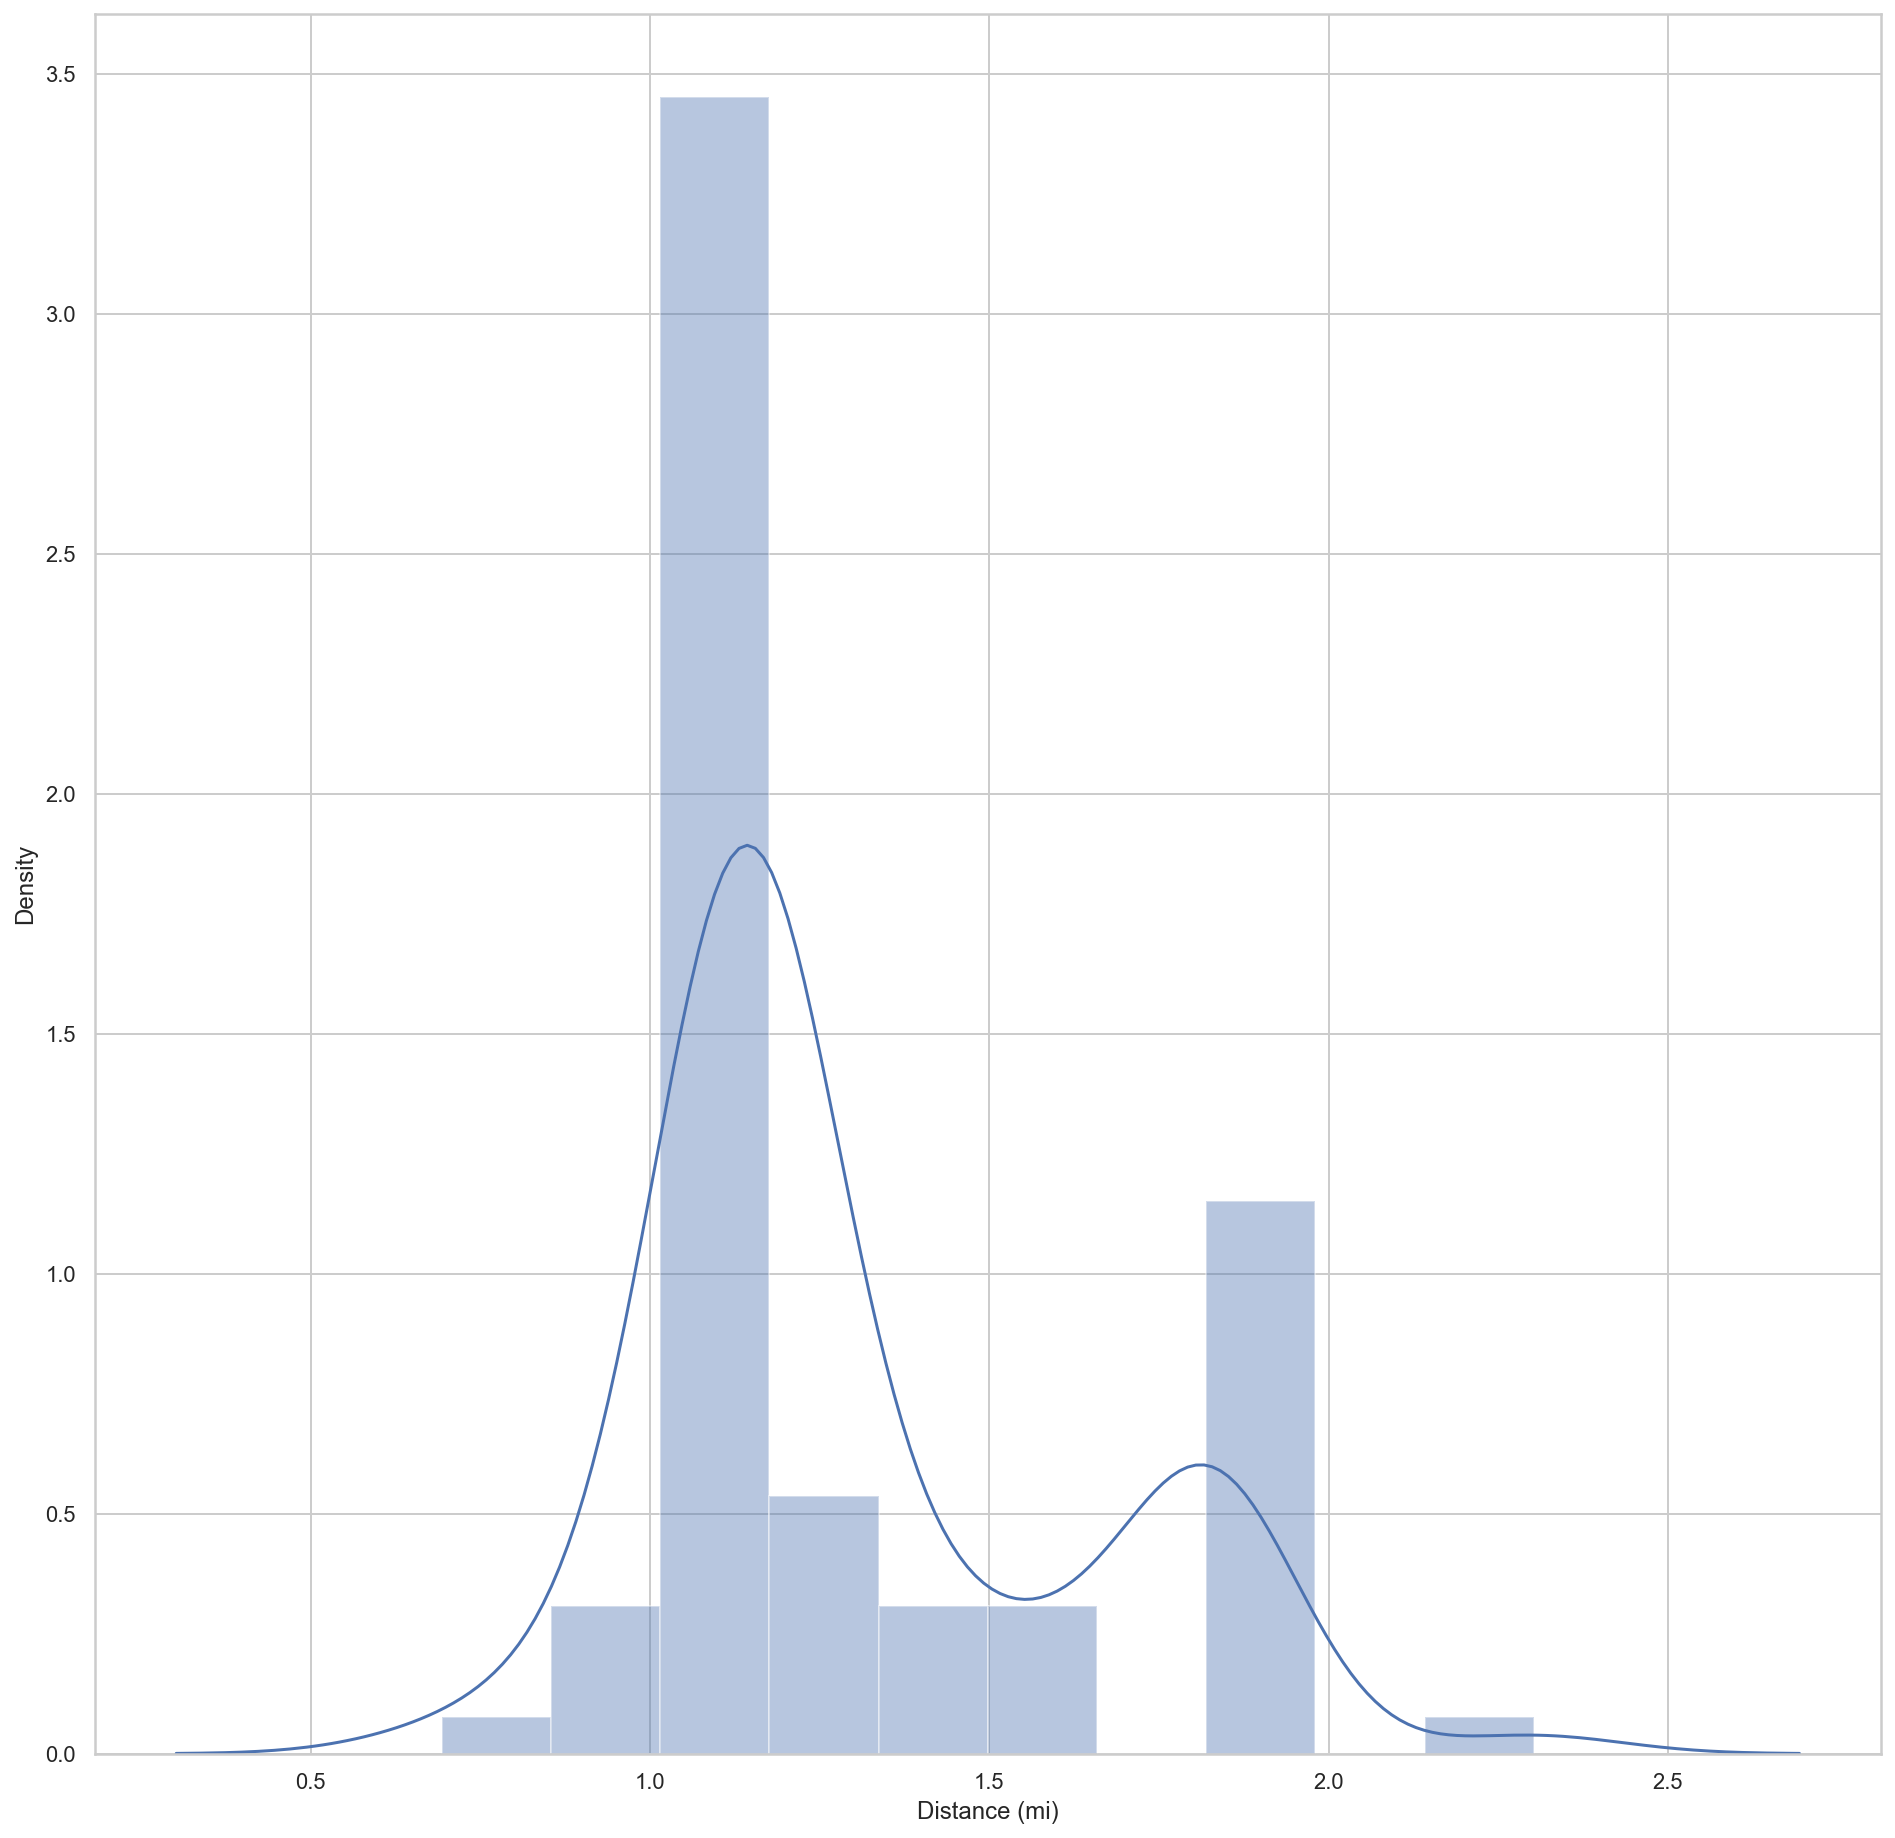

In [128]:
df_transformed = sns.distplot(log_transformed)

In [129]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: 1.016530


In [130]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

array([[0.25997075, 0.35126873, 0.5       , 0.53658537, 0.3433631 ,
        0.37899543, 0.37158869],
       [0.13753953, 0.18667074, 0.73684211, 0.73170732, 0.17828469,
        0.24429224, 0.20248538],
       [0.13838068, 0.16979517, 0.89473684, 0.73170732, 0.16125159,
        0.22146119, 0.16739766],
       [0.13748453, 0.14680526, 0.47368421, 0.56097561, 0.11450439,
        0.14687976, 0.15594542],
       [0.52562462, 0.58446958, 0.5       , 0.58536585, 0.54956104,
        0.63013699, 0.6163499 ],
       [0.13748453, 0.13188627, 0.26315789, 0.12195122, 0.11630524,
        0.09741248, 0.13413743],
       [0.5253634 , 0.59706512, 0.55263158, 0.58536585, 0.57995048,
        0.68340944, 0.62865497],
       [0.13823195, 0.16985631, 0.42105263, 0.58536585, 0.15224732,
        0.1826484 , 0.1916423 ],
       [0.13748453, 0.18245185, 0.        , 0.02439024, 0.15855031,
        0.13013699, 0.21673977],
       [0.37510405, 0.42855396, 0.36842105, 0.51219512, 0.42072484,
        0.45509893, 0.4

In [131]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

array([[ 1.31899921e-01,  5.23445872e-01, -2.58935830e-02,
         3.66235125e-02,  5.68919570e-01,  5.70298875e-01,
         5.15040633e-01],
       [-5.57051837e-01, -3.70229407e-01,  1.08448418e+00,
         9.15587813e-01, -3.41294534e-01, -6.45621367e-02,
        -3.96031134e-01],
       [-5.52318441e-01, -4.61854361e-01,  1.82473602e+00,
         9.15587813e-01, -4.35212081e-01, -1.72165698e-01,
        -5.85071962e-01],
       [-5.57361301e-01, -5.86676763e-01, -1.49268890e-01,
         1.46494050e-01, -6.92968166e-01, -5.23670665e-01,
        -6.46772787e-01],
       [ 1.62680201e+00,  1.78959651e+00, -2.58935830e-02,
         2.56364588e-01,  1.70585973e+00,  1.75393805e+00,
         1.83373168e+00],
       [-5.57361301e-01, -6.67678534e-01, -1.13627135e+00,
        -1.83117563e+00, -6.83038557e-01, -7.56811714e-01,
        -7.64266913e-01],
       [ 1.62533206e+00,  1.85798325e+00,  2.20857031e-01,
         2.56364588e-01,  1.87342188e+00,  2.00501302e+00,
         1.9000272

<AxesSubplot:xlabel='Distance (mi)'>

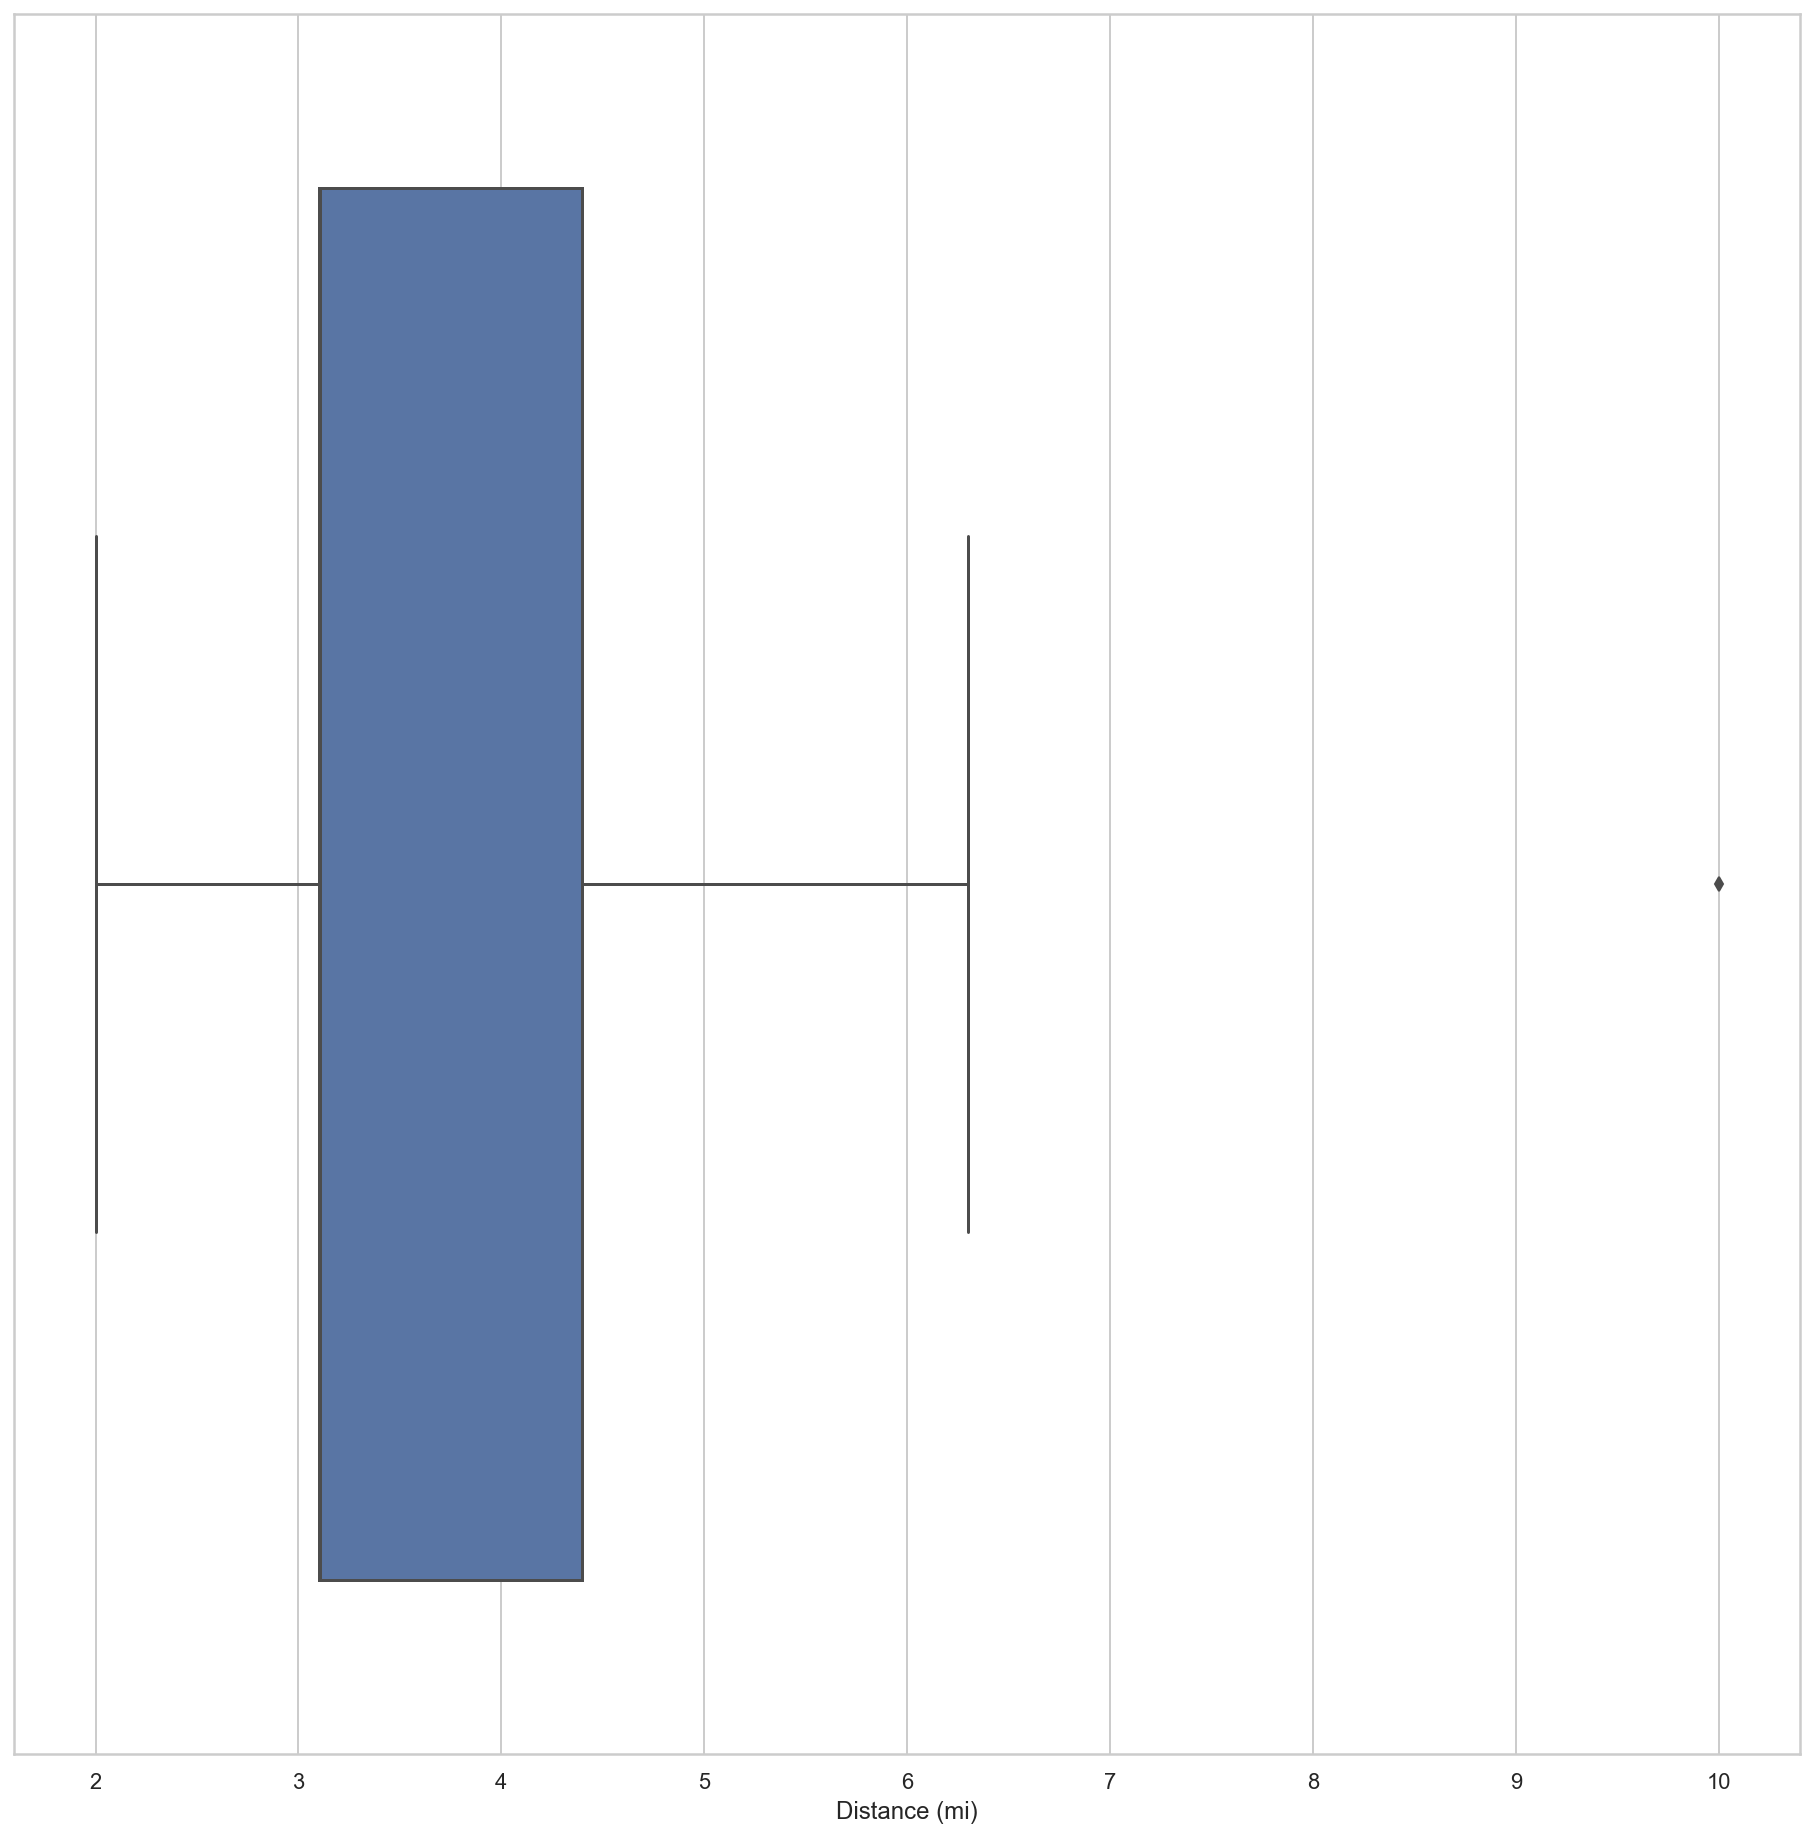

In [132]:
sns.boxplot(x=rdf2['Distance (mi)'])

<AxesSubplot:xlabel='Steps_x'>

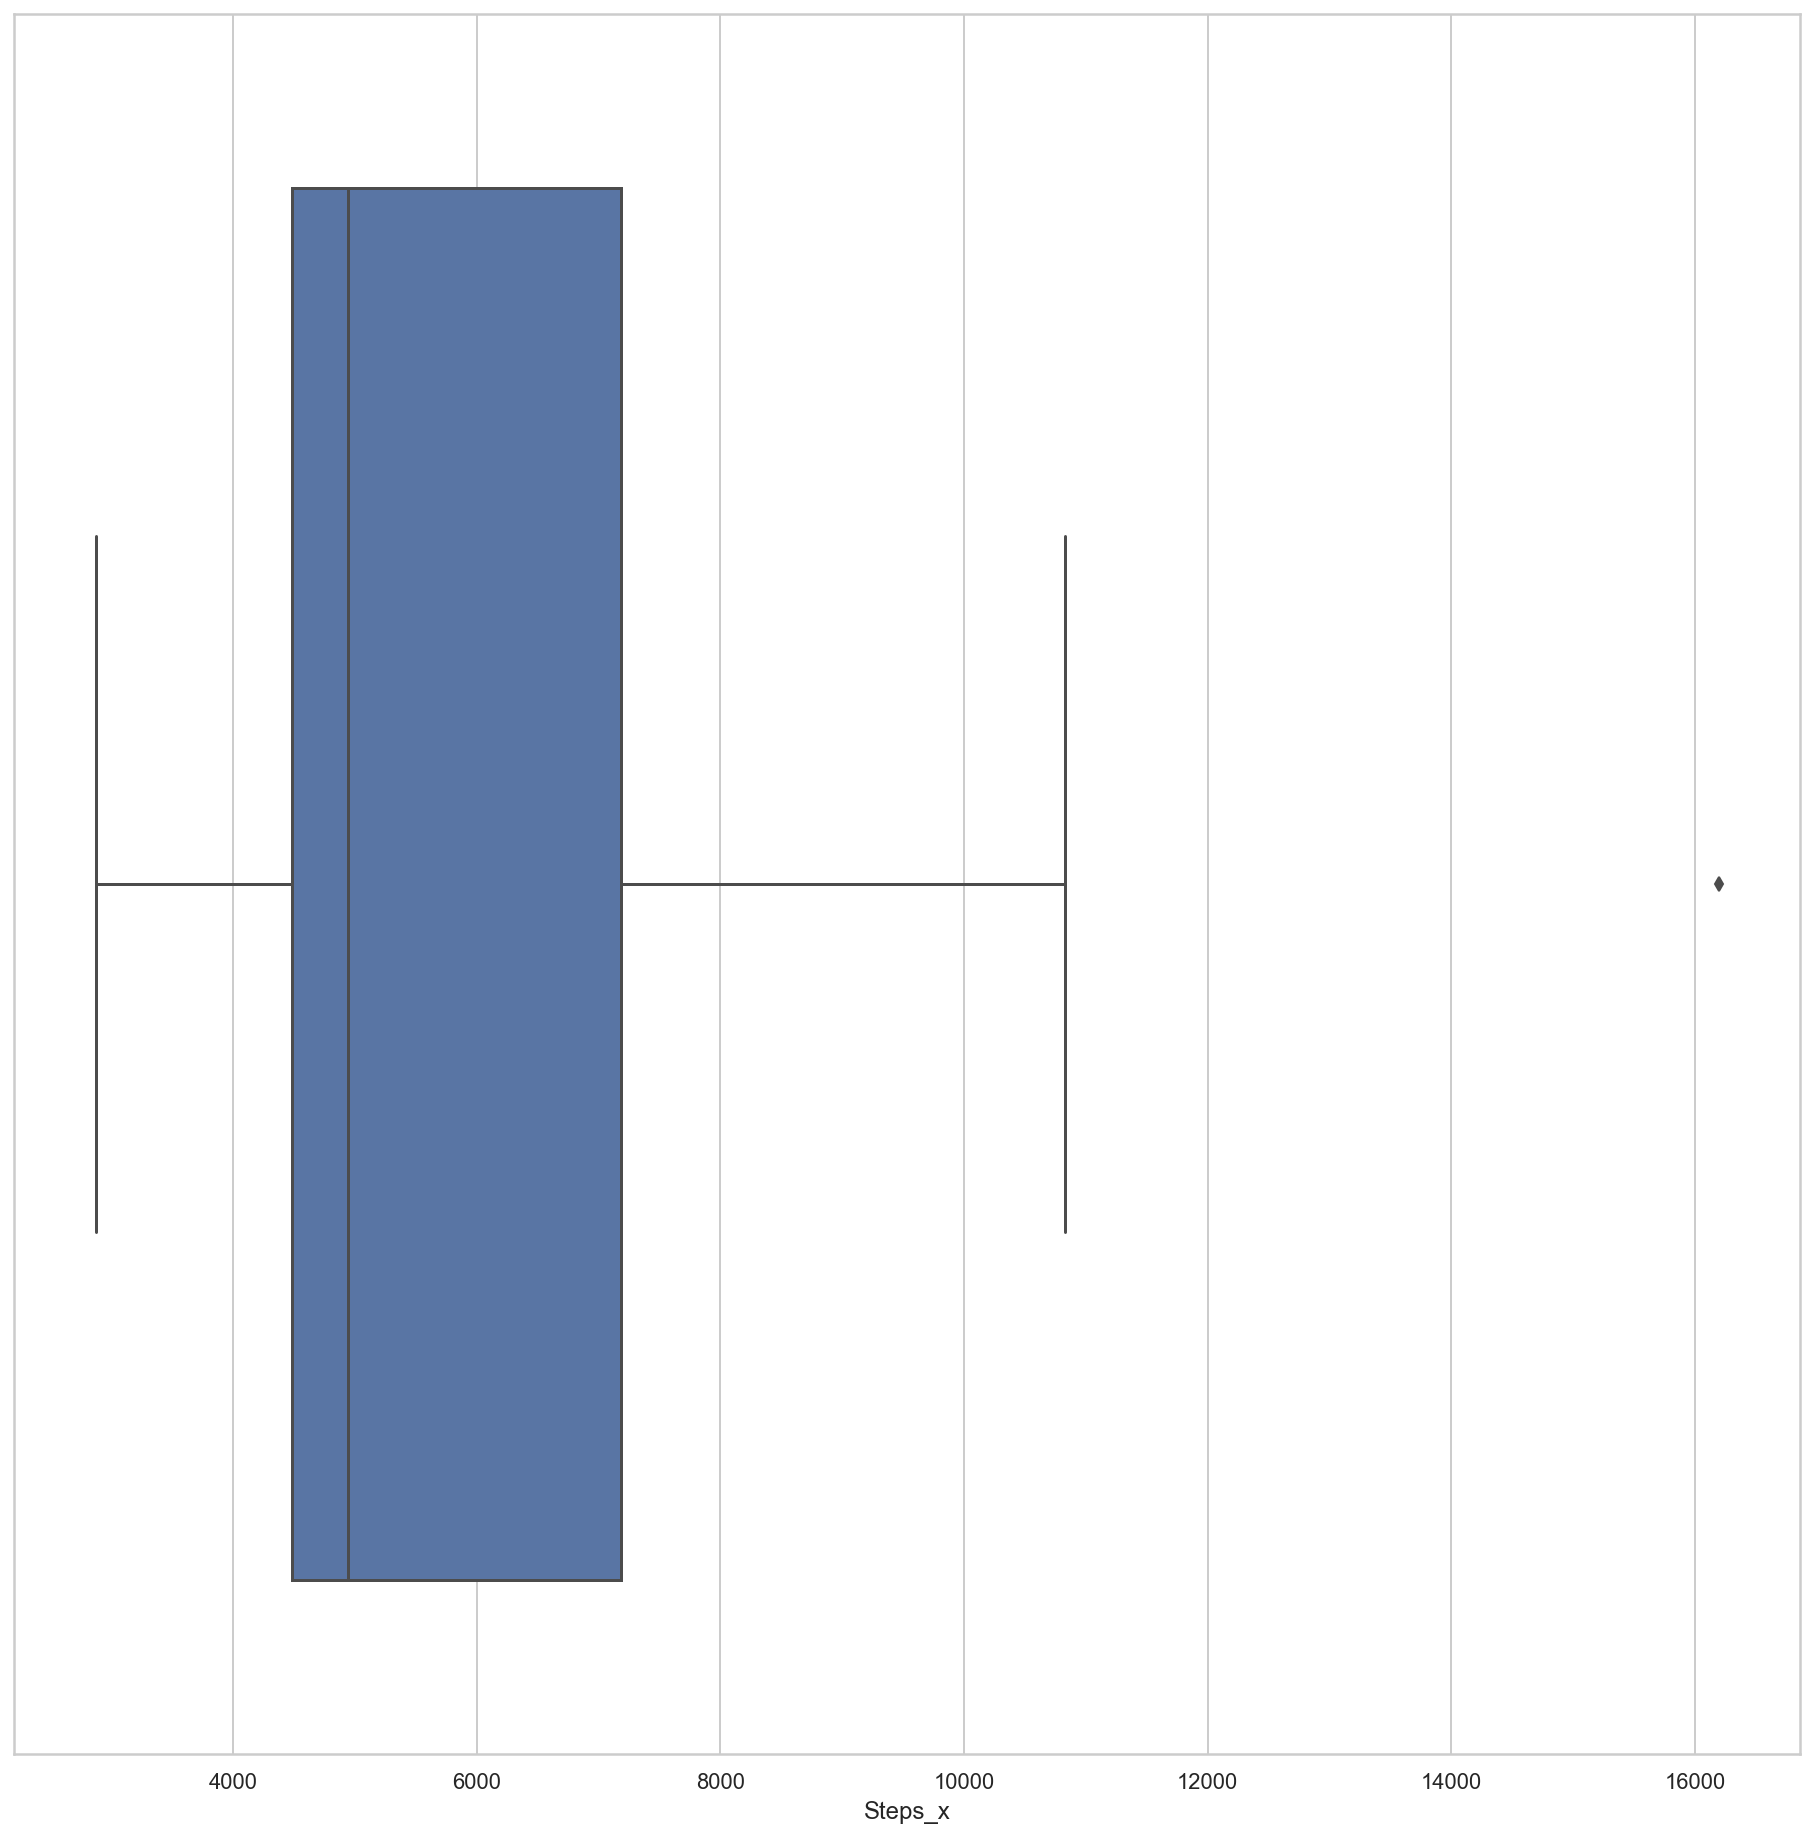

In [133]:
sns.boxplot(x=rdf2['Steps_x'])

<AxesSubplot:xlabel='Average Heart Rate (bpm)'>

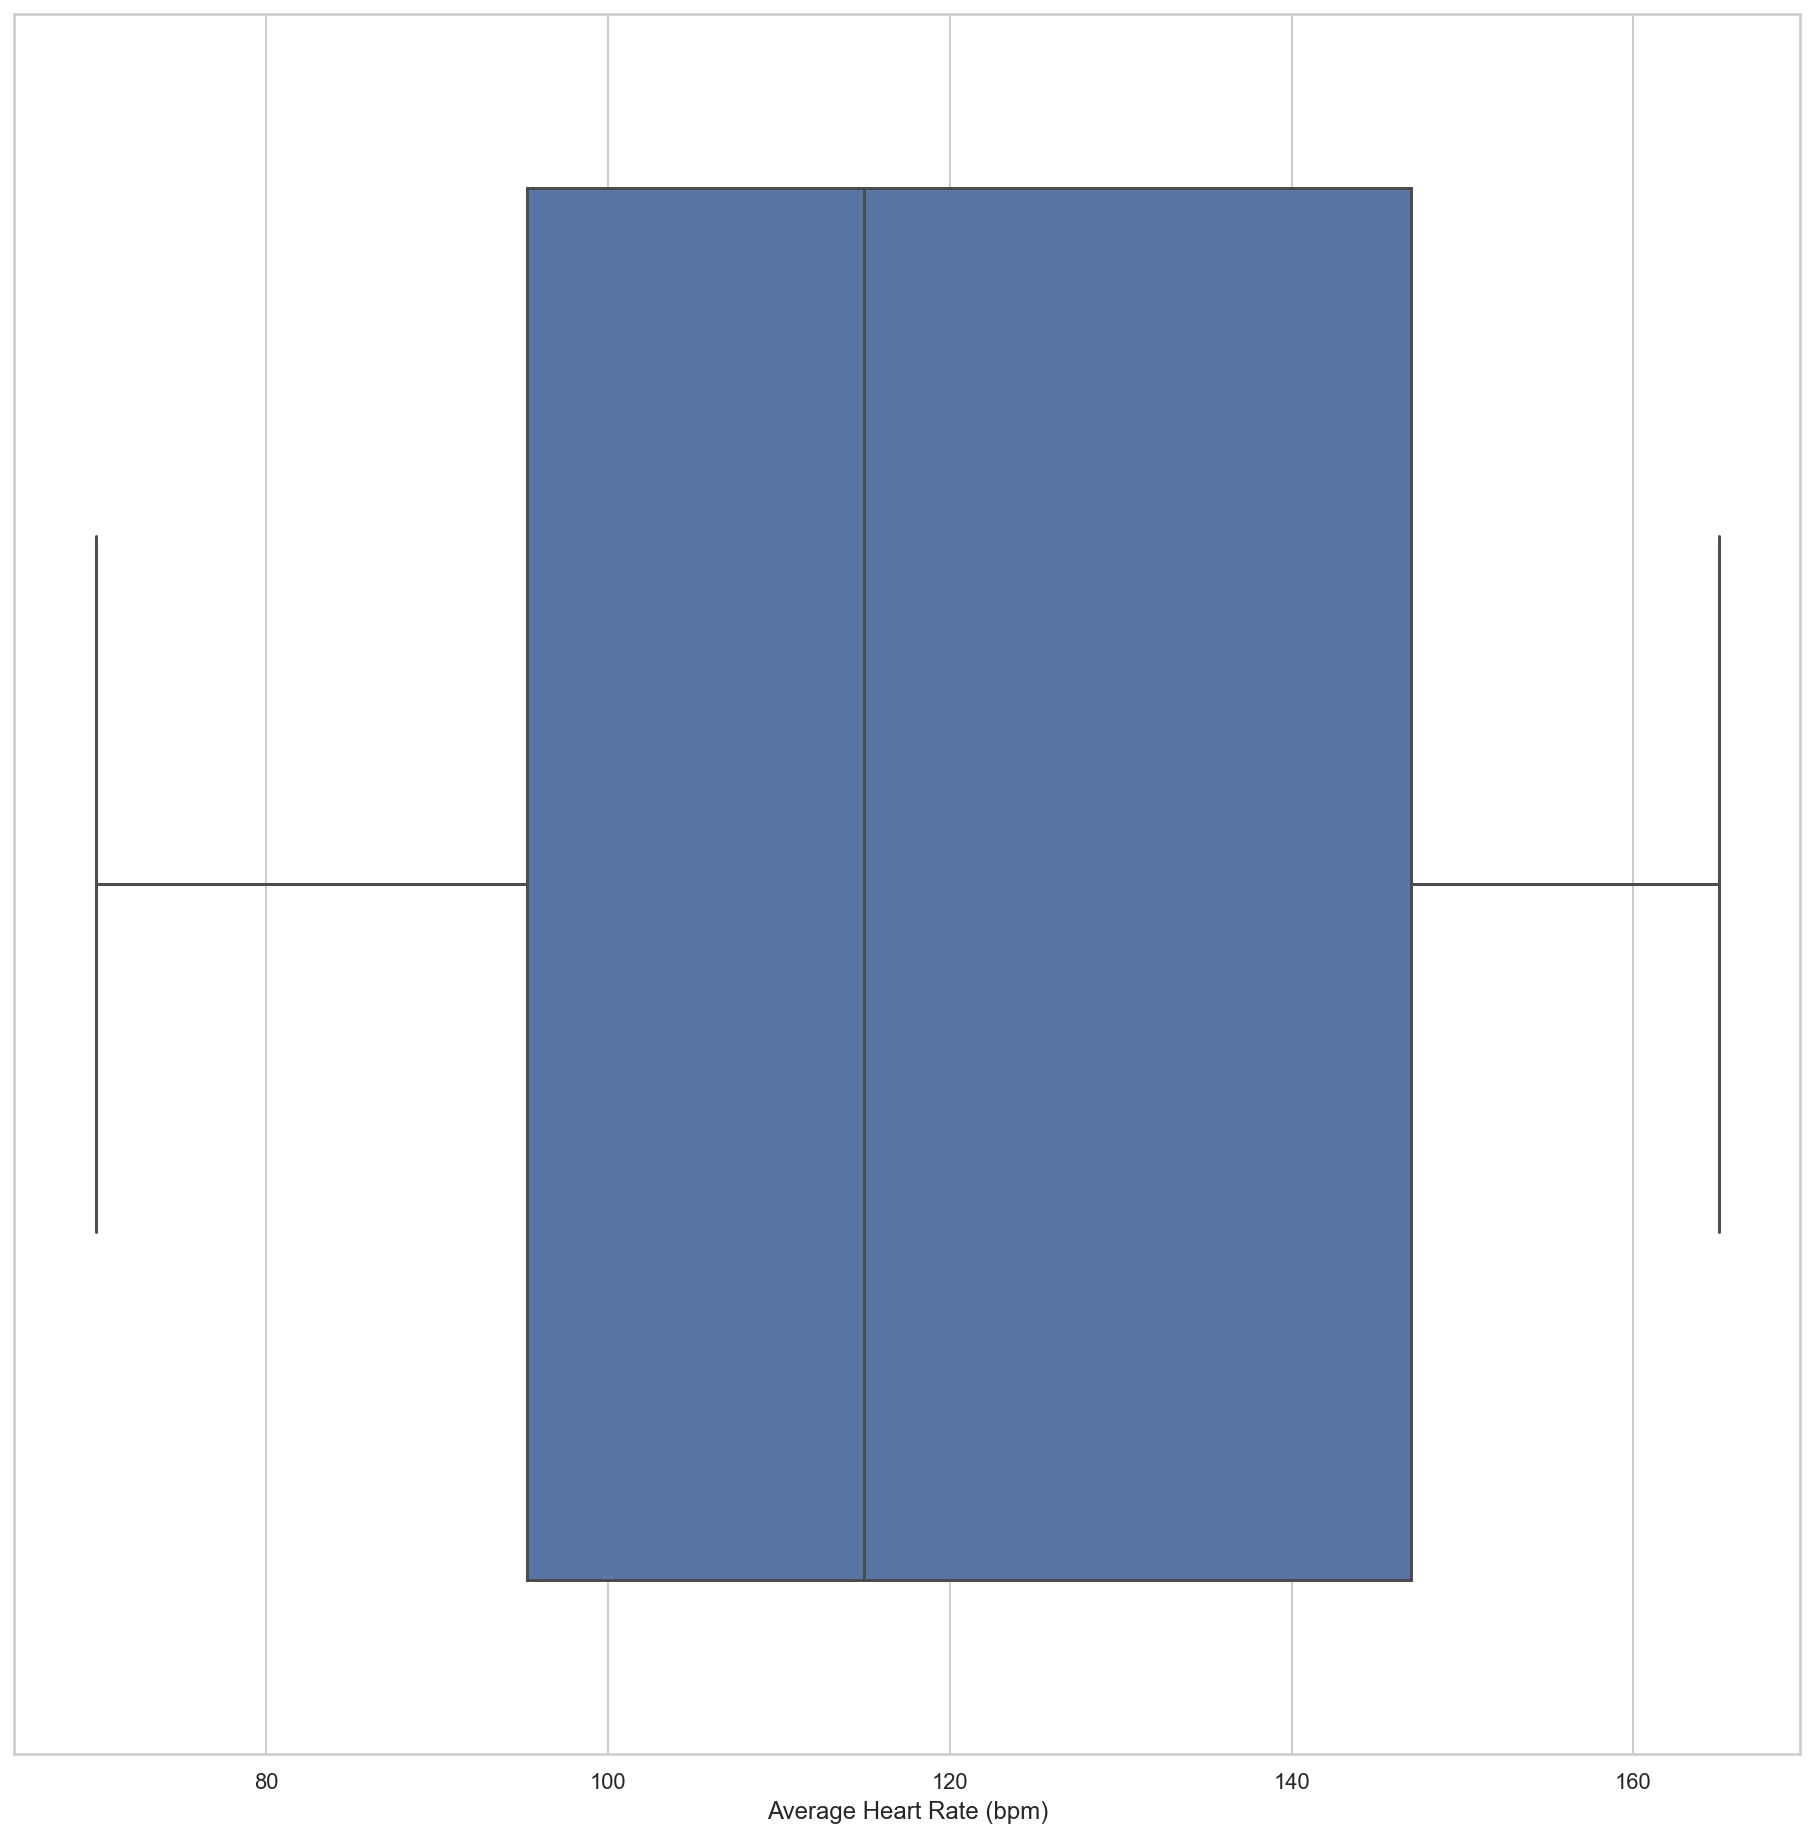

In [ ]:
sns.boxplot(x=df2['Average Heart Rate (bpm)'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


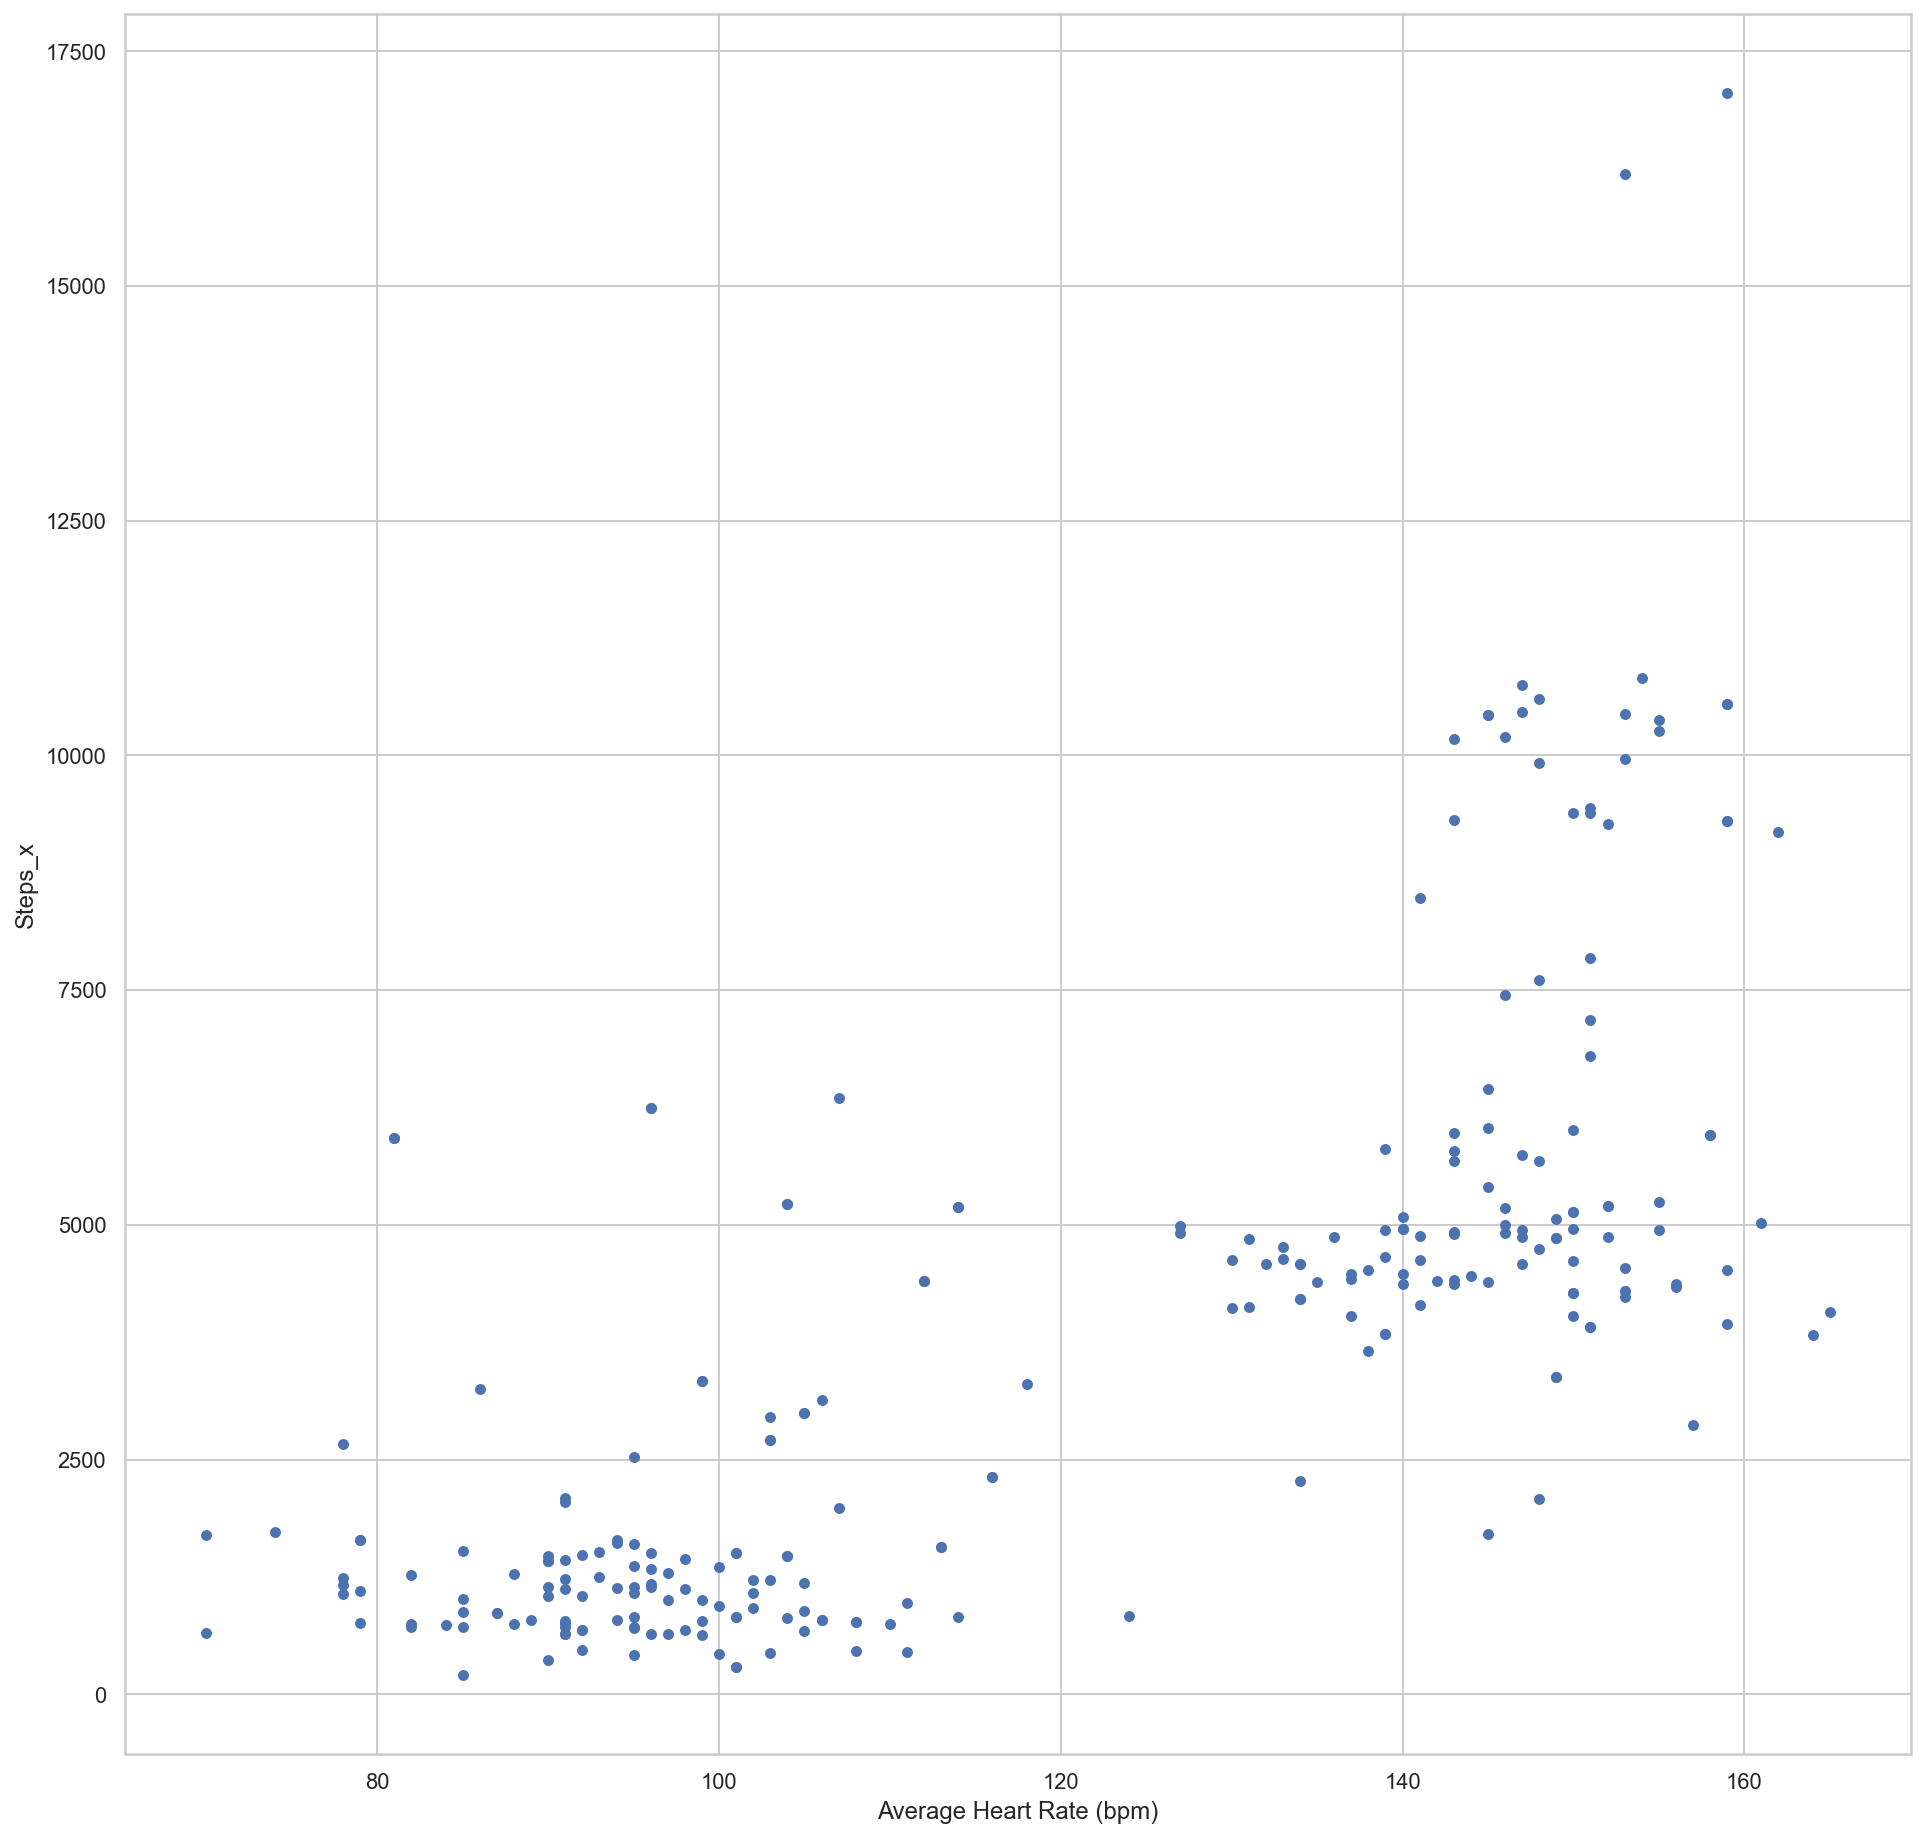

In [ ]:
scat_area = df2.plot.scatter(x='Average Heart Rate (bpm)',
                      y='Steps_x')

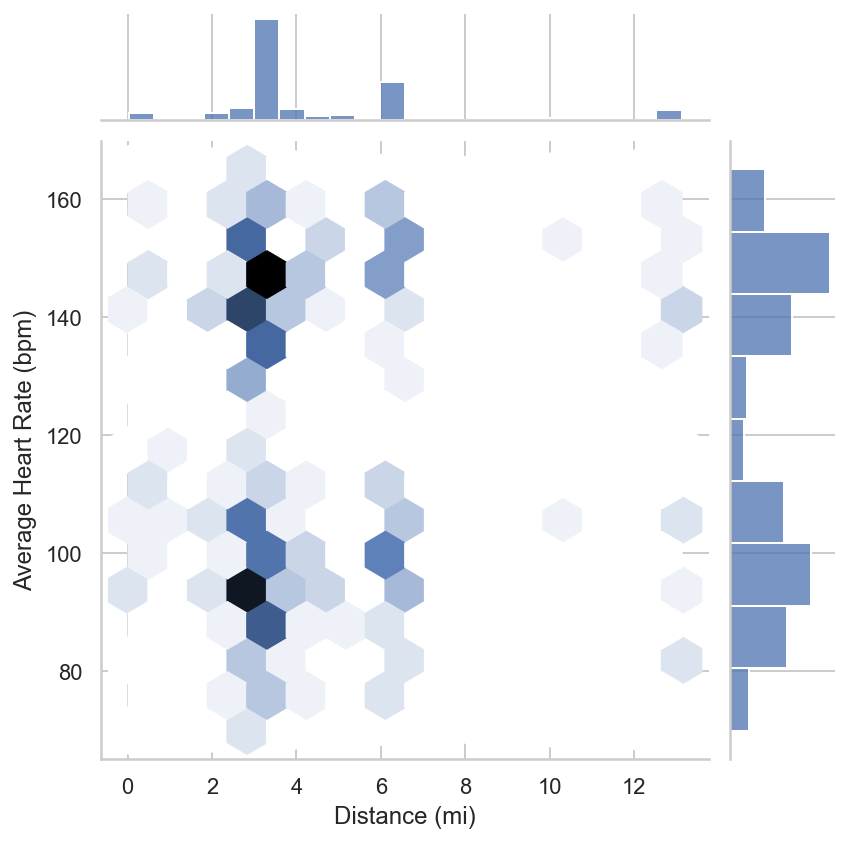

In [ ]:
sns.jointplot(x=df2['Distance (mi)'],
y=df2['Average Heart Rate (bpm)'], kind='hex')

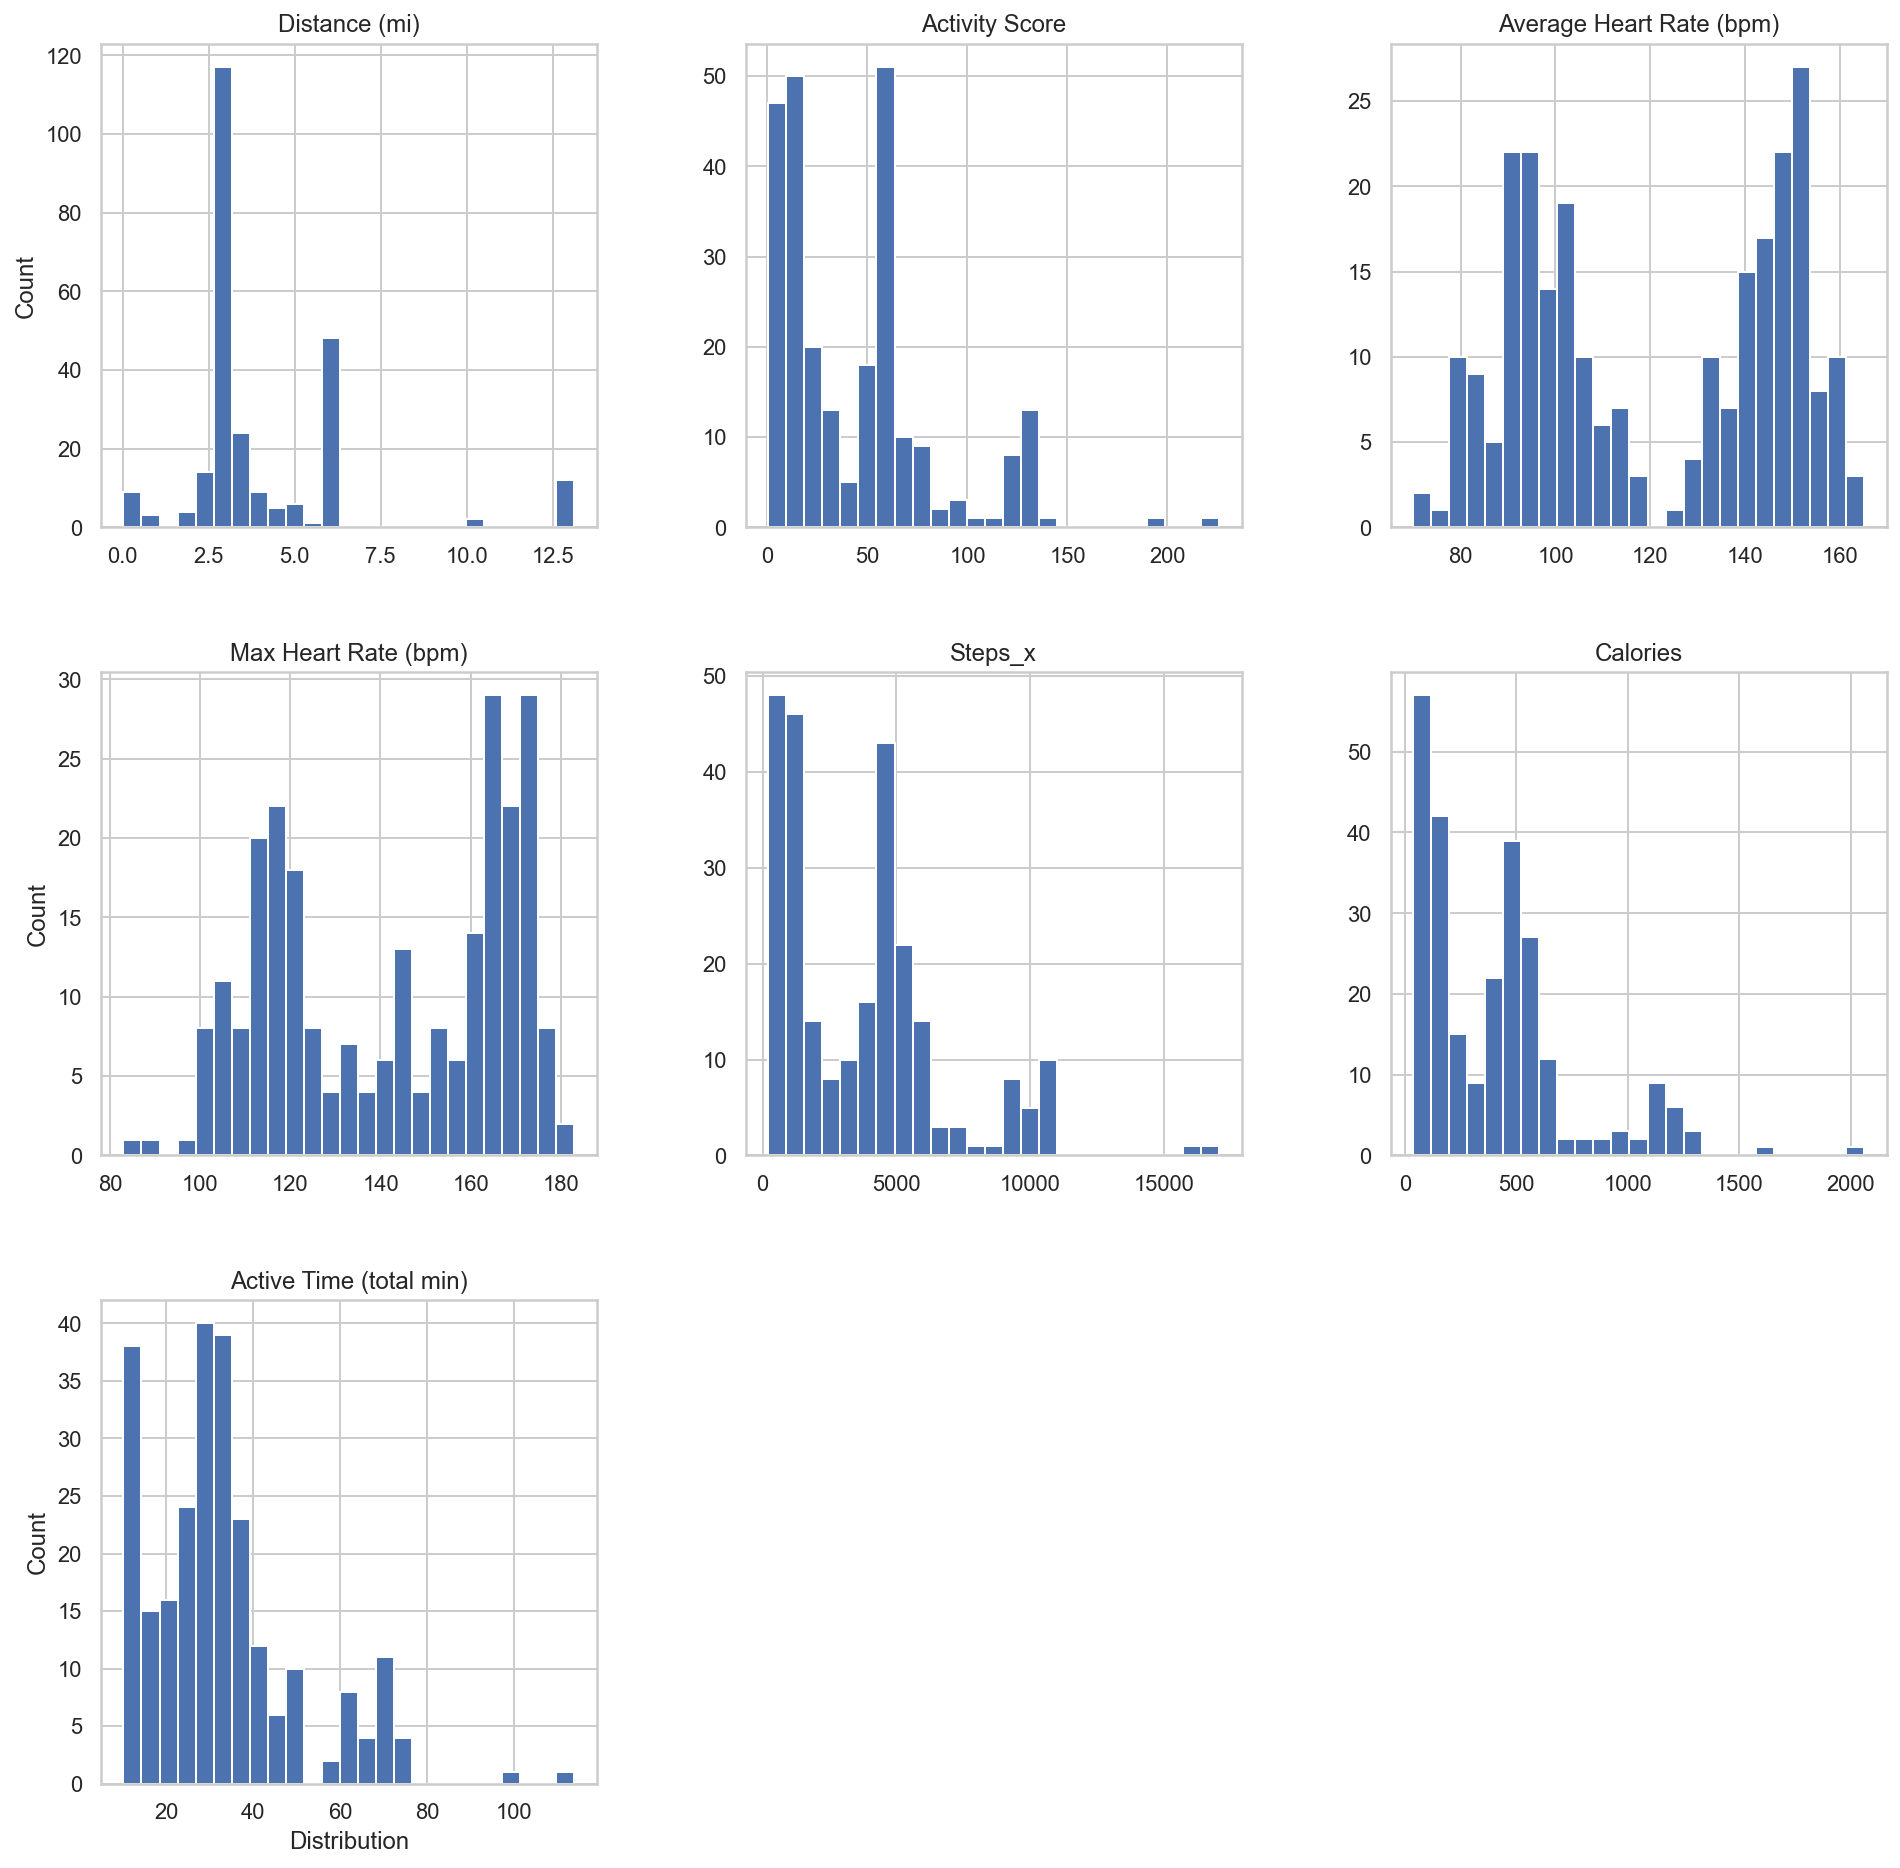

In [ ]:
axList = df2.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')

Text(0.5, 1.0, 'Category Histogram')

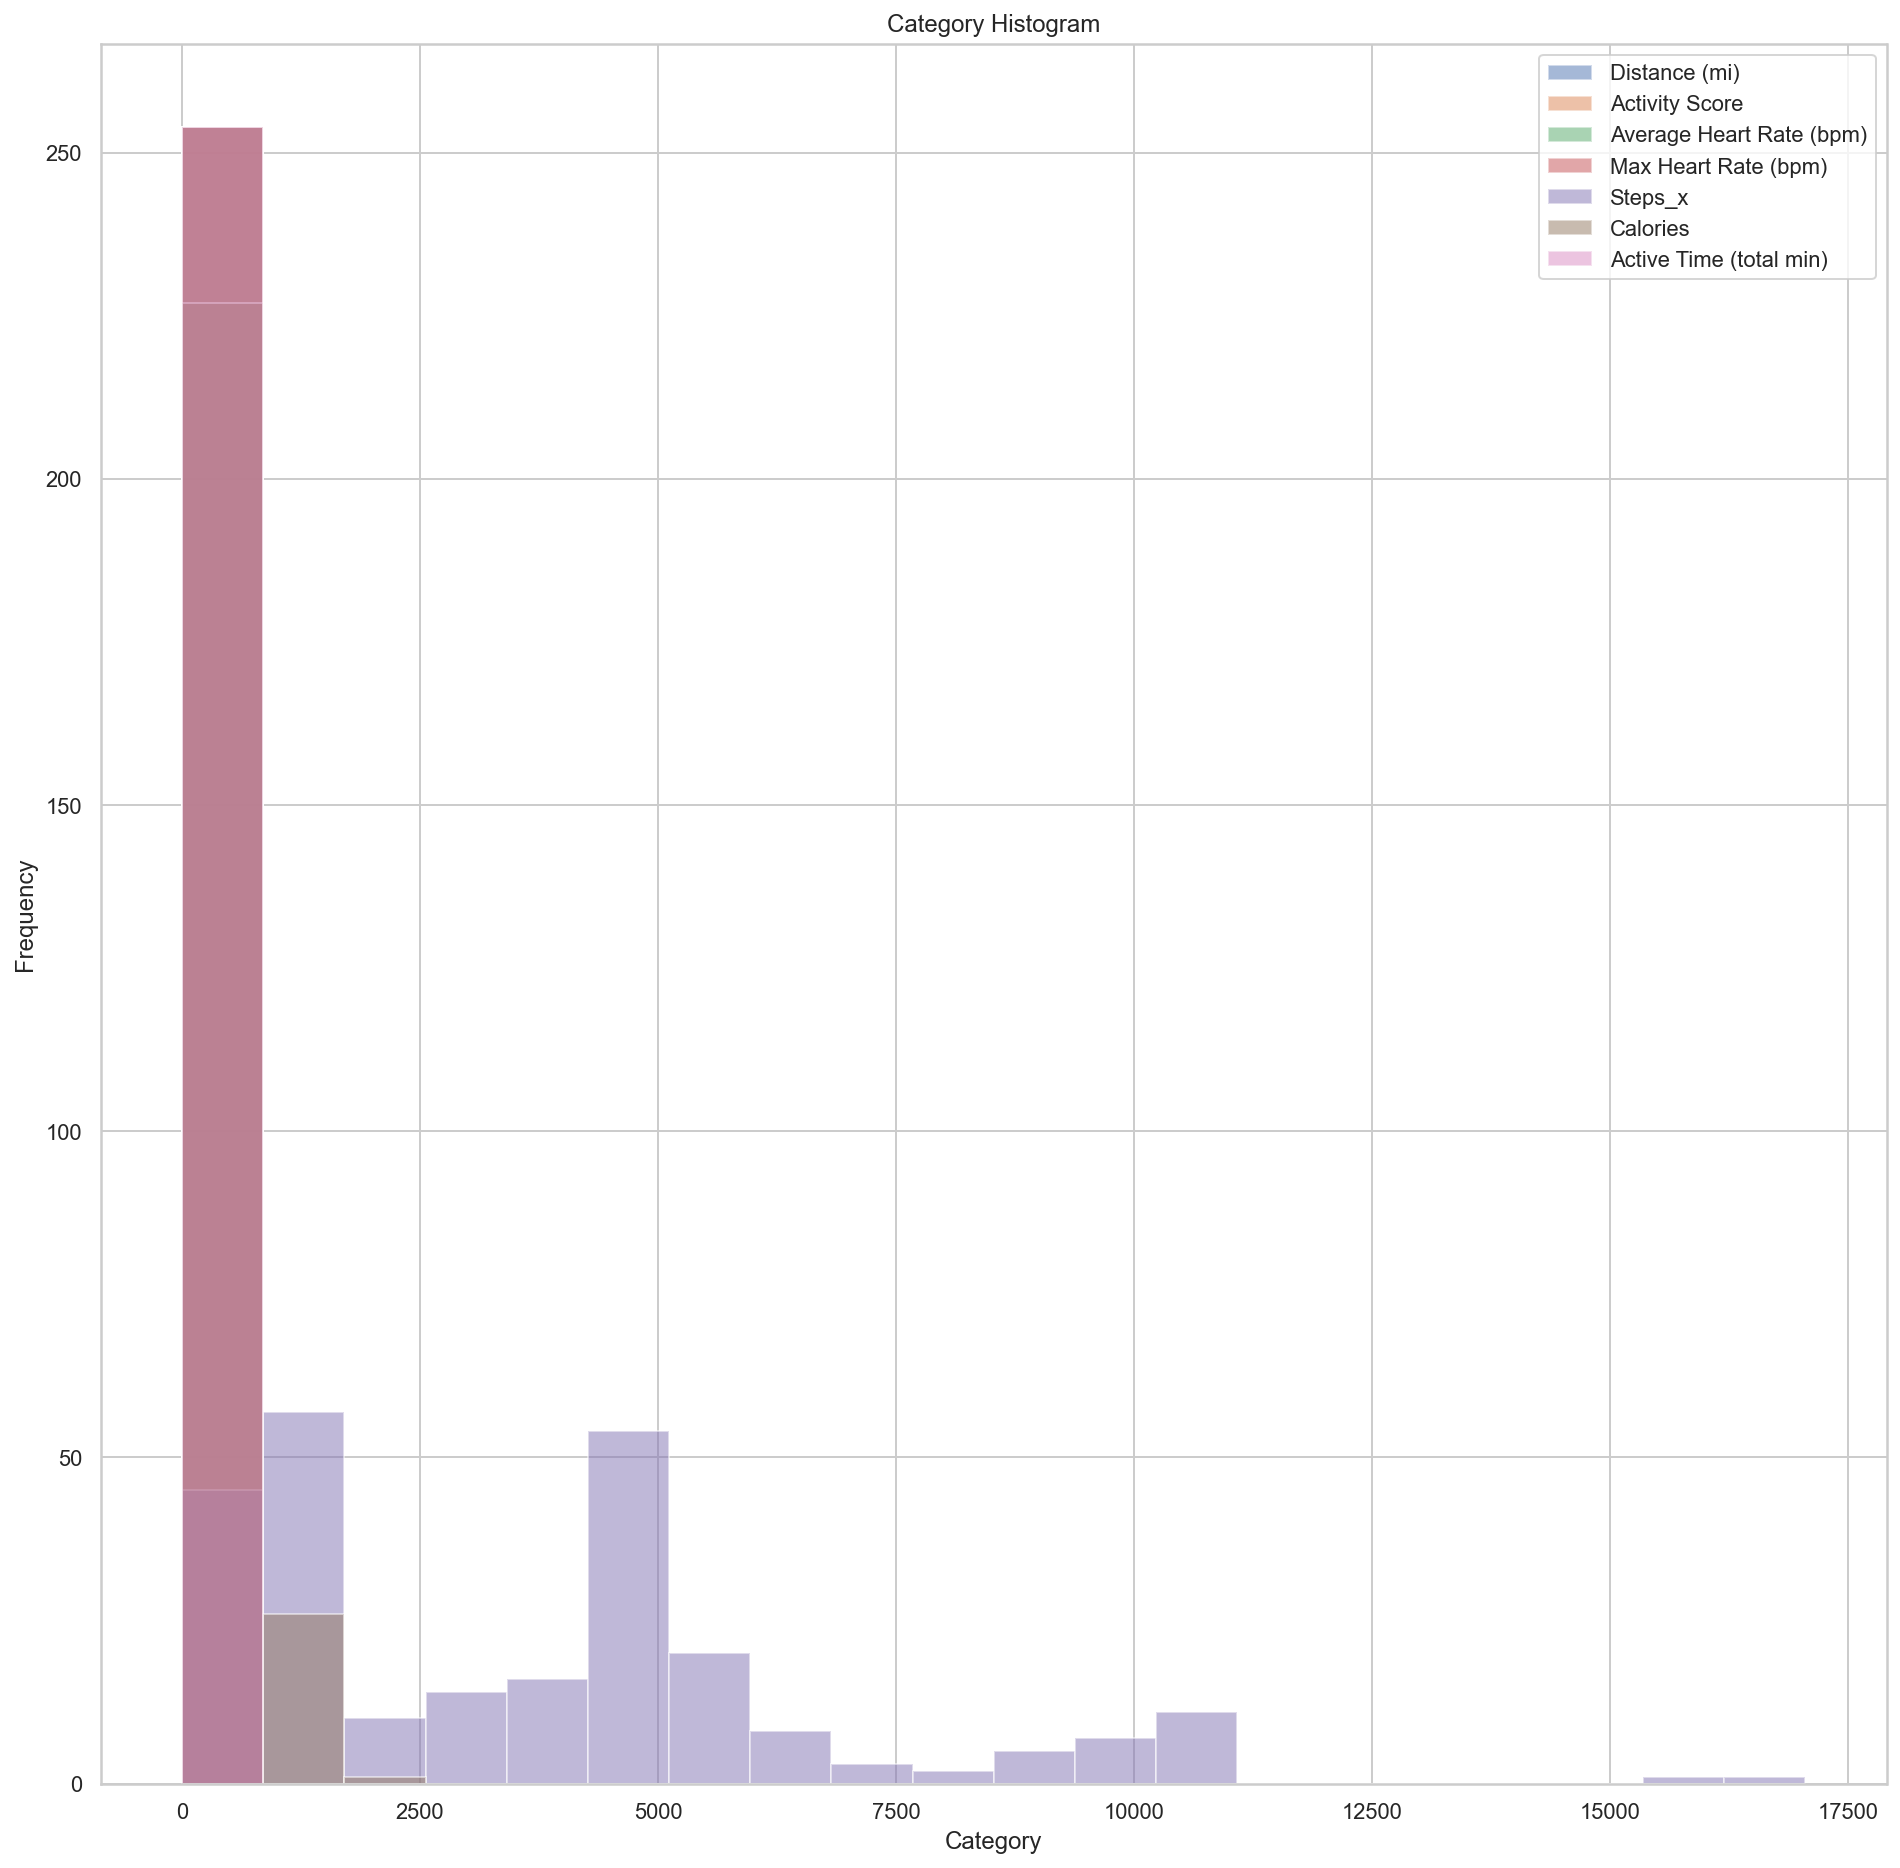

In [ ]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df2.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

Text(0.5, 1.0, 'Avg_Distance by Day')

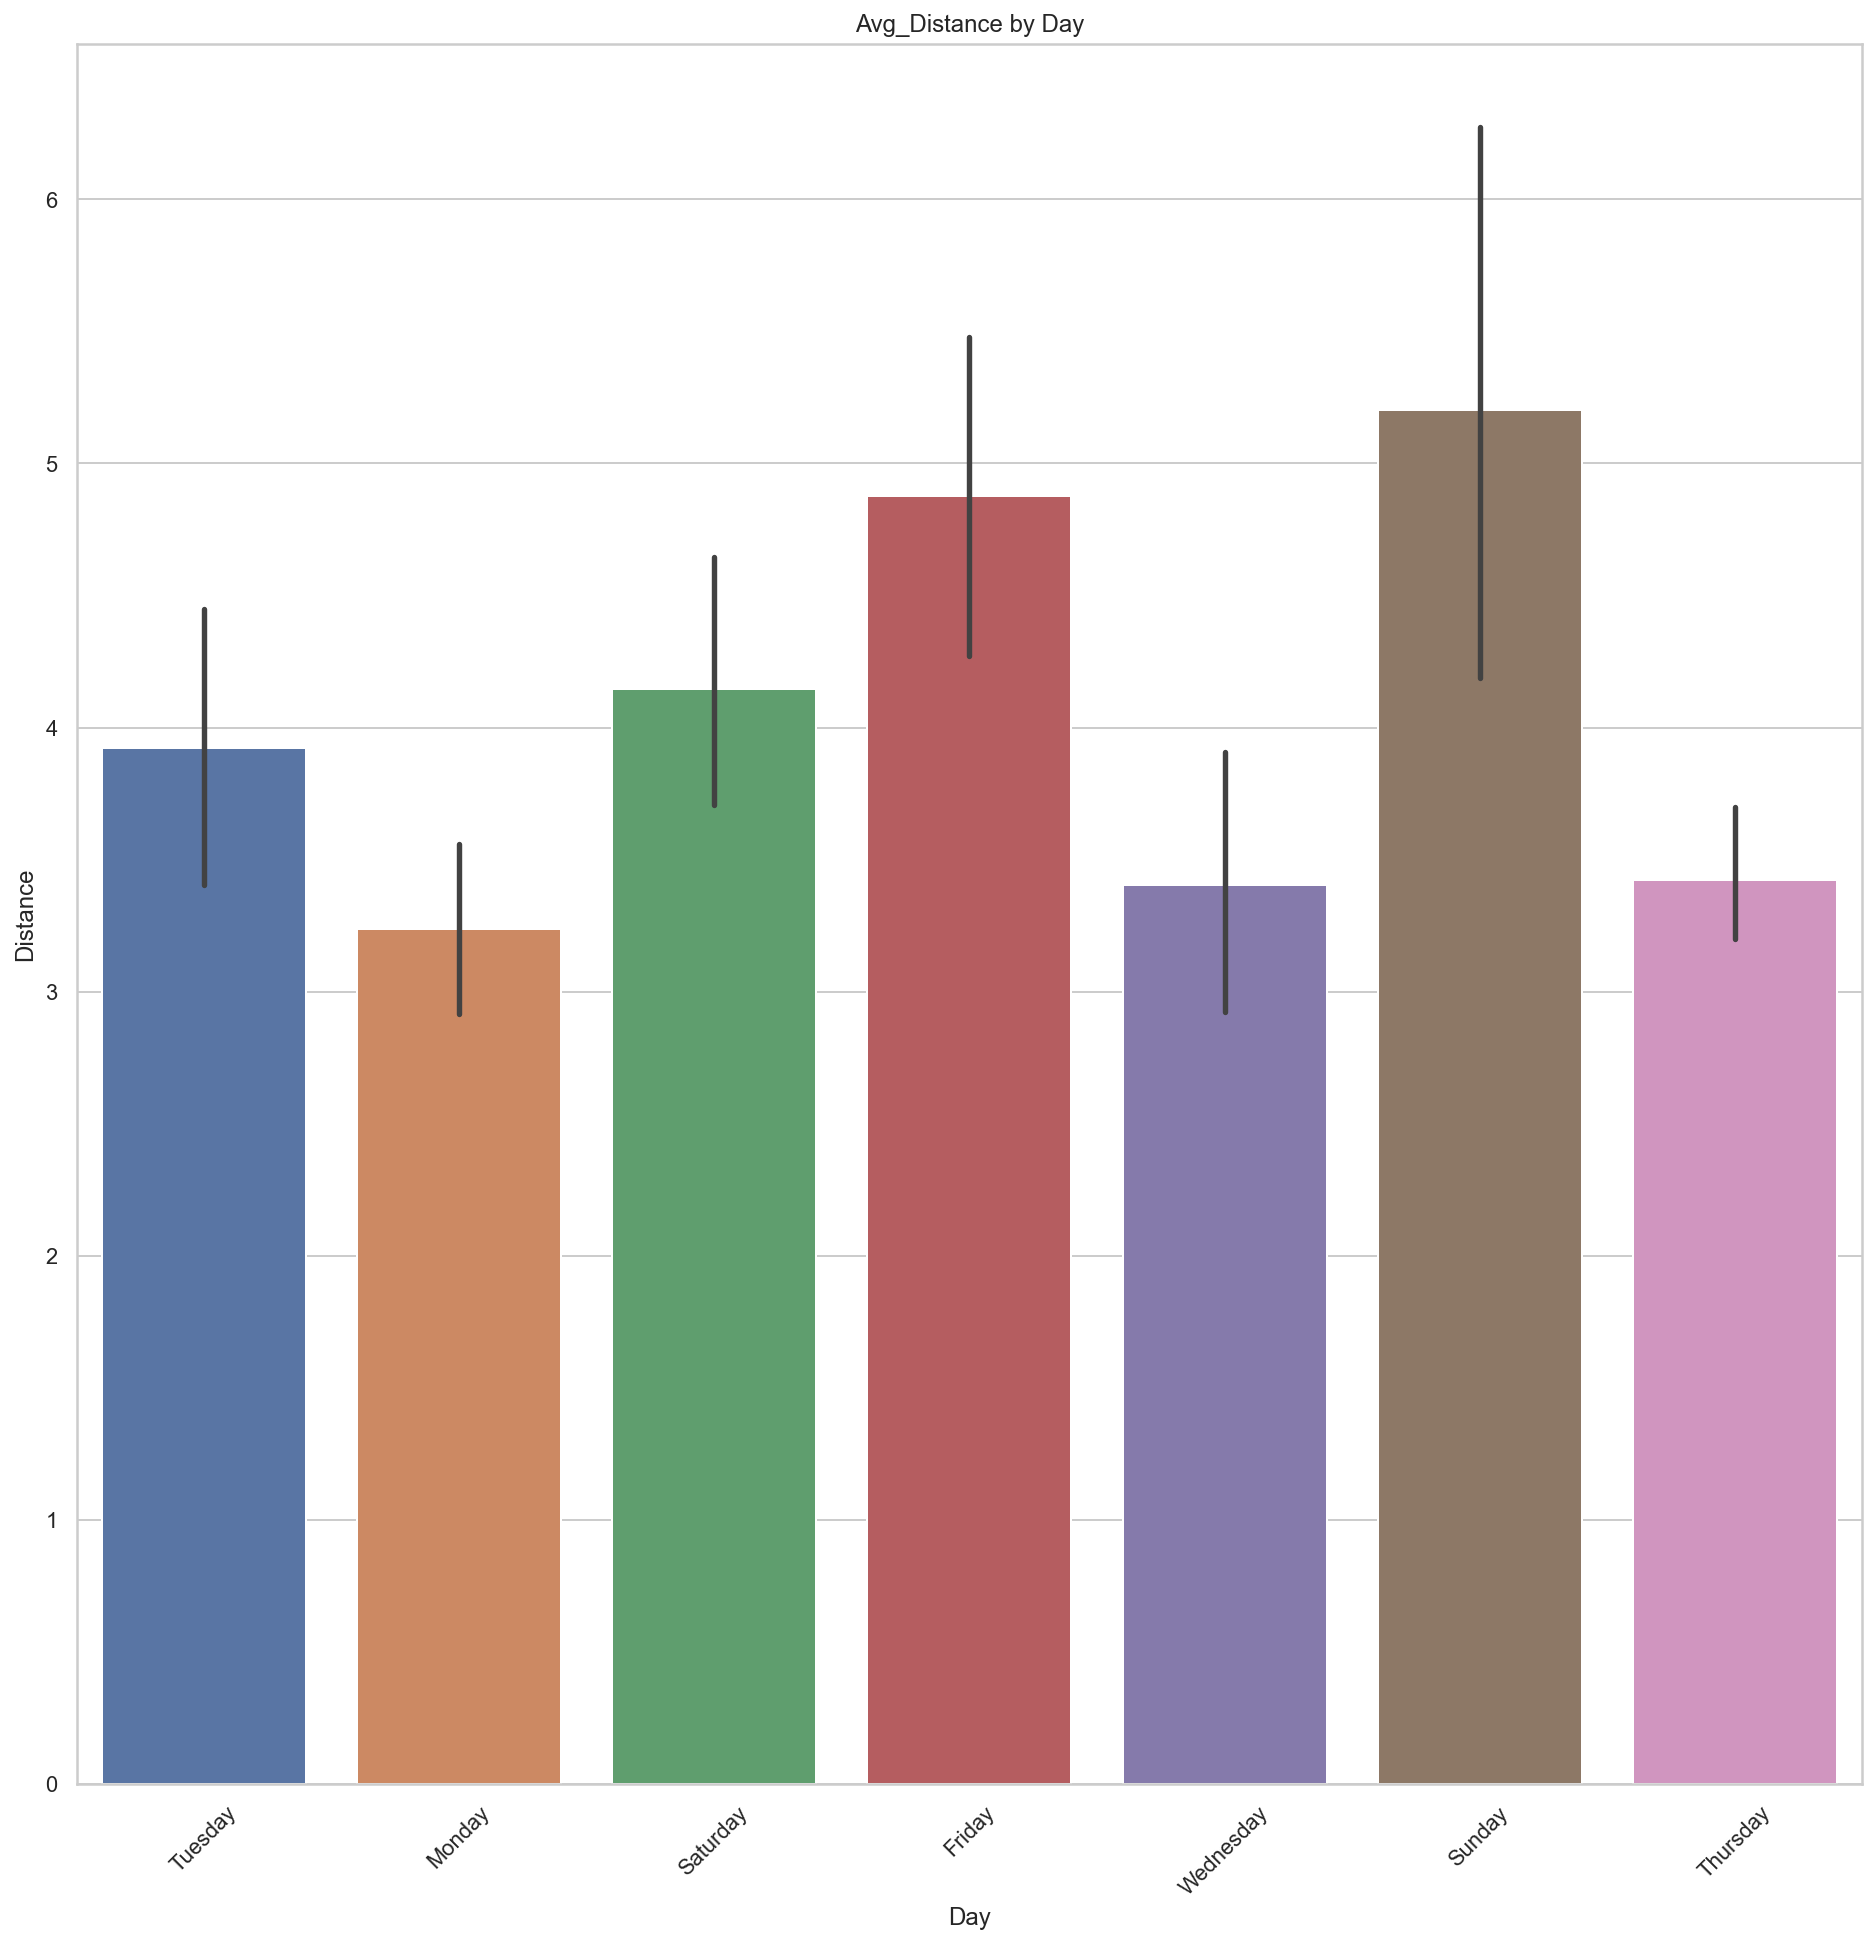

In [ ]:
days = sns.barplot(x='day_of_week_start',y='Distance (mi)', data=df2)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')

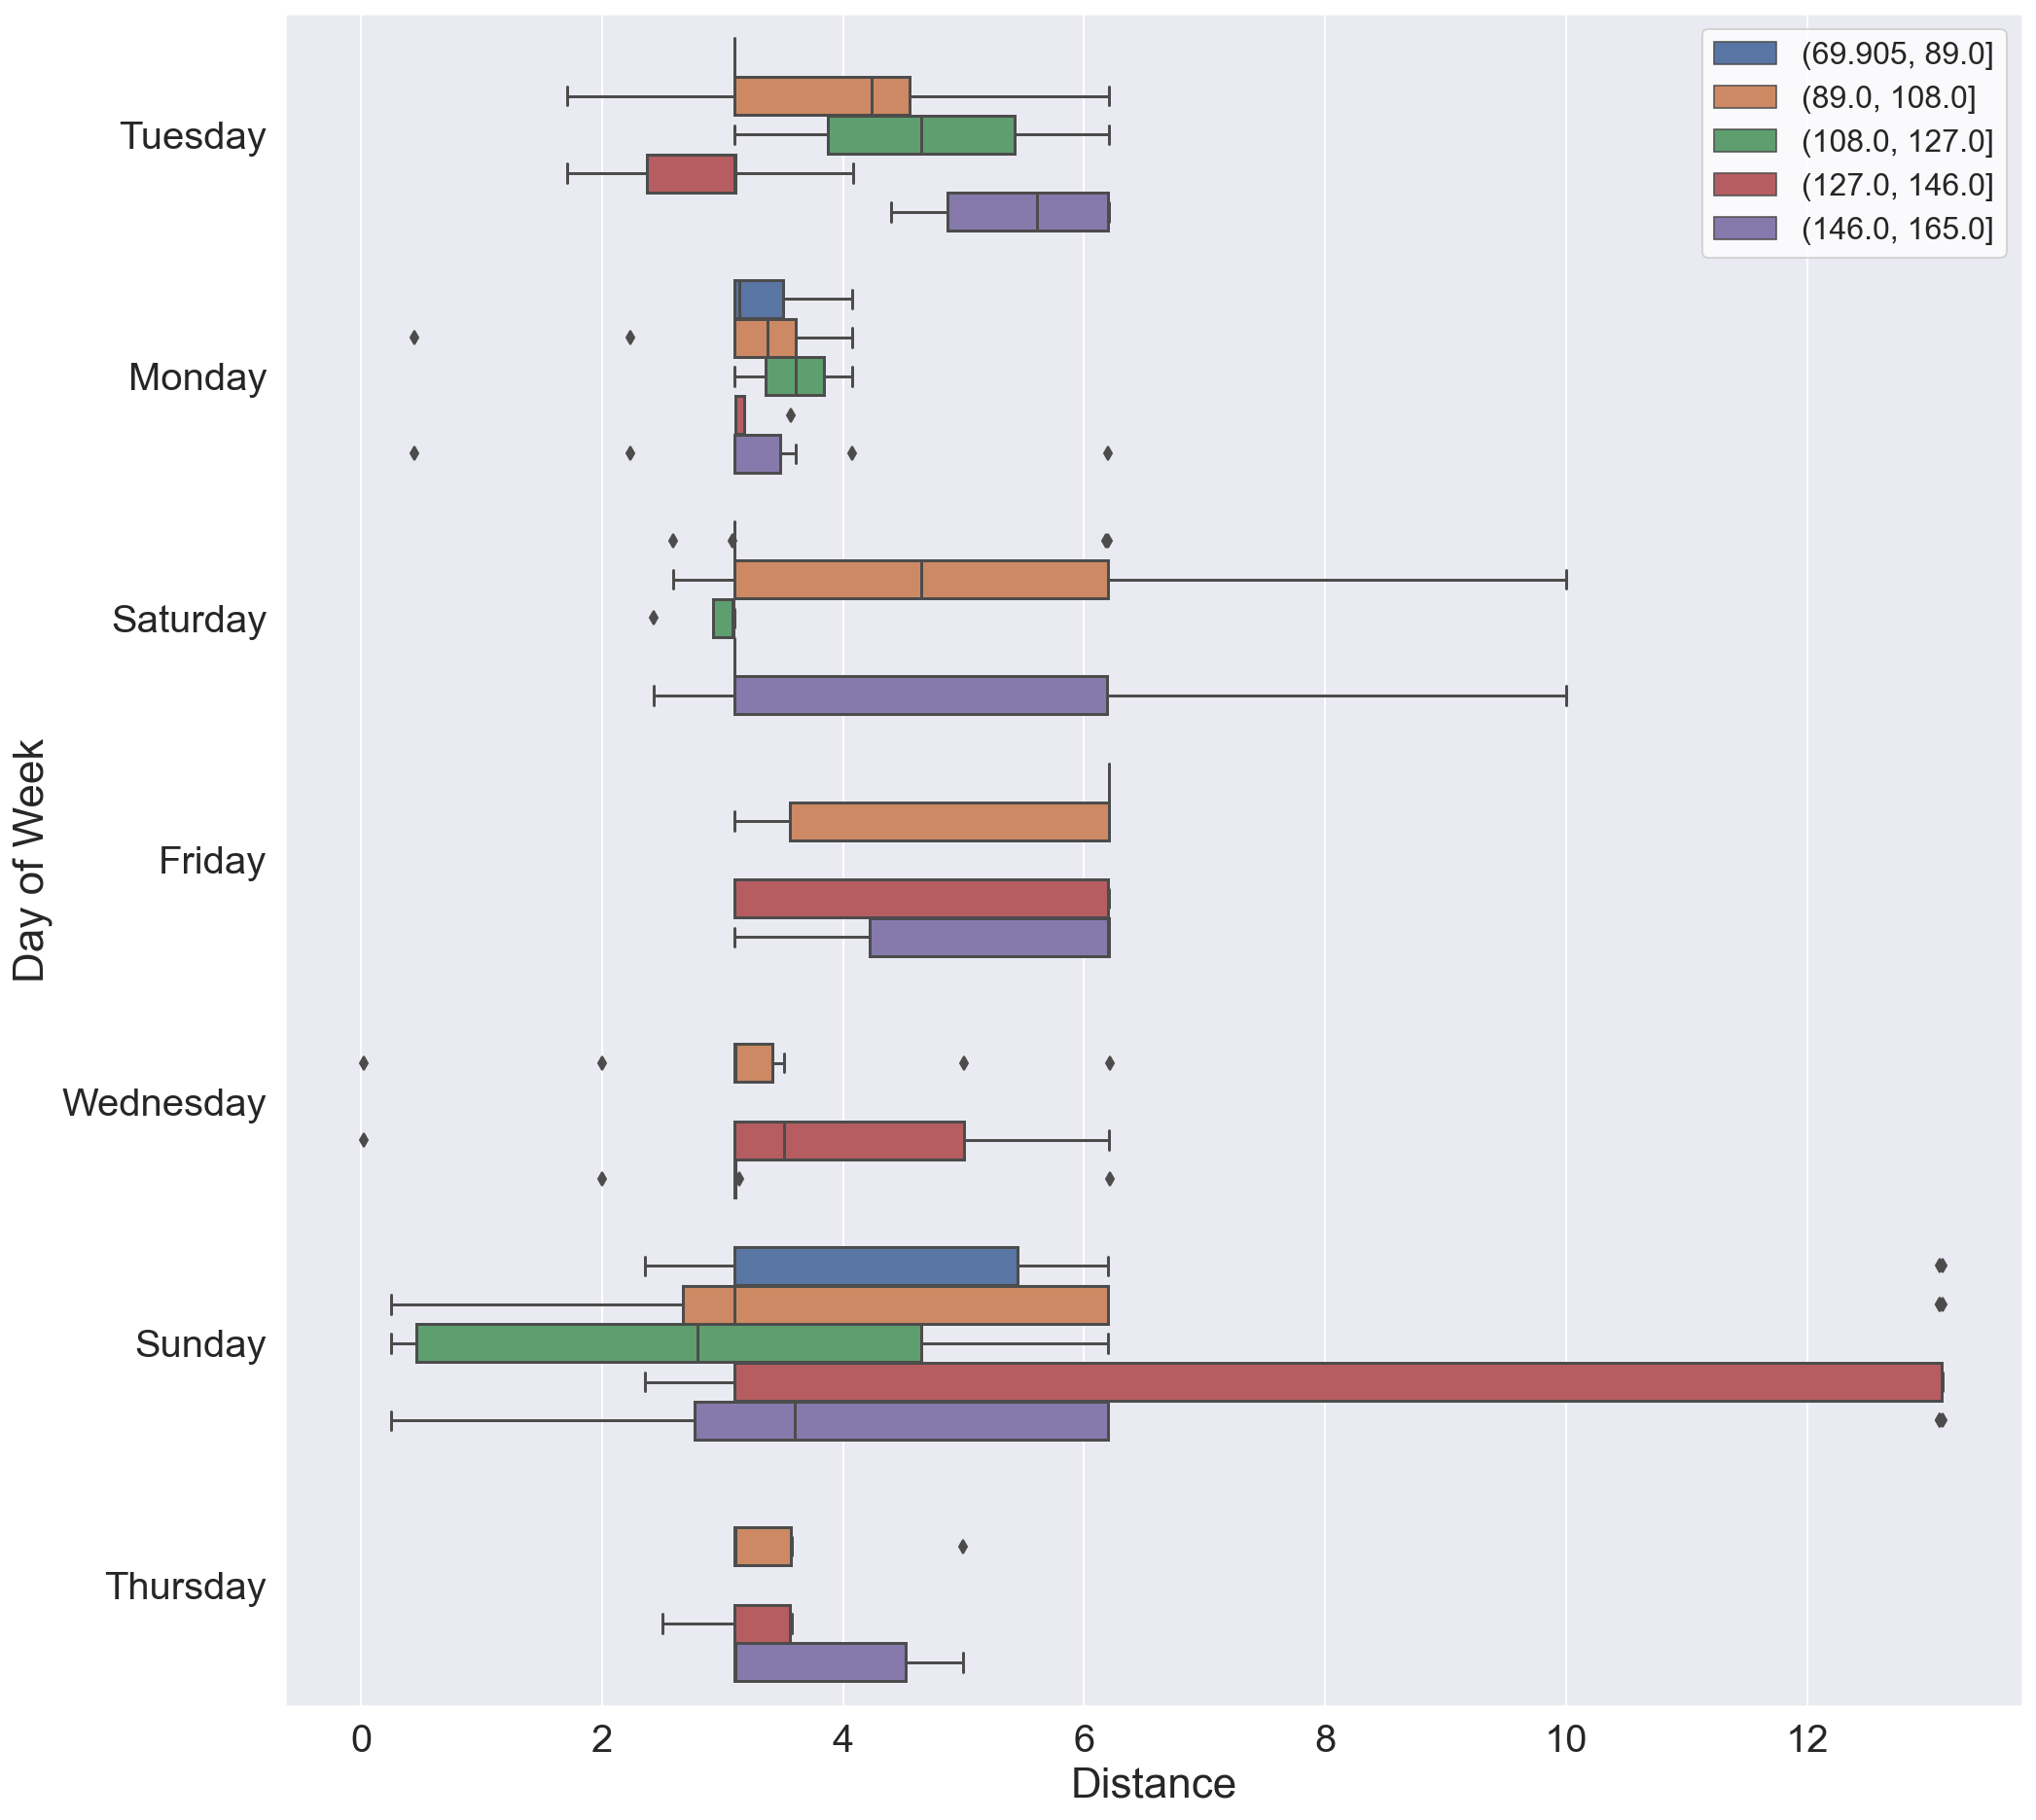

In [ ]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance (mi)', y='day_of_week_start', data=df2, orient = 'h', hue = (pd.cut(df2['Average Heart Rate (bpm)'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

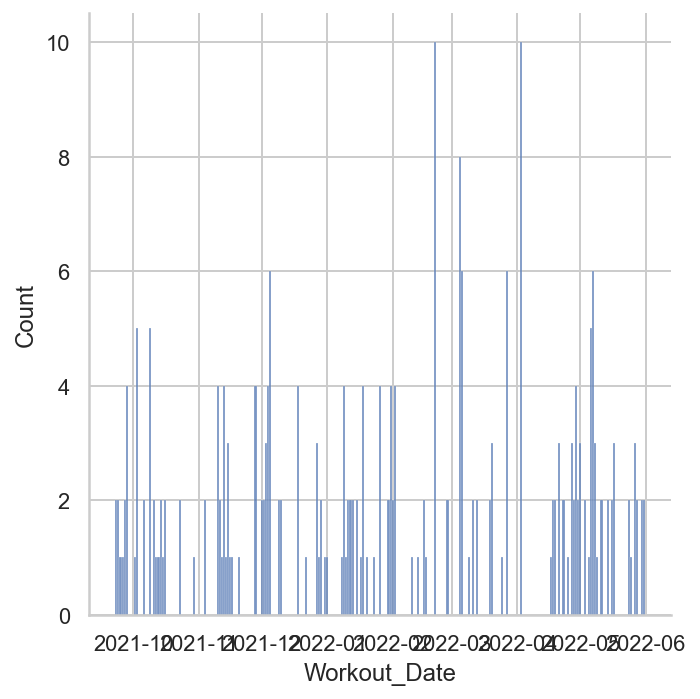

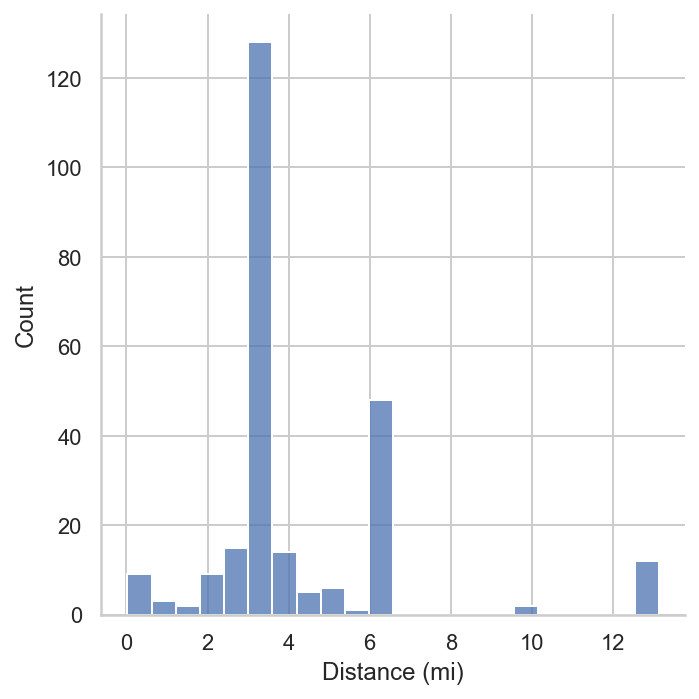

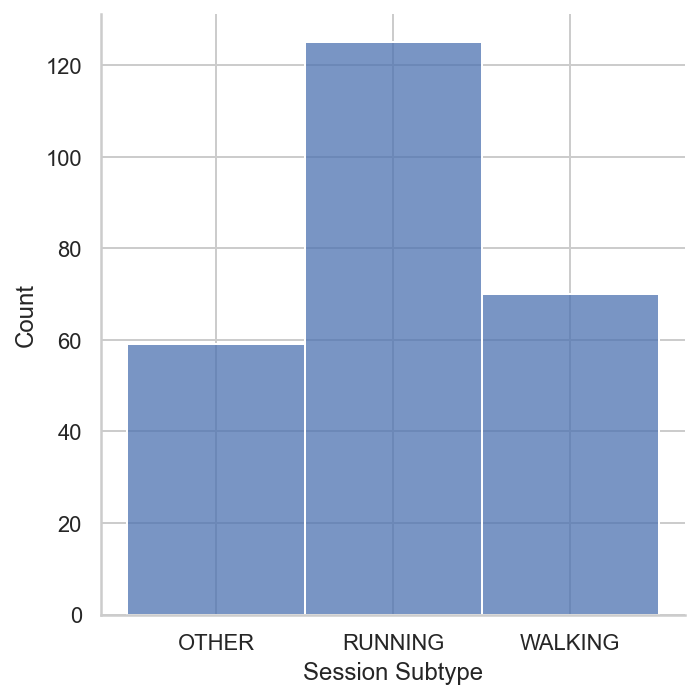

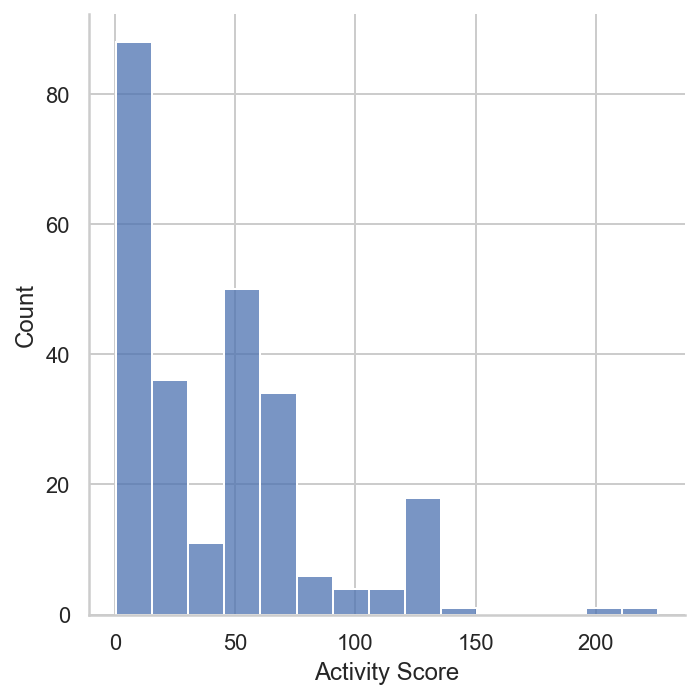

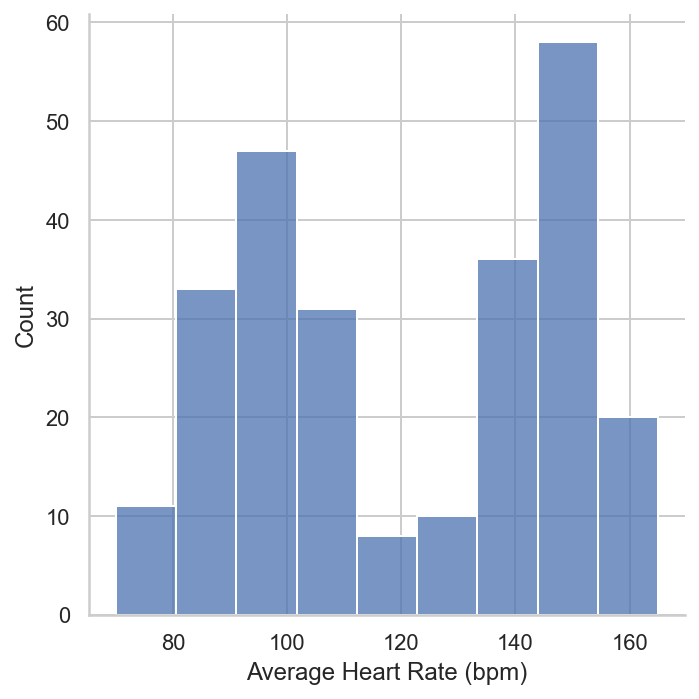

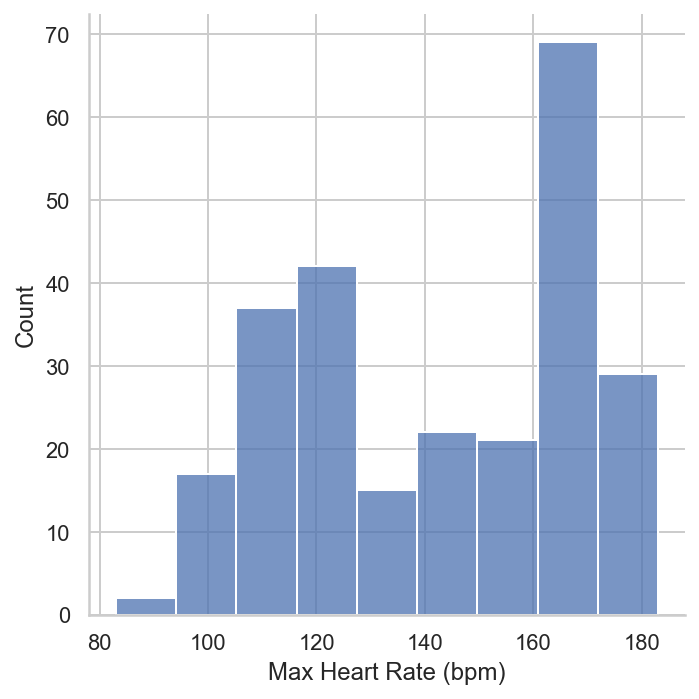

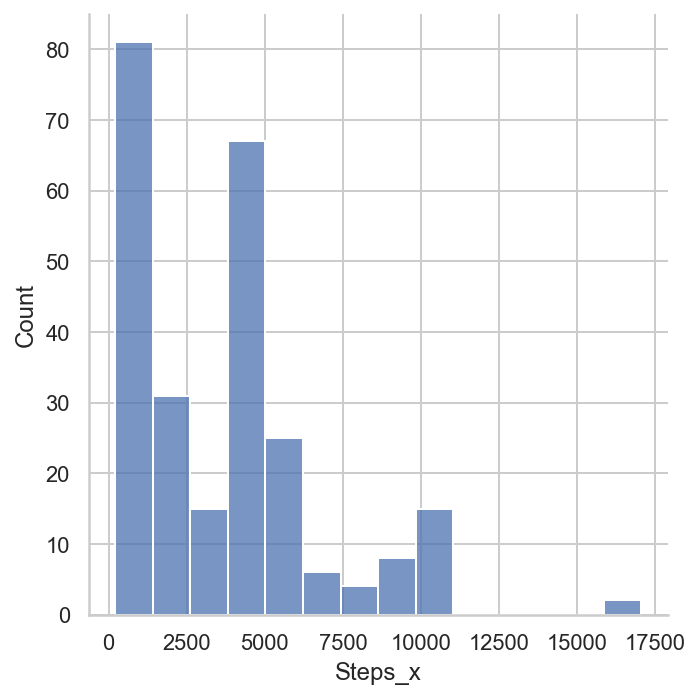

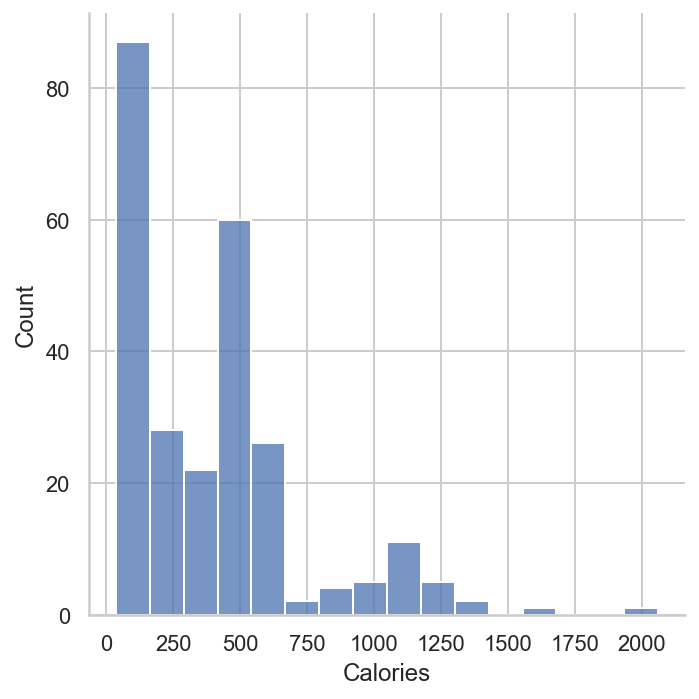

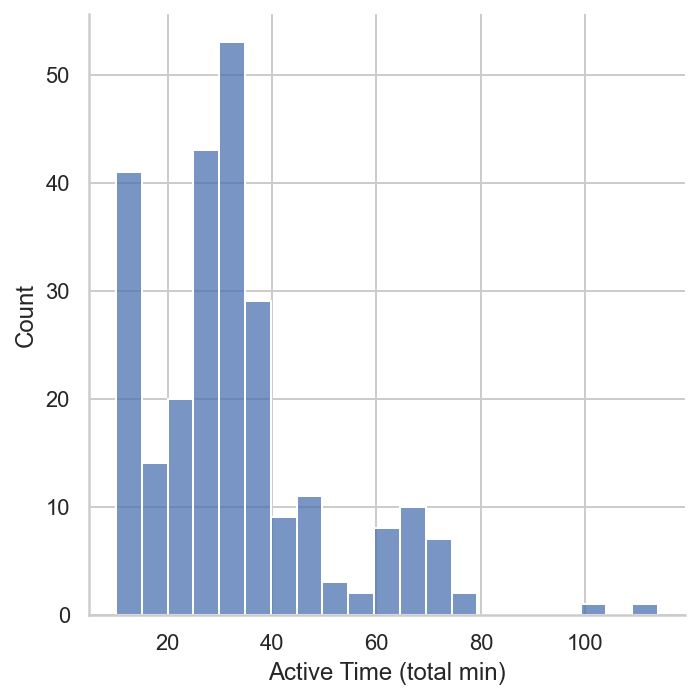

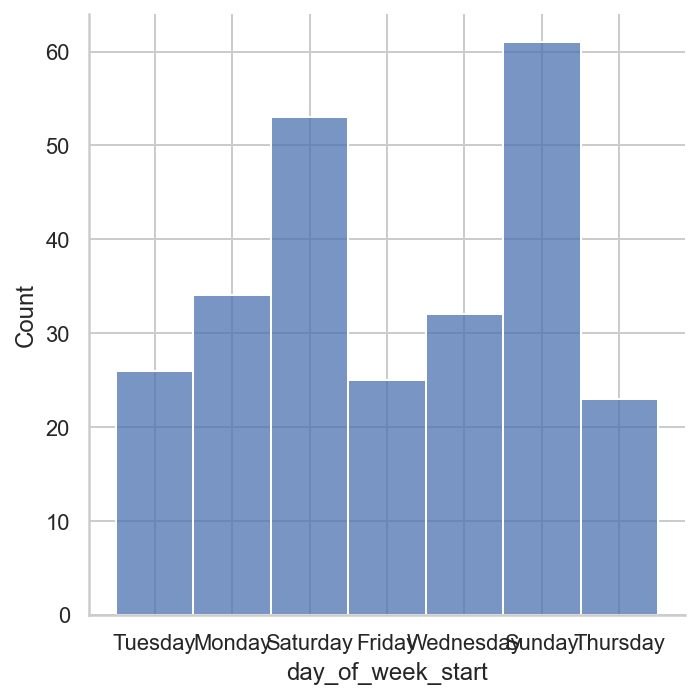

In [ ]:
for column in df2:
    sns.displot(x=column, data=df2)

<AxesSubplot:xlabel='Session Subtype', ylabel='count'>

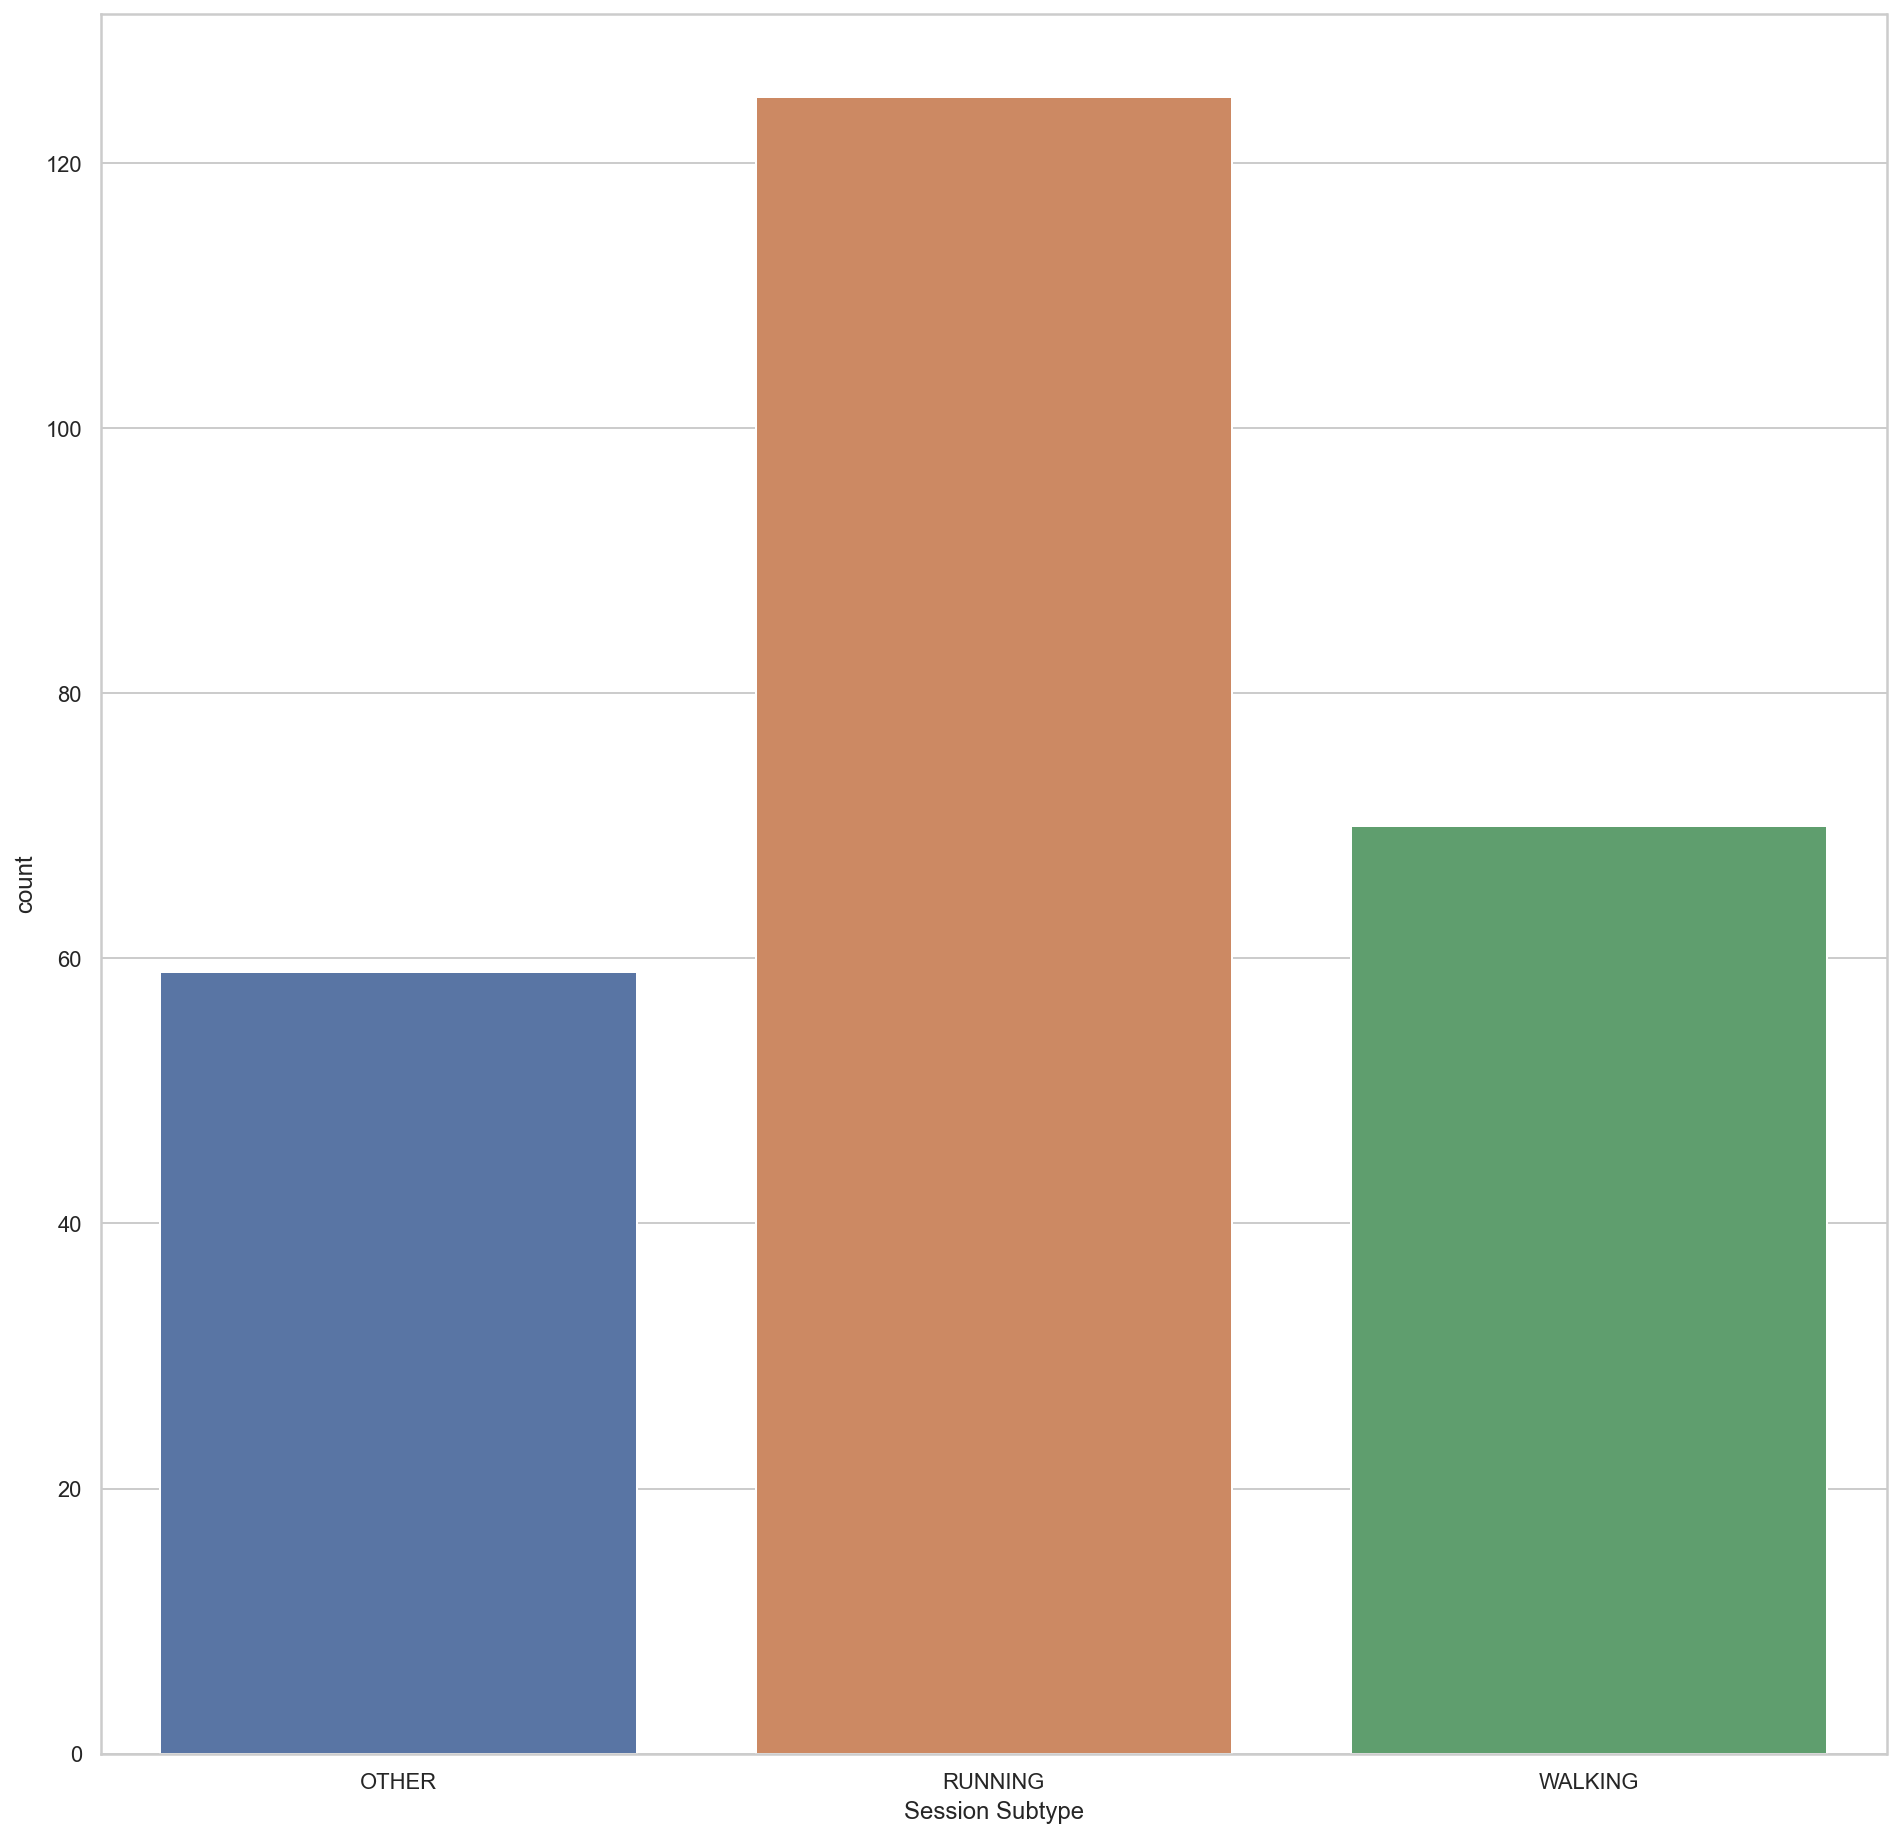

In [ ]:
sns.countplot(x='Session Subtype', data=df2)

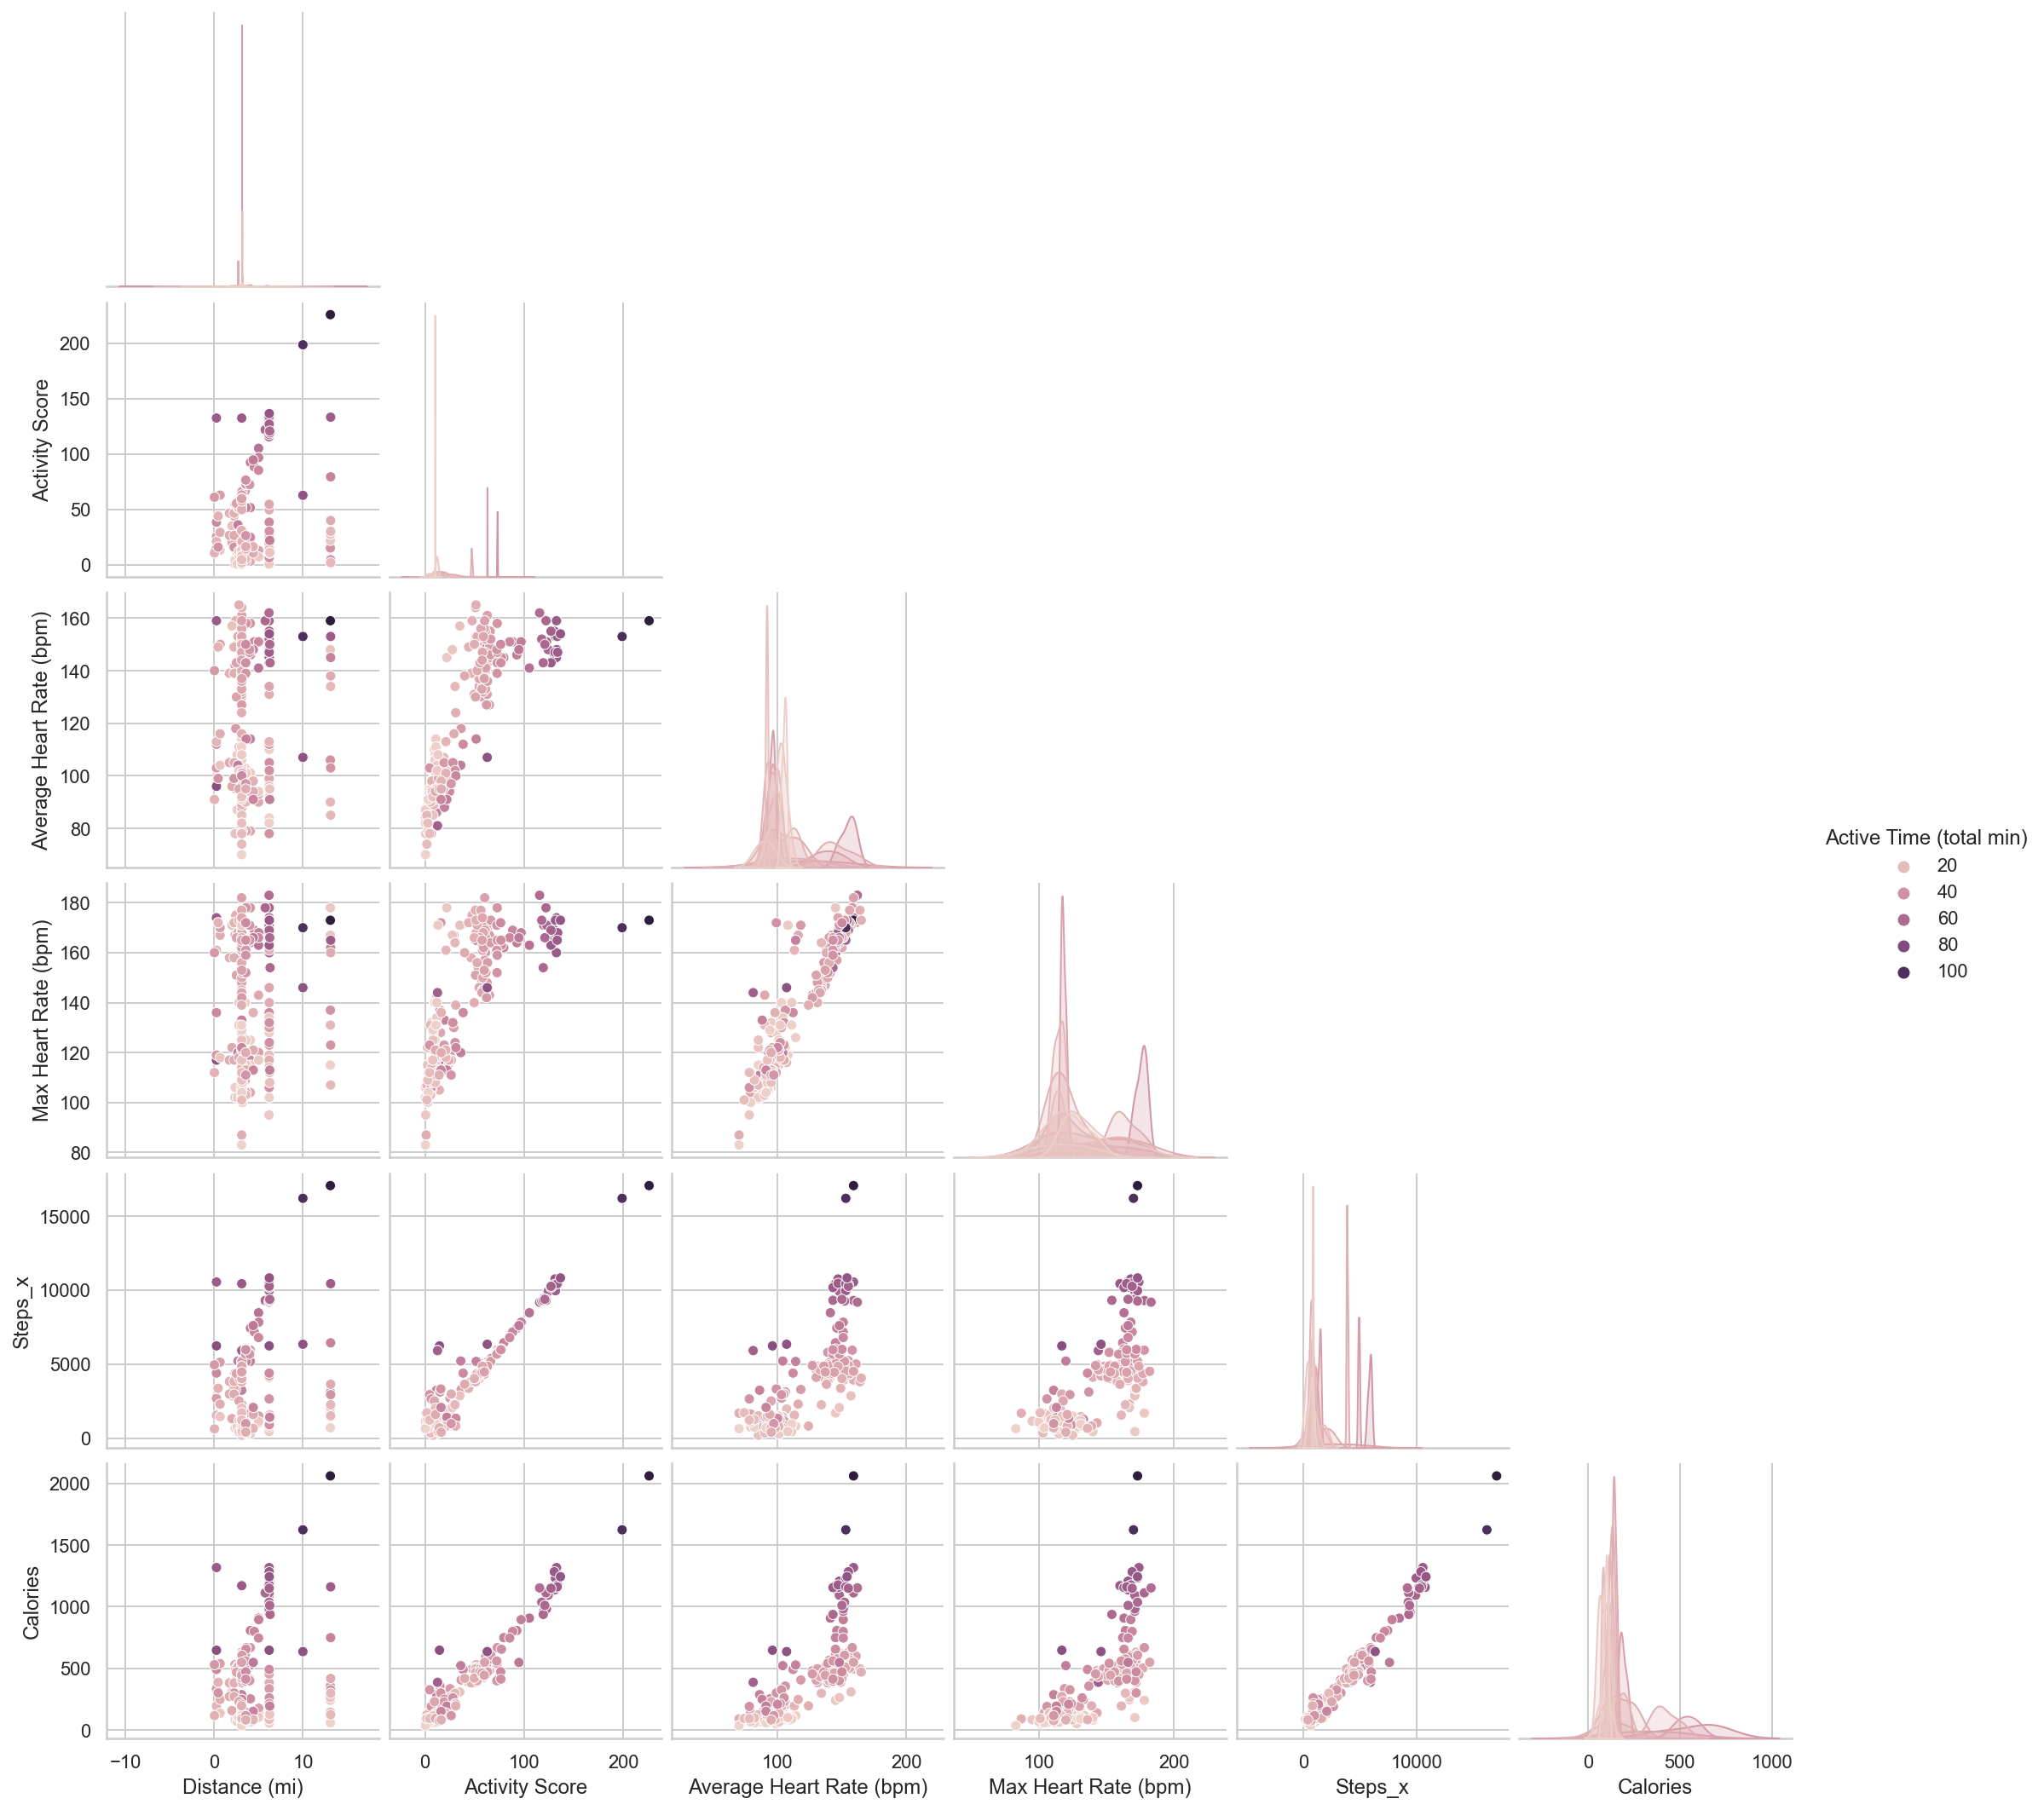

In [ ]:
sns.pairplot(df2, corner=True, hue = 'Active Time (total min)')

# Train / Test Models

In [ ]:
df4 = df2[['Distance (mi)','Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories']]

In [ ]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [ ]:
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

0.0

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [ ]:
data_ohc.shape[1] - df2.shape[1]
df4 = df4

In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'Distance (mi)'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()
df4.columns

Index(['Distance (mi)', 'Activity Score', 'Average Heart Rate (bpm)',
       'Max Heart Rate (bpm)', 'Steps_x', 'Calories'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

no enc  one-hot enc
train  4.715778     4.715778
test   8.484557     8.484557

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        8.484557
not_encoded - minmaxscaling          8.484557
not_encoded - maxabsscaling          8.484557
one_hot_encoded - standardscaling    8.484557
one_hot_encoded - minmaxscaling      8.484557
one_hot_encoded - maxabsscaling      8.484557
--------------------------------------------------------------------------------
not_encoded - standardscaling 8.484557105855485
not_encoded - minmaxscaling 8.484557105855485
not_encoded - maxabsscaling 8.484557105855485
one_hot_encoded - standardscaling 8.484557105855485
one_hot_encoded - minmaxscaling 8.484557105855485
one_hot_encoded - maxabsscaling 8.484557105855485


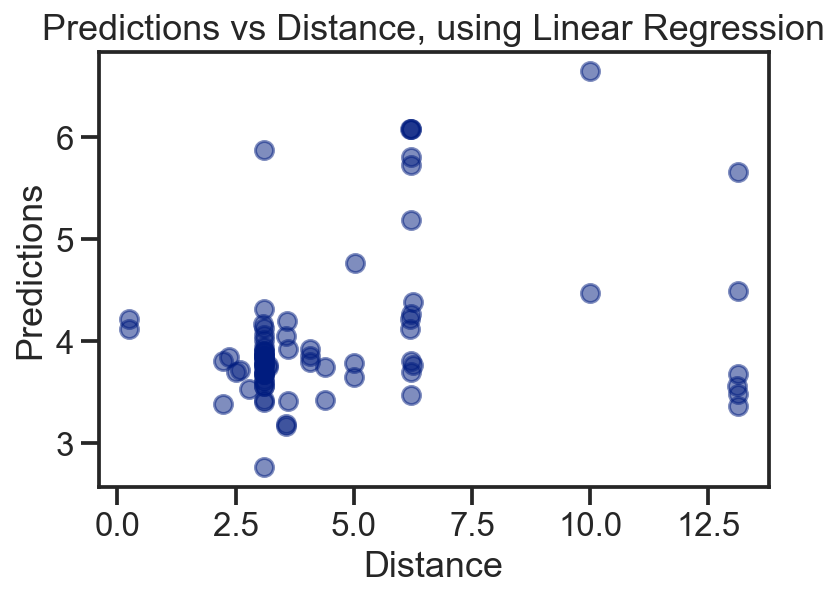

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance (mi)', axis=1)
y = df4['Distance (mi)']

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [ ]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  7  8  9 10 11 12 13 14] 169
Test index: [ 0  3  4  5  6 15 16 17 19 25] 85

Train index: [ 0  2  3  4  5  6  7 10 12 13] 169
Test index: [ 1  8  9 11 21 22 27 30 32 33] 85

Train index: [ 0  1  3  4  5  6  8  9 11 15] 170
Test index: [ 2  7 10 12 13 14 18 20 23 24] 84



In [ ]:
s = StandardScaler()
lr = LinearRegression()

In [ ]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [ ]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [ ]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [ ]:
r2_score(y, predictions)

0.007527907616762808

In [ ]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [ ]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [ ]:
list(zip(alphas,scores))

[(1e-09, 0.007527908492173552),
 (1e-08, 0.0075279219734510905),
 (1e-07, 0.007528057293522683),
 (1e-06, 0.00752941614683722),
 (1e-05, 0.007543046062633785),
 (0.0001, 0.0075847579259396),
 (0.001, 0.008891638986663897),
 (0.01, 0.015880327327990496),
 (0.1, 0.020222055652276194),
 (1.0, -0.011644964143384895)]

In [ ]:
np.mean(scores) # difference of .08

0.007859016571810363

In [ ]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([ 0.01233142, -0.03412163,  0.00079418, -0.00038179,  0.00568443])

In [ ]:
Lasso(alpha=1.0).fit(X, y).coef_

array([ 0.        , -0.0265801 , -0.        , -0.00029835,  0.00592941])

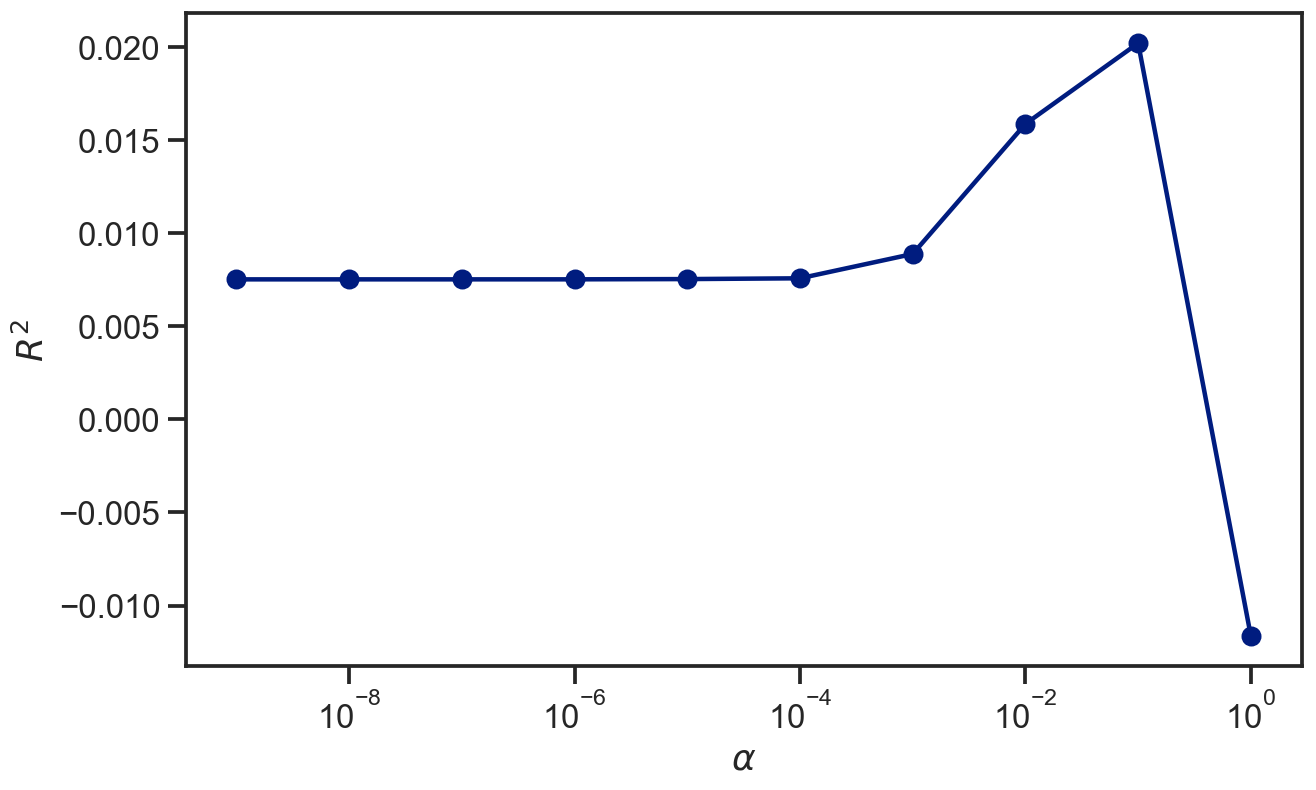

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [ ]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

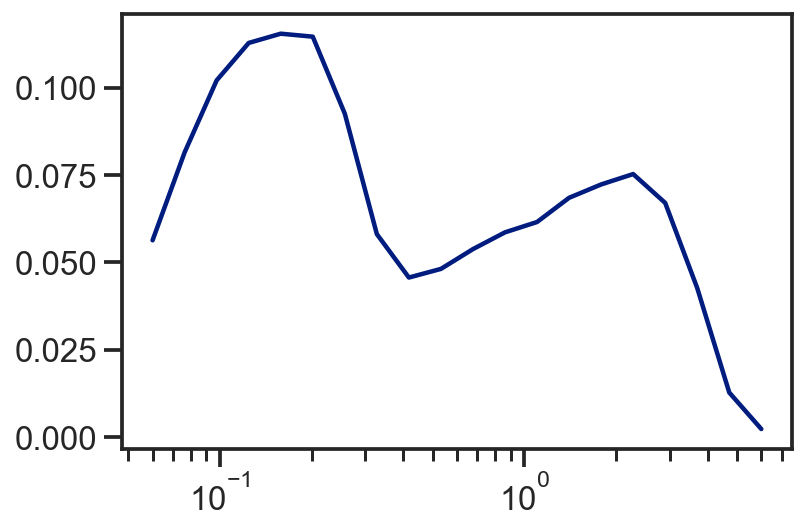

In [ ]:
plt.semilogx(alphas, scores);

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.16165453055403023

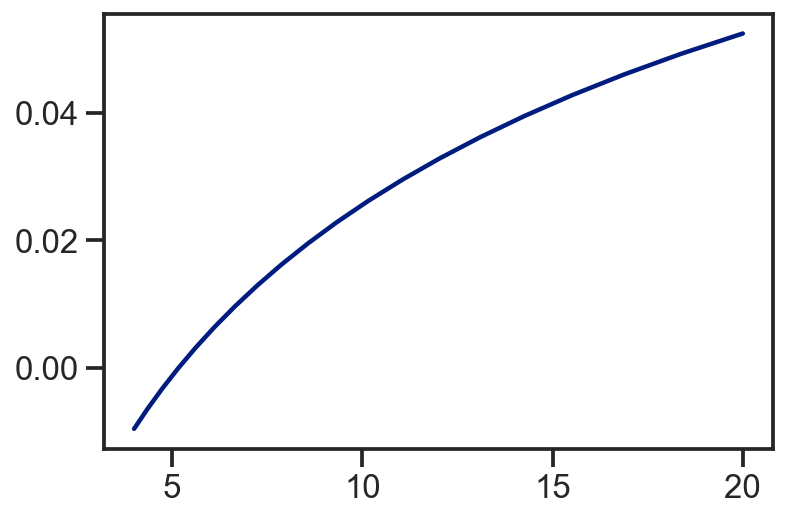

In [ ]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.16165453055403023

In [ ]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [ ]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [ ]:
col_names_dict

{0: 'Activity Score',
 1: 'Average Heart Rate (bpm)',
 2: 'Max Heart Rate (bpm)',
 3: 'Steps_x',
 4: 'Calories'}

In [ ]:
df_importances.sort_values(by=1)

0         1
15   x2^2 -0.292307
1      x0 -0.227176
20   x4^2 -0.097811
16  x2 x3 -0.007389
..    ...       ...
9   x0 x3  0.000000
10  x0 x4 -0.000000
12  x1 x2  0.048546
6    x0^2  0.669796

[21 rows x 2 columns]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [ ]:
grid.best_score_, grid.best_params_

(0.06037715215533771,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 20.0})

In [ ]:
y_predict = grid.predict(X)

In [ ]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.17252718072207274

In [ ]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        , -0.33620996, -0.13053695,  0.10140047, -0.11067321,
        0.25686677,  0.51578315, -0.02933158,  0.05890495,  0.28347776,
        0.12886277, -0.1893841 ,  0.34560176, -0.03822218,  0.02378499,
       -0.38119423, -0.18332302,  0.02964047, -0.04187307, -0.0817427 ,
       -0.19962003])

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00857647, 0.01173941, 0.01353494, 0.00966636, 0.00968154,
        0.00768034, 0.0071764 , 0.00799664, 0.01243718, 0.01299477,
        0.0123651 , 0.00971309, 0.01295789, 0.01084105, 0.01203163,
        0.01455824, 0.0137554 , 0.01792224, 0.01565631, 0.01423852,
        0.0274264 , 0.01390664, 0.0120608 , 0.01475573, 0.00996844,
        0.01162815, 0.00917315, 0.01406296, 0.0143036 , 0.00906626,
        0.01054351, 0.01029881, 0.01549816, 0.01510922, 0.01176278,
        0.00803566, 0.01302385, 0.01199929, 0.01045076, 0.01034419,
        0.01227172, 0.00770632, 0.01008073, 0.0077889 , 0.00956988,
        0.01271995, 0.01780653, 0.01792216, 0.02005839, 0.0249962 ,
        0.0225447 , 0.02209441, 0.01576726, 0.01697842, 0.01917911,
        0.01278234, 0.01534653, 0.01269579, 0.01271566, 0.01133728,
        0.01184122, 0.0135115 , 0.01473856, 0.01280189, 0.01064404,
        0.0082376 , 0.00911291, 0.00790191, 0.01215267, 0.01515349,
        0.00920002, 0.01344895,

NameError: name 'X_real' is not defined

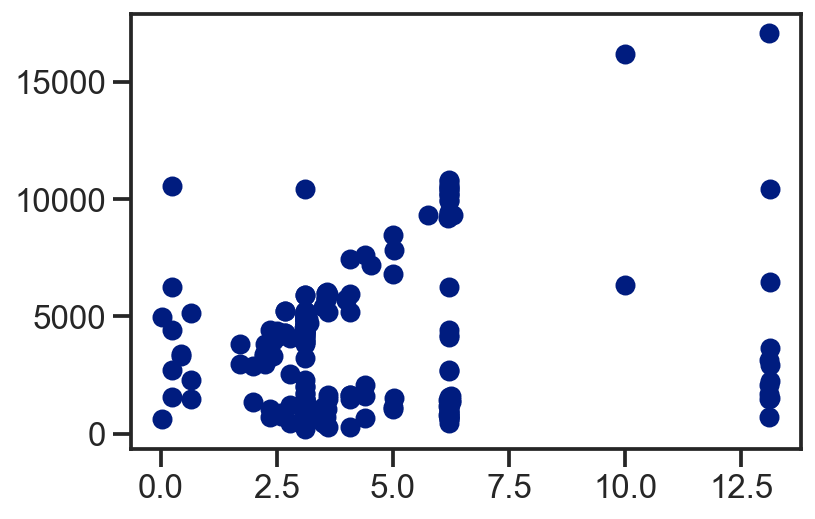

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance (mi)']]
Y_data = df4['Steps_x']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


In [ ]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [ ]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

In [ ]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25
            )

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [ ]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['Distance (mi)'] = le.fit_transform(df4['Distance (mi)'])
df4['Distance (mi)'].sample(5)
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

In [ ]:
df2.head(2)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
0   2022-05-31           4.08           OTHER           24.85   
1   2022-05-31           4.08         RUNNING           92.57   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
0                      94.0                 117.0   1645.0     253.0   
1                     146.0                 164.0   7446.0     807.0   

   Active Time (total min) day_of_week_start  
0                    44.00           Tuesday  
1                    48.67           Tuesday

# Machine Learning Attempt 2

In [ ]:
#data.target is our target data for machine learning - we will need this
dfml = pd.DataFrame(df2)
dfml['target'] = dfml['Distance (mi)']
dfml.head()

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
0   2022-05-31        4.08000           OTHER           24.85   
1   2022-05-31        4.08000         RUNNING           92.57   
2   2022-05-30        3.10044         WALKING           10.97   
3   2022-05-30        3.10044         RUNNING           65.65   
5   2022-05-28        3.10717           OTHER           16.70   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
0                      94.0                 117.0   1645.0     253.0   
1                     146.0                 164.0   7446.0     807.0   
2                     114.0                 126.0    822.0     117.0   
3                     155.0                 172.0   5246.0     630.0   
5                      96.0                 120.0   1174.0     177.0   

   Active Time (total min) day_of_week_start   target  
0                    44.00           Tuesday  4.08000  
1                    48.67           Tuesday  4.08000  
2                    11.97            Monday  3.10044  
3                    34.79            Monday  3.10044  
5                    34.00          Saturday  3.10717

In [ ]:
#df.shape will give us the shape of the dataframe (200 rows and 11 columns)
dfml.shape

(254, 11)

## Linear Regression Model

### Load Packages from SKLearn

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Two fold - one fold for train and one fold for testing the#
#ML - how to know which is for train which is for testing

### Linear Regression

In [ ]:
#check for null values
dfml.isnull().sum()

Workout_Date               0
Distance (mi)              0
Session Subtype            0
Activity Score             0
                          ..
Calories                   0
Active Time (total min)    0
day_of_week_start          0
target                     0
Length: 11, dtype: int64

In [ ]:
#we will pull just the "alcohol" values so it is in the form of an array
X = dfml.loc[:, ['Distance (mi)']].values

In [ ]:
# verify the shape of the array (rows by a single column)
X.shape

(200, 1)

In [ ]:
#repeat the same process to get our y values
y = dfml.loc[:, 'Calories'].values

In [ ]:
#verify the shape of the y array
y.shape

(200,)

In [ ]:
#load the linear regression value
reg = LinearRegression(fit_intercept=True)

In [ ]:
#set our fit with our arrays
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.predict(X[0].reshape(-1,1))

array([371.3797278])

In [ ]:
reg.predict(X[0:2])

array([371.3797278, 371.3797278])

In [ ]:
score = reg.score(X, y)
print(score)

0.052231582479330574


In [ ]:
reg.coef_

array([27.9509452])

In [ ]:
reg.intercept_

284.7317976693873

In [ ]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 27.95x + 284.73


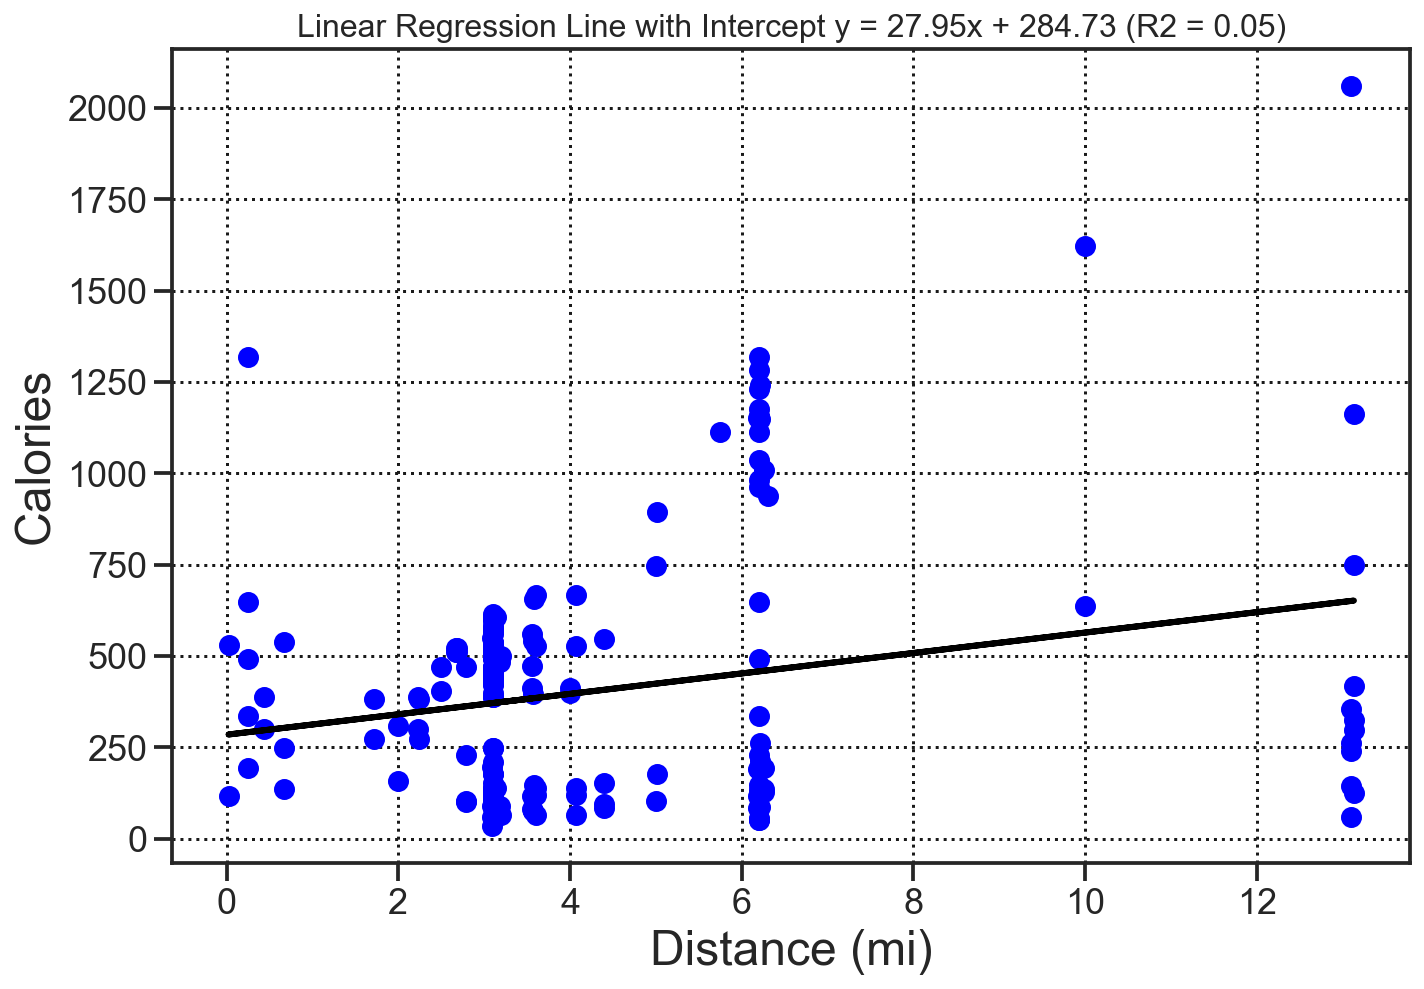

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='blue');
ax.plot(X, reg.predict(X), color='black',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance (mi)', fontsize = 24)
ax.set_ylabel('Calories', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting with and without intercept

In [ ]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

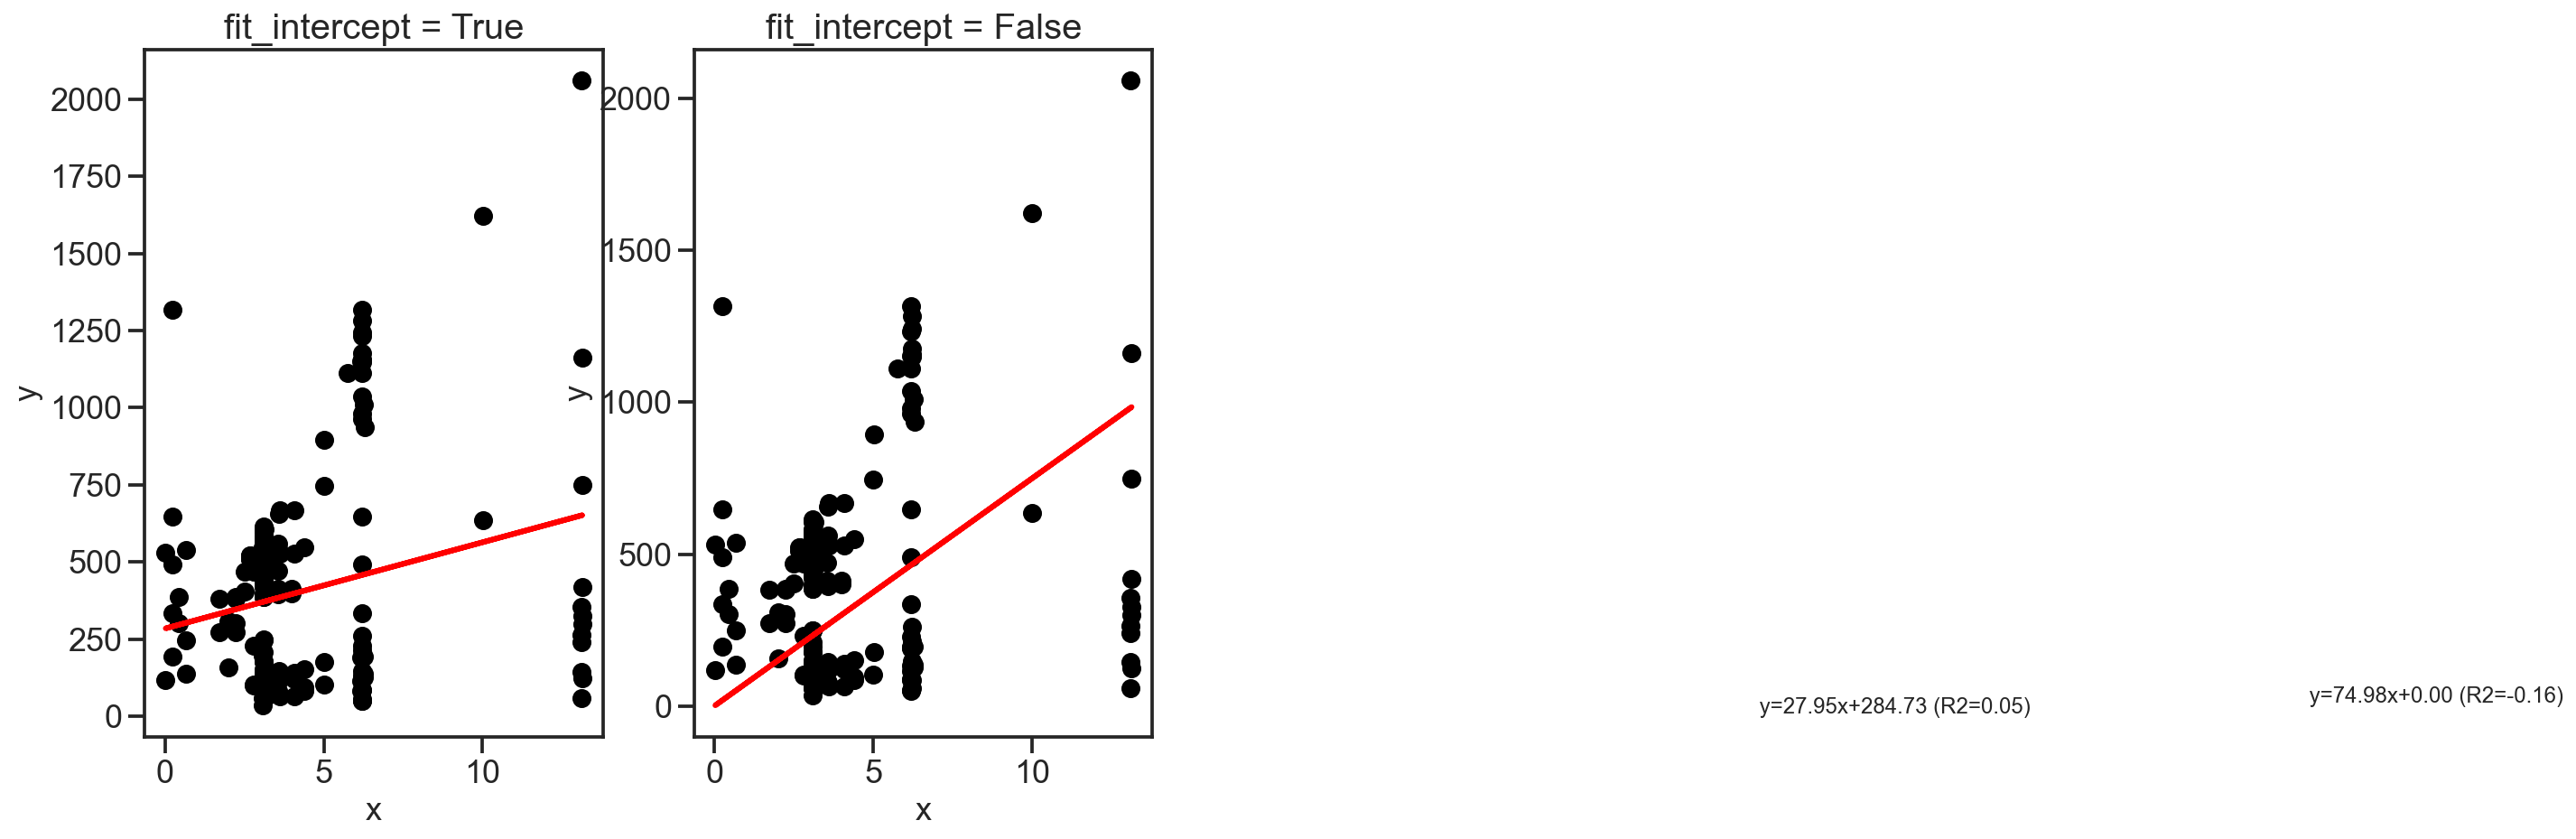

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    #ax[index].set_xlim(left = 0, right = 150)
   # ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfml[['Calories']], dfml['target'], random_state=0)

In [ ]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

-0.05058579901131521


## Logistic Regression

### Load Packages

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Regression

In [ ]:
scaler = StandardScaler()


from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X)
X_test = scaler.transform(X)

In [ ]:
clf = LogisticRegression()

In [ ]:
#I need to set my values to run log reg
clf.fit(X, y_transformed)

LogisticRegression()

In [ ]:
X_test[0].reshape(1,-1)

array([[-0.42339292]])

In [ ]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 65
probability [[3.23964677e-03 6.92436664e-05 6.92436664e-05 6.90976382e-05
  1.26101966e-04 3.17774336e-03 2.23298353e-03 2.75360580e-03
  2.83367987e-03 3.55198718e-03 1.65462214e-03 3.17774336e-03
  2.71403968e-04 6.88185621e-05 6.92436664e-05 1.32496005e-02
  1.99348500e-02 8.10542999e-03 2.59728056e-03 3.17774336e-03
  4.92034510e-03 3.15512446e-03 8.10542999e-03 4.92034510e-03
  2.39001605e-04 3.14290697e-03 3.17151751e-03 3.17774336e-03
  7.02214247e-05 6.53782699e-02 2.23298353e-03 2.93162277e-07
  3.17774336e-03 6.04445268e-04 3.17774336e-03 6.92436664e-05
  3.15539549e-03 8.61608360e-03 7.83326793e-03 2.23298353e-03
  3.05587166e-07 1.60322467e-03 6.91023613e-05 2.59728056e-03
  1.38082696e-02 3.17129052e-03 2.33749123e-04 3.18480171e-03
  7.02214247e-05 6.92436664e-05 6.90262530e-05 6.58102809e-05
  6.47124635e-03 3.23964677e-03 3.17774336e-03 6.85036357e-05
  6.92436664e-05 4.92034510e-03 3.05586502e-07 5.61526818e-02
  3.17774336e-03 6.88185621e-05 3.05590321e-

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_transformed)

LogisticRegression()

In [ ]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 71
probability [[0.00547792 0.00416731 0.00416731 0.00416613 0.01055737 0.00547378
  0.01051012 0.00544243 0.00544878 0.01079807 0.00532229 0.00547378
  0.00875704 0.00416385 0.00416731 0.01701109 0.02289034 0.01121592
  0.01060796 0.00547378 0.0055633  0.00547224 0.01121592 0.0055633
  0.0047305  0.0054714  0.00547336 0.00547378 0.00417515 0.01755196
  0.01051012 0.00122471 0.00547378 0.00951566 0.00547378 0.00416731
  0.00547226 0.0167029  0.01120099 0.01051012 0.00123444 0.00531438
  0.00416616 0.01060796 0.0057411  0.00547334 0.00472221 0.00547426
  0.00417515 0.00416731 0.00416555 0.00413853 0.01111376 0.00547792
  0.00547378 0.00416127 0.00416731 0.0055633  0.00123444 0.0117041
  0.00547378 0.00416385 0.00123444 0.01170249 0.00122471 0.01158995
  0.0057411  0.00122471 0.01111376 0.00123444 0.01170249 0.02328391
  0.00531866 0.00547378 0.00515622 0.00563802 0.00515622 0.00532229
  0.00122471 0.00547378 0.01121592 0.00547378 0.00547378 0.00547378
  0.00547378 0.01703902 

In [ ]:
log_df = pd.DataFrame()
log_df.loc[:, 'Distance (mi)'] = X_test.reshape(-1)
log_df.loc[:, 'Calories'] = y_transformed.values
log_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## Confusion Matrix

In [ ]:
dfml.head(1)
dfml2 = dfml[['Distance (mi)', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'target']]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

from sklearn.datasets import load_wine
X_train, X_test, y_train, y_test = train_test_split(
    dfml2, dfml2.target, random_state=11)  # random_state for reproducibility

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
                             

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

NameError: name 'LogisticRegression' is not defined

In [ ]:
clf.fit(X, y_transformed)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X[0:10])

array([16, 16, 16, 16, 16,  6,  6, 16, 16, 16], dtype=int64)

In [ ]:
score = clf.score(X, y_transformed)
print(score)

0.05


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X, y_transformed)

    score = clf.score(X, y_transformed)
    accuracy.append(score)

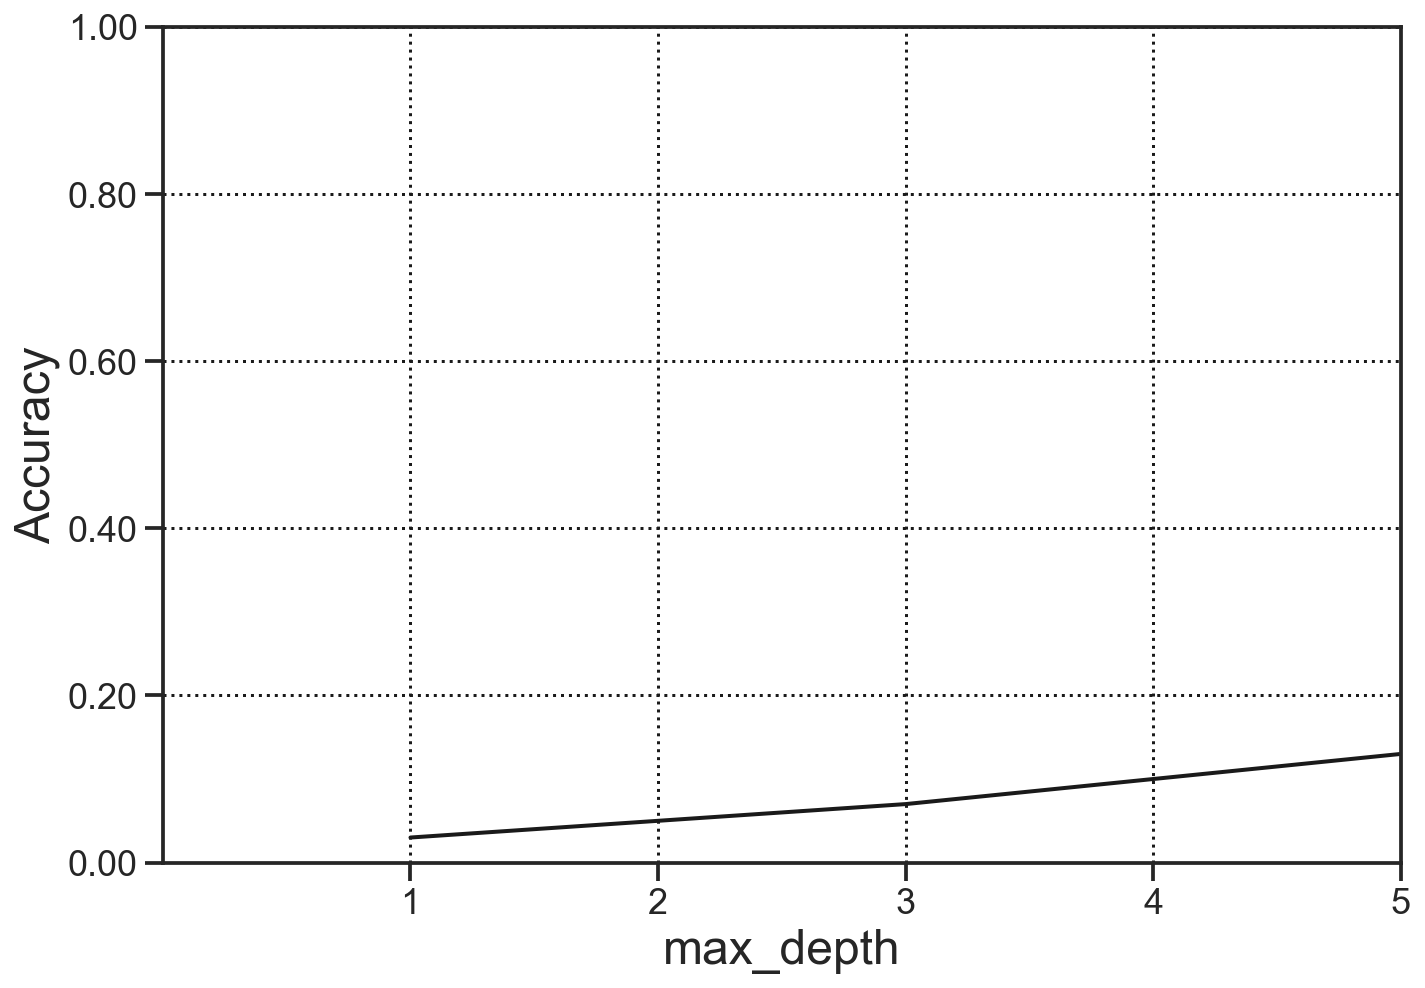

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([0, 5])
ax.set_ylim([0, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [ ]:
clf.fit(X, y_transformed)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X.iloc[0].values.reshape(1, -1))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
clf.predict(X[0:2])

array([16, 16], dtype=int64)

In [ ]:
score = clf.score(X, y_transformed)
print(score)

0.05


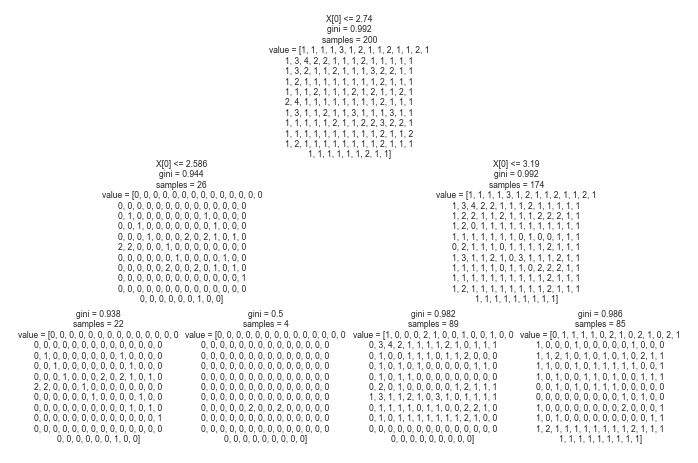

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

tree.plot_tree(clf);